<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

Informe Tecnico


Integrantes:  Pamela Aldana
              

#**Contexto del caso Forma A**.

Deberá ser capaz de implementar un proyecto de Deep Learning, entrenando un modelo ajustado a partir de los datos entregados
para este caso. Desarrollará el proyecto utilizando las etapas de metodología CRISP.DM, para la toma de las mejores decisiones
de la ejecución del proyecto.<br>
Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir.<br>
Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos
problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. <br>Un paso central para todas estas
implementaciones es la clasificación de imágenes. <br>Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa
tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.<br><br>
Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, <br>Tiene  de imágenes en escala de grises de baja resolucion (28X28)pixeles
<br>70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría.<br> El conjunto de entrenamiento tiene 60 000
imágenes y el conjunto de prueba tiene 10 000 imágenes. <br>Fashion-MNIST está destinado a servir como un reemplazo directo del
conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de
imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible
gratuitamente en https://github.com/zalandoresearch/fashion-mnist.

#FASE 1 :COMPRENDER EL NEGOCIO

Utilizaremos Tensor Flow  junto a Keras para programar varias Redes Neuronales  con el fin de predecir imágenes de ropa que estan clasificadas en 10 clases que son : 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot. Para esto vamos a disponer del Fashion MNIST dataset. Este dataset está separado en 60000 imágenes de entrenamiento y 10000 para el test,los cuales pueden ser obtenidos desde el tf.keras.


#FASE 2 :COMPRENDER LOS DATOS

## Importar librerías

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Dense, Flatten, MaxPool2D  # capz entradas , ocultas, salidas
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from sklearn.manifold import TSNE

##Carga de datos Fashion MNIST

In [ ]:
# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

# Setamos los seed para números random

#np.random.seed(30)
#tf.random.set_seed(30)

# Carga los datos en conjuntos de entrenamiento y prueba
(train_imagen, train_labels), (test_imagen, test_labels) = fashion_mnist.load_data()

# Define las etiquetas de las clases
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Mostrar información sobre el conjunto de datos
print("Número de datos de entrenamiento:", len(train_imagen))
print("Número de datos de prueba:", len(test_imagen))
print("Forma  los de entrenamiento:", train_imagen[0].shape)
print("Categorias en la dataset:", np.unique(train_labels))
print("Clases:", clases)

Número de datos de entrenamiento: 60000
Número de datos de prueba: 10000
Forma  los de entrenamiento: (28, 28)
Categorias en la dataset: [0 1 2 3 4 5 6 7 8 9]
Clases: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(train_labels[:10])


[9 0 0 3 0 2 7 2 5 5]


In [ ]:
print(test_labels[:10])


[9 2 1 1 6 1 4 6 5 7]


Las etiquetas de las clases van de 0 a 9 , lo que significa que hay 10 tipos diferentes de ropa

#FASE 3 PREPARACION DE LOS DATOS

##Preprocesamiento de datos

El set de datos debe ser pre-procesada antes de entrenar la red.

In [ ]:
# Normalizar los valores de píxeles de las imágenes
train_imagen, test_imagen = train_imagen / 255.0, test_imagen / 255.0

Se normalizan estos valores en un rango de 0 a 1 antes de utilizar el modelo de la red neuronal.

## Grafica de una  imagen con su etiqueta

Podemos visualizar una imagen del dataset

Se visualiza la imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

label: T-shirt/top


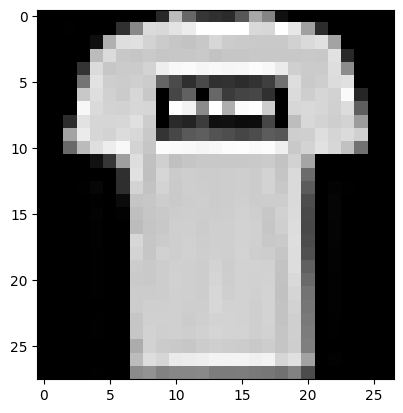

In [ ]:
i=1
img = train_imagen[i,:,i:]
plt.imshow(img, cmap='gray')
plt.show
print(f"label: {clases[train_labels[i]]}")


Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el train_imagen  junto con el nombre de cada clase en cada imagen

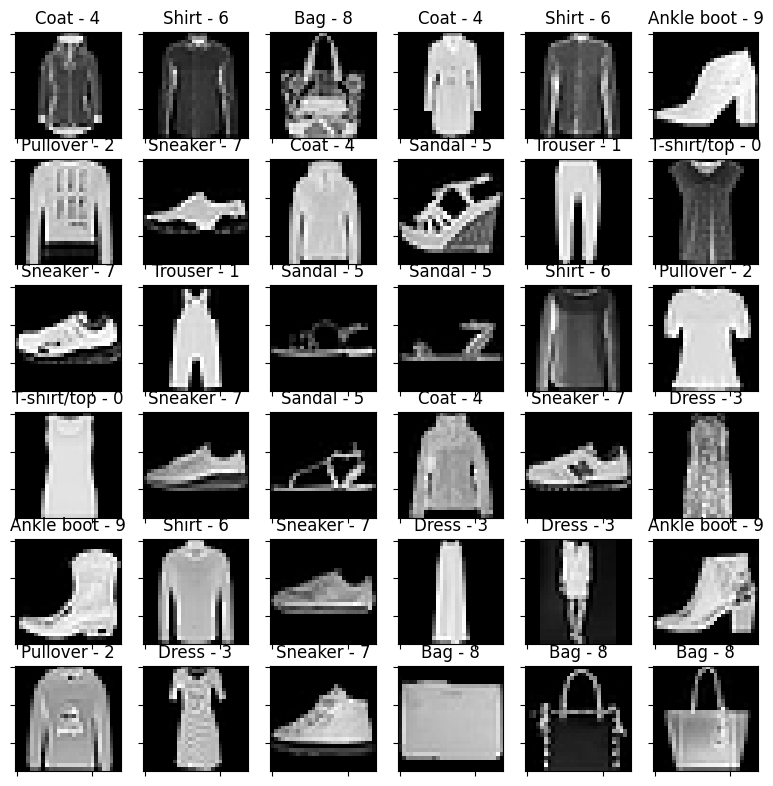

In [ ]:
# Define las etiquetas de las clases
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostramos una grilla de ejemplos (al azar)
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(train_imagen))
        axs[i,j].set_title(clases[train_labels[ex]] + " - " + str(train_labels[ex]))
        axs[i,j].grid(False)
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])
        axs[i,j].imshow(train_imagen[ex], cmap='gray')
plt.show()


Se puede observar que las etiquetas  de las clases se no se asignaron correctamente,  ya que varias imágenes no corresponden a las categorías esperadas.

#FASE 4 MODELADO

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.


# Modelo Perceptrón

Se crea un modelo que consiste en una sola unidad de procesamiento llamada perceptrón, que toma varias entradas , las pondera y las combina linealmente, y luego aplica una función de activación sigmoide para producir una salida. La función de pérdida se establece en 'binary_crossentropy' para problemas de clasificación binaria, y el modelo se entrena con los datos de entrenamiento. Luego, se evalúa el modelo con los datos de prueba para obtener la precisión en la clasificación.

##Primer modelo 1 Perceptron

**Definir el modelo**

In [ ]:
# Definir el modelo del perceptrón
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),              # capa de aplanamiento.aplanar la imagen 28x28 a un vector de 784 elementos y sesgo 1
    Dense(1, activation='sigmoid')])                 # Capa de salida con una neurona y función de activación sigmoid


**Flatten:** Se utiliza para convertir las imágenes de 28x28 píxeles en un vector de 784 elementos antes de pasarlos a la capa densa (o de perceptrón) del modelo. <br>**Dense:** Esta es una capa totalmente conectada (dense) con un solo perceptrón.Produce una salida de un solo valor. La función de activación es la sigmoide. Tiene 785(28x28) parámetros, que son los pesos de conexión de cada píxel de entrada con el perceptrón más 1 sesgo adicional.
<br> **Total params:** Muestra el número total de parámetros en el modelo, hay 785 parámetros en total.
<br>**Trainable params:** Indica el número de parámetros que se pueden entrenar durante el proceso de entrenamiento, todos los parámetros son entrenables<br>

**Compilar el modelo**

In [ ]:
# Compilar el modelo
model.compile(optimizer='sgd',                              # Su función principal es ajustar los pesos del modelo durante el entrenamiento para minimizar la función de pérdida.
              loss='binary_crossentropy',                  # Utilizamos binary_crossentropy ya que es un problema de clasificación binaria
              metrics=['accuracy'])
                      # mide la exactud del modelo
# resumen Arquitectura
model.summary()
# optimizador sgd..Su función principal es ajustar los pesos del modelo durante el entrenamiento para minimizar la función de pérdida.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento del modelo**

In [ ]:
 #Entrenamiento del modelo

h=model.fit(train_imagen, train_labels, epochs=20, batch_size=32)




Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: -438087.4688 - accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: -459457.5625 - accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: -480828.2812 - accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: -502198.5938 - accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: -523569.1875 - accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: -544939.8750 - accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: -566310.5625 - accuracy: 0.1000
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: -587680.6250 - accuracy: 0.1000
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: -609051.3750 - accuracy: 0.1000
Epoch 10/20
1875/1875 [=====

**Evaluación del modelo**

In [ ]:
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Exactitud en los datos de prueba:', test_acc)
print('Perdida en los datos de prueba:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: -855533.1250 - accuracy: 0.1000
Exactitud en los datos de prueba: 0.10000000149011612
Perdida en los datos de prueba: -855533.125


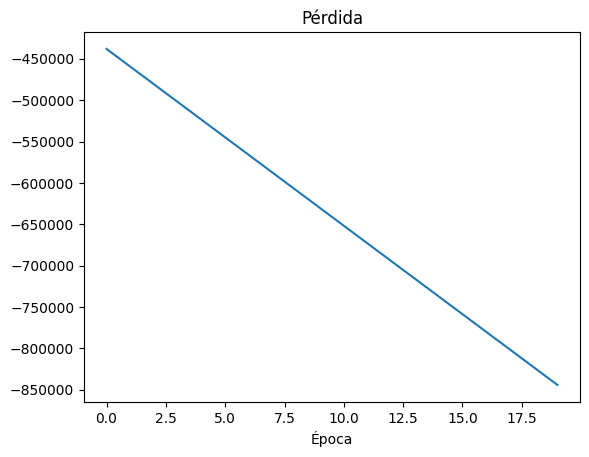

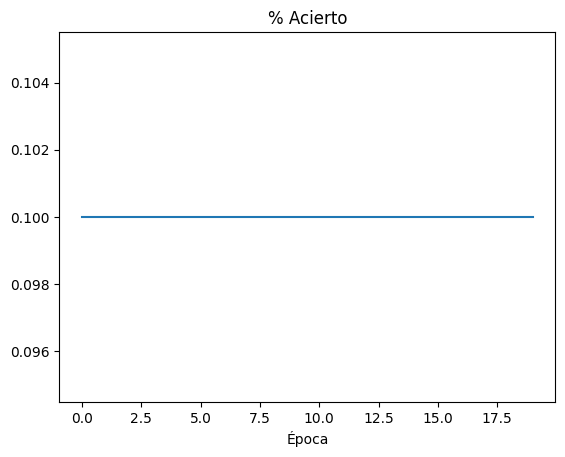

In [ ]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()
# imprime el porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

Conclusion: <br>*
* El modelo clasificó correctamente alrededor del 10% de las muestras del conjunto de datos de prueba lo que es muy baja.
* La pérdida en los datos de prueba es  negativa, lo que indica un problema,  ya que representa la diferencia entre las predicciones del modelo y los valores reales.

##Segundo modelo de un perceptron

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define el modelo del perceptrón con una neurona en la capa de salida
model = Sequential([
    Flatten(input_shape=(28, 28)),              # Flatten the 28x28 image into a 784-element vector
    Dense(1, activation='sigmoid')             # Output layer with 10 neurons for the 10 classes and softmax activation
])

# Compila el modelo
model.compile(optimizer='adam',                  # Stochastic Gradient Descent optimizer
              loss='binary_crossentropy' ,   # Sparse categorical cross-entropy loss for multi-class classification
              metrics=['accuracy'])               # Accuracy metric to monitor during training

# Muestra un resumen de la arquitectura del modelo
model.summary()

# Entrena el modelo
model.fit(train_imagen, train_labels, epochs=20, batch_size=32)

# Evalúa el modelo
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Exactitud en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: -5.5733 - accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: -17.4488 - accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: -29.3025 - accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: -41.2295 - accuracy: 0.1000
Epoch

La precisión es de aproximadamente 0.1, lo que significa que el modelo clasifica correctamente alrededor del 10% de las muestras del conjunto de datos de prueba, lo que es muy bajo. <br> La pérdida mide que tan bien se está desempeñando el modelo en el conjunto de datos de prueba, y el valor negativo indica que algo está mal  con la forma en que se está calculando la pérdida.

CONCLUSION

El  modelo que utiliza la función de activación sigmoid en la capa de salida,  producirá una salida en el rango de 0 a 1, lo que nos indica la probabilidad de pertenencia a una clase específica. <>br
Al utilizar un  solo perceptrón en la capa de salida no es  óptimo para un problema de clasificación multiclase, ya que puede no puede capturar la complejidad de las relaciones entre las diferentes clases en el conjunto de datos Fashion MNIST.
<br> Tambien se entiende que la función de activación softmax seria la mas adecuada para clasificacion para un problema de clasificación multiclase, ya que softmax espera múltiples neuronas en la capa de salida para representar las diferentes clases. Teniendo en cuenta que este es un problema de clasificación multiclase, generalmente se utiliza una capa de salida con tantas neuronas como clases diferentes, y la función de activación softmax se aplica a todas las neuronas.<br>
Tambien se realizo un modelo con un optimizador Adam , no hubo mayor diferencia entre los 2 modelos ya que tiene perdida negativa y exactitud 10%, lo que indica que en este conjunto de datos fashion-Mnist, se deben realizar modelos mas complejos, relacionados con la clasificacion de multiclases







 El modelo muestra un rendimiento deficiente tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto indica que el modelo es demasiado simple para capturar la complejidad de los datos y no puede aprender correctamente las relaciones entre las características de entrada y las etiquetas de salida

#Modelo Perceptrón multicapa MLP

#  MODELOS DE 1 CAPAS OCULTAS

Cambiando las funcion de activacion.

Capas ocultas entre 1 y 3, manteniendo la cantidad de neuronas.

##Primer modelo con una capa oculta y funcion de activacion Relu
1 capa oculta <br>
512 perceptron<br>
**relu funcion activacio**n<br>
Adam optimizador<br>
Softmax funcion de salida

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
416/416 [==============================] - 7s 14ms/step - loss: 0.5175 - accuracy: 0.8188 - val_loss: 0.4260 - val_accuracy: 0.8453
Epoch 2/20
416/416 [==============================] - 5s 12ms/step - loss: 0.3800 - accuracy: 0.8647 - val_loss: 0.3813 - val_accuracy: 0.8

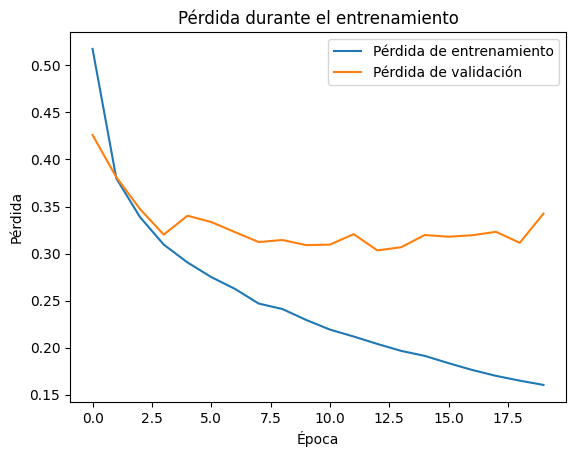

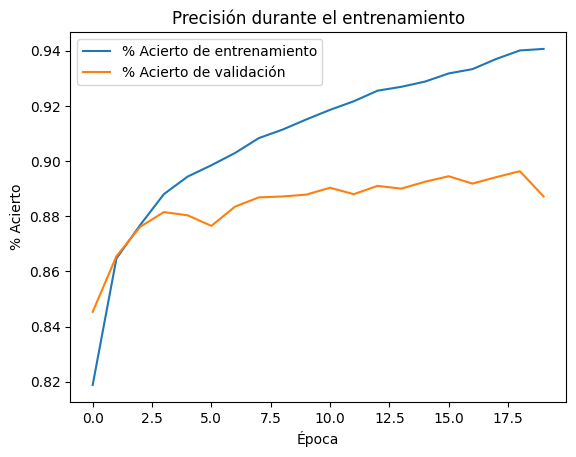

In [ ]:
# Definir el modelo de perceptrón multicapa
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Capa de entrada: aplanar la imagen
    Dense(512, activation='relu'),  # Capa oculta: 512 neuronas con activación ReLU/ tanh
    Dense(10, activation='softmax')  # Capa de salida: 10 neuronas con activación Softmax
])

# Compilar el modelo
model.compile(optimizer='adam',  # Optimizador Adam
              loss='sparse_categorical_crossentropy',  # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])  # Métrica de evaluación durante el entrenamiento

# Muestra un resumen de la arquitectura del modelo
model.summary()

# Entrenar el modelo con un conjunto de validación
h = model.fit(train_imagen, train_labels, epochs=20, batch_size=130, verbose=1, validation_split=0.1)

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print("Precisión en el conjunto de prueba:", test_acc)
print("Pérdida en el conjunto de prueba:", test_loss)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(h.history['loss'], label='Pérdida de entrenamiento')
plt.plot(h.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(h.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()





 * Grafico de Pérdida durante el entrenamiento y la validación: <br>
La línea de pérdida de validación comienza a aumentar mientras la de entrenamiento continúa disminuyendo, esto indica sobreajuste.( esto es indicio de overfitting (memorización de test))<br>
* Precisión durante el entrenamiento y la validación:
Ambas líneas deberían mostrar una tendencia creciente a lo largo de las épocas. La precisión de validación comienza a disminuir y mientras la de entrenamiento continúa aumentando,indica sobreajuste(memorización de test) .

313/313 [==============================] - 1s 4ms/step


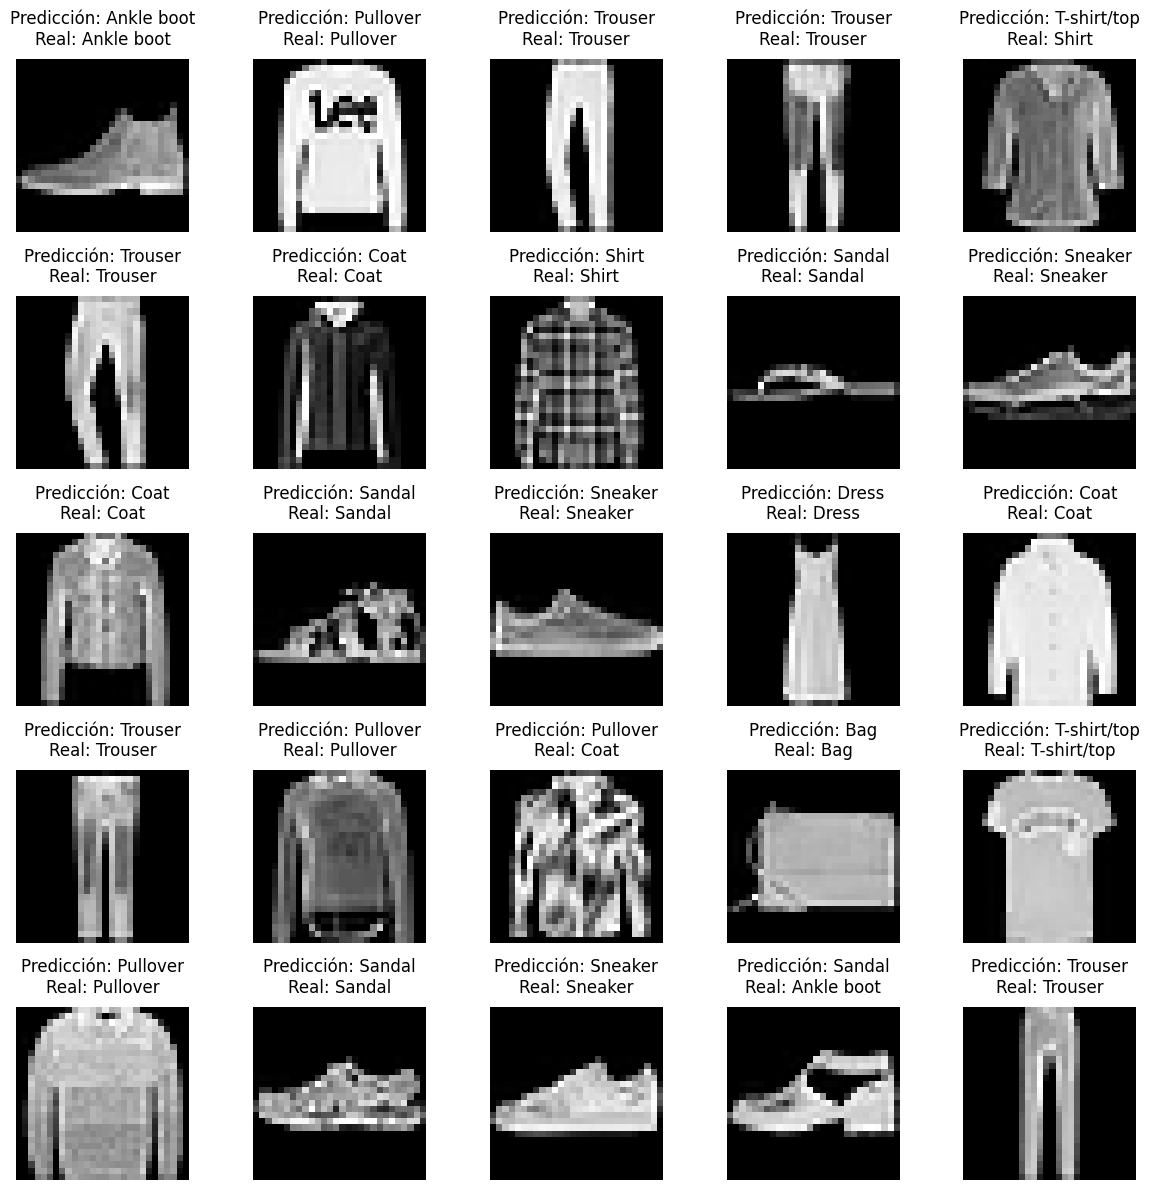

In [ ]:
# Hacer predicciones sobre los datos de prueba
predictions = model.predict(test_imagen)

# Convertir las predicciones de probabilidades a etiquetas de clase
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar ejemplos de predicciones junto con las etiquetas reales
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_imagen[i], cmap='gray')
    plt.title(f'Predicción: {clases[predicted_labels[i]]}\nReal: {clases[test_labels[i]]}', pad=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

###DROPOUT Y EARLY STOPPING
Se utilizan Dropout ya que el modelo esta sobreajustado, esta tecnica de regularizacion  previene la dependencia excesiva entre neuronas, evitando que el modelo memorice el ruido los datos de entrenamiento.Mejorando la generalizacion.<br>
Early stopping la usamos porque deteien el entrenamiento antes que se sobreajuste, con esto debiese mejorar el modelo.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.5606 - accuracy: 0.8004 - val_loss: 0.4054 - val_accuracy: 0.8505
Epoch

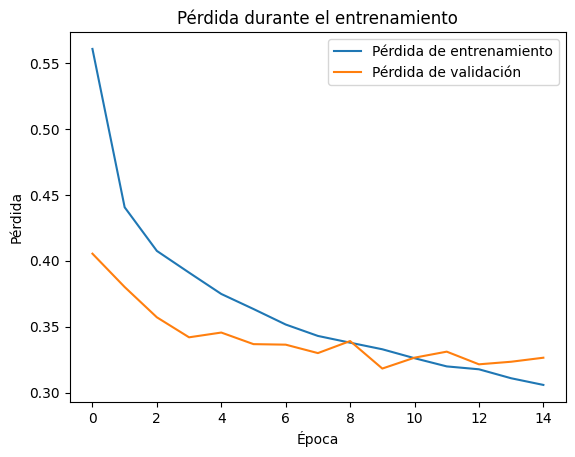

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo con Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),            # Aplanar la imagen 28x28 a un vector de 784 elementos
    Dense(512, activation='relu'),            # Capa oculta con 512 perceptrones y activación ReLU
    Dropout(0.5),                              # Capa de dropout con una tasa de dropout del 50%
    Dense(10, activation='softmax')           # Capa de salida con 10 neuronas para las 10 clases y activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam',              # Optimizador Adam
              loss='sparse_categorical_crossentropy',  # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])           # Métrica de precisión

# Mostrar resumen del modelo
model.summary()

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
history = model.fit(train_imagen, train_labels, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Precisión en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


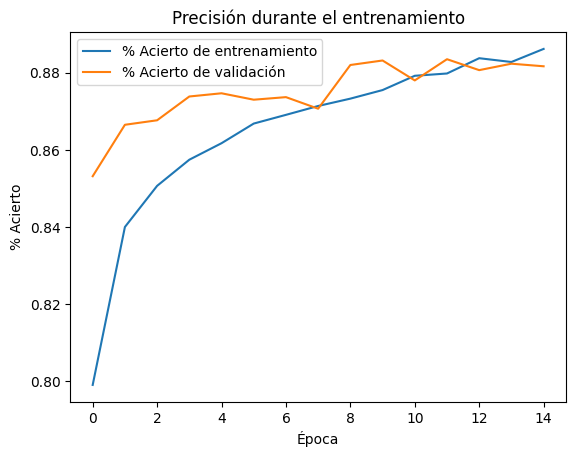

In [ ]:
plt.plot(history.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


313/313 [==============================] - 1s 3ms/step


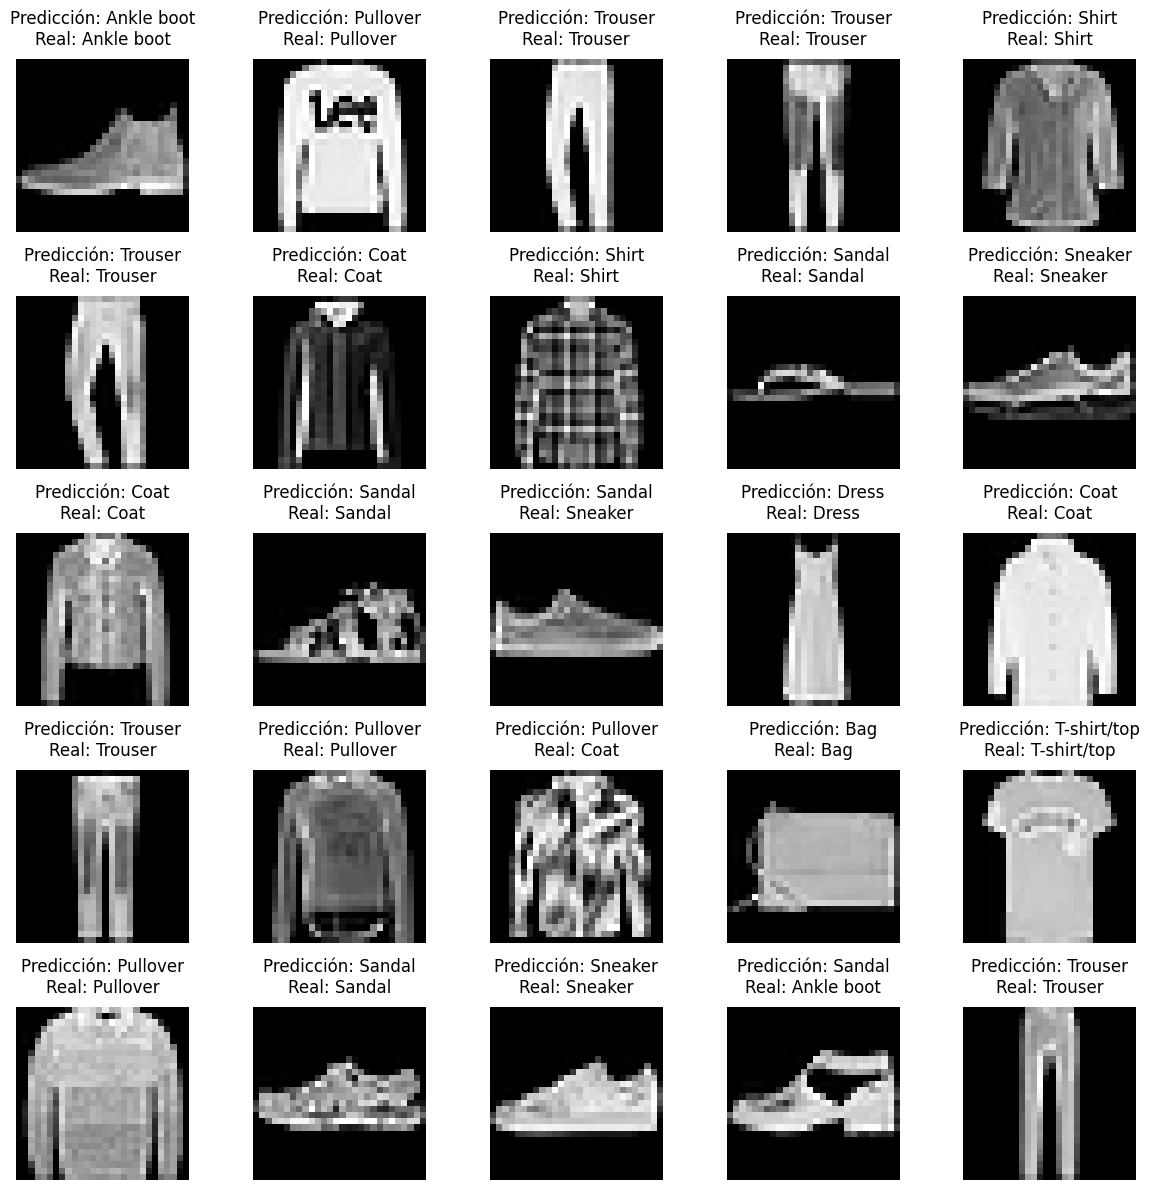

In [ ]:
# Hacer predicciones sobre los datos de prueba
predictions = model.predict(test_imagen)

# Convertir las predicciones de probabilidades a etiquetas de clase
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar ejemplos de predicciones junto con las etiquetas reales
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_imagen[i], cmap='gray')
    plt.title(f'Predicción: {clases[predicted_labels[i]]}\nReal: {clases[test_labels[i]]}', pad=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


En resumen, si el modelo con Dropout muestra un mejor comportamiento en términos de sobreajuste en comparación con el modelo sin Dropout, entonces es recomendable utilizar Dropout como una técnica de regularización para mejorar el rendimiento y la generalización del modelo.

## Segundo modelo con una capa y funcion de activacion (tanh)

In [ ]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)


(60000, 28, 28)
(10000, 28, 28)
X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)
784 10 60000 10000


In [ ]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)


In [ ]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

784 10 60000 10000


In [ ]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)


In [ ]:
h1 = 512


 Creamos nuestra red feed-forward con funcion de activacion tanh


In [ ]:
# Creamos nuestra red feed-forward
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

Se determina tamaño de los batch y cantidad de epoca

In [ ]:
hist = red.fit(X_train, Y_train,
        epochs=15,
        batch_size=128,
        validation_data=(X_test,Y_test))

Epoch 1/15
469/469 [==============================] - 6s 13ms/step - loss: 0.4133 - accuracy: 0.8508 - val_loss: 0.4248 - val_accuracy: 0.8496
Epoch 2/15
469/469 [==============================] - 6s 12ms/step - loss: 0.3680 - accuracy: 0.8668 - val_loss: 0.3881 - val_accuracy: 0.8571
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.3339 - accuracy: 0.8789 - val_loss: 0.3851 - val_accuracy: 0.8632
Epoch 4/15
469/469 [==============================] - 5s 12ms/step - loss: 0.3191 - accuracy: 0.8826 - val_loss: 0.3678 - val_accuracy: 0.8690
Epoch 5/15
469/469 [==============================] - 7s 14ms/step - loss: 0.3012 - accuracy: 0.8900 - val_loss: 0.3683 - val_accuracy: 0.8666
Epoch 6/15
469/469 [==============================] - 5s 12ms/step - loss: 0.2851 - accuracy: 0.8935 - val_loss: 0.3421 - val_accuracy: 0.8779
Epoch 7/15
469/469 [==============================] - 7s 15ms/step - loss: 0.2733 - accuracy: 0.8983 - val_loss: 0.3365 - val_accuracy: 0.8782

Se infiere que el modelo muestra una pérdida y precisión de entrenamiento significativamente mejores que la pérdida y precisión de validación, ello indica  sobreajuste.

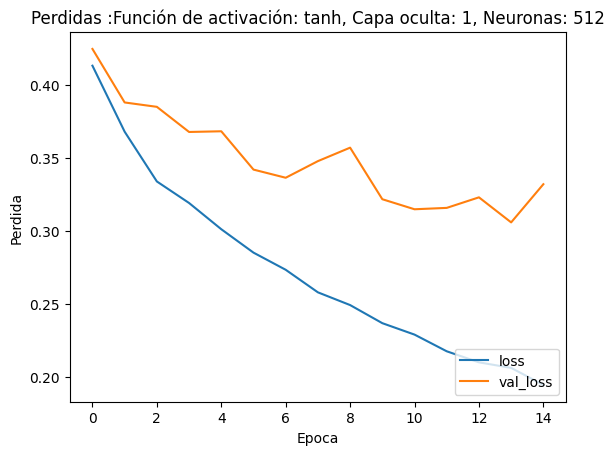

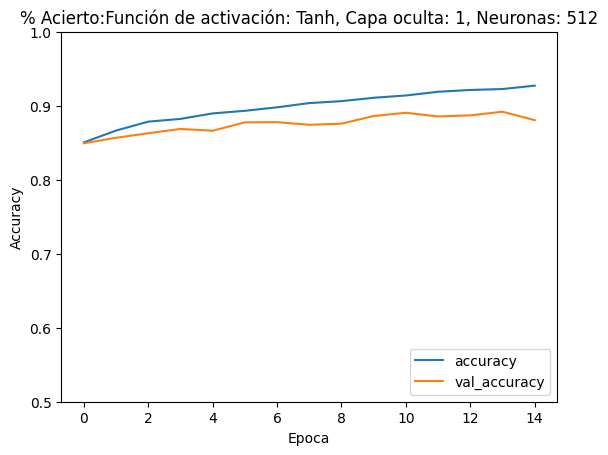

In [ ]:
# imprime el porcentaje de acierto para cada época
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Perdidas :Función de activación: tanh, Capa oculta: 1, Neuronas: 512")
plt.show()
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("% Acierto:Función de activación: Tanh, Capa oculta: 1, Neuronas: 512")
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Dense(512, input_dim=N, activation='tanh'),
    Dropout(0.2),  # Dropout con probabilidad de retener el 80% de las neuronas
    keras.layers.Dense(C, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Precisión en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)


Epoch 1/20
422/422 [==============================] - 7s 15ms/step - loss: 0.3545 - accuracy: 0.8973 - val_loss: 0.1997 - val_accuracy: 0.9442
Epoch 2/20
422/422 [==============================] - 6s 14ms/step - loss: 0.2186 - accuracy: 0.9360 - val_loss: 0.1525 - val_accuracy: 0.9538
Epoch 3/20
422/422 [==============================] - 8s 18ms/step - loss: 0.1633 - accuracy: 0.9516 - val_loss: 0.1211 - val_accuracy: 0.9663
Epoch 4/20
422/422 [==============================] - 6s 15ms/step - loss: 0.1273 - accuracy: 0.9616 - val_loss: 0.0998 - val_accuracy: 0.9703
Epoch 5/20
422/422 [==============================] - 8s 19ms/step - loss: 0.1059 - accuracy: 0.9689 - val_loss: 0.0906 - val_accuracy: 0.9742
Epoch 6/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0845 - val_accuracy: 0.9732
Epoch 7/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0760 - accuracy: 0.9759 - val_loss: 0.0787 - val_accuracy: 0.9770

 Se agrega una capa de Dropout con una probabilidad de retener el 80% de las neuronas después de la primera capa oculta y se define Early Stopping para detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de 5 épocas y restaurar los mejores pesos obtenidos durante el entrenamiento.

Se mejora significativamente el modelo .

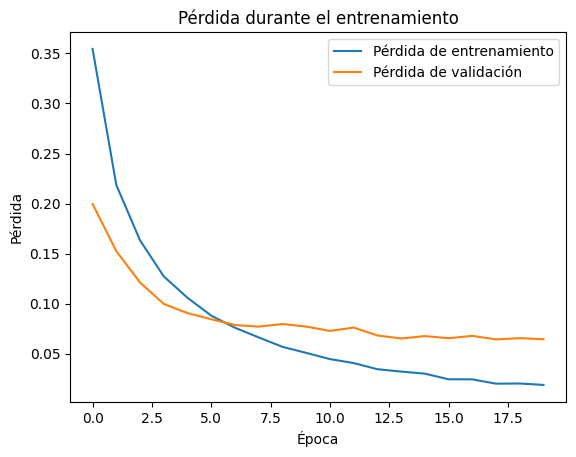

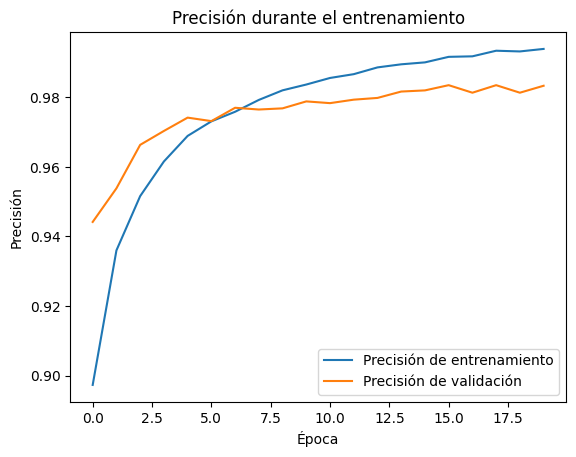

In [ ]:
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

## Tercer modelo con una capa y funcion activacion (sigmoide)

In [ ]:
#definimos las capas y las neuronas por capa oculta
h1 = 512

In [ ]:
# Creamos nuestra red feed-forward
red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa_oculta'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

In [ ]:
# Imprimimos Arquitectura
red.summary()

# Definimos metricas y optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa_oculta (Dense  (None, 512)               401920    
 )                                                               
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Definimos Batchs y Epocas
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.9455 - accuracy: 0.5451 - val_loss: 1.6038 - val_accuracy: 0.7347
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 1.3708 - accuracy: 0.7579 - val_loss: 1.1473 - val_accuracy: 0.7975
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.0248 - accuracy: 0.8072 - val_loss: 0.8890 - val_accuracy: 0.8315
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.8288 - accuracy: 0.8315 - val_loss: 0.7420 - val_accuracy: 0.8508
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.7110 - accuracy: 0.8454 - val_loss: 0.6470 - val_accuracy: 0.8598
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6341 - accuracy: 0.8544 - val_loss: 0.5842 - val_accuracy: 0.8667
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5803 - accuracy: 0.8626 - val_loss: 0.5388 - val_accuracy: 0.8724
Ep

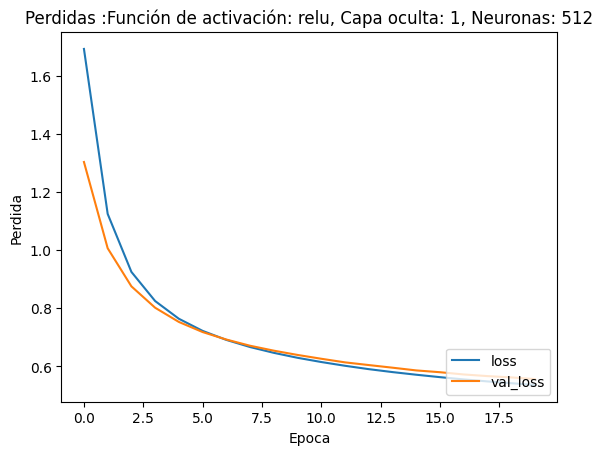

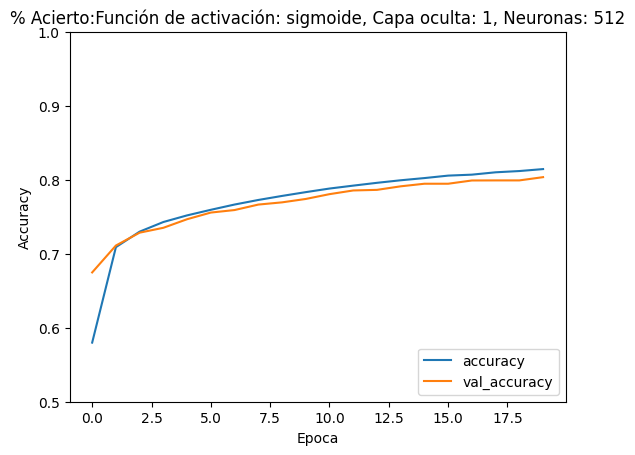

In [ ]:
# imprime el porcentaje de acierto para cada época
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Perdidas :Función de activación: sigmoid, Capa oculta: 1, Neuronas: 512")
plt.show()
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("% Acierto:Función de activación: sigmoide, Capa oculta: 1, Neuronas: 512")
plt.show()

Se puede ver que los valores de pérdida y precisión indican que el modelo ha aprendido bien de los datos de entrenamiento y generaliza bien a datos nuevos, ya que tanto la pérdida como la precisión en el conjunto de validación son buenos y comparables a los del conjunto de entrenamiento.

Conclusion : El modelo que utiliza la funcion sigmid con optimizador Adam , es el que mejor generaliza sin realizar dropout y early stopping.<br>


#  MODELOS DE 2 CAPAS OCULTAS

##Primer modelo 2 capas ocultas : funcion activacion( sigmoid , sigmoid)

In [ ]:
h1 = 512    # Número de neuronas en la primera capa oculta
h2 = 256    # Número de neuronas en la segunda capa oculta
# Creamos nuestra red feed-forward
red = keras.Sequential()    # Inicializamos un modelo secuencial
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))    # Añadimos la primera capa oculta con 512 neuronas y activación sigmoidal
red.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))    # Añadimos la segunda capa oculta con 256 neuronas y activación sigmoidal
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))    # Añadimos la capa de salida con C neuronas y activación softmax (donde C es el número de clases)
red.summary()    # Mostramos la arquitectura del modelo
red.compile(
    loss='categorical_crossentropy',    # Definimos la función de pérdida como la entropía cruzada categórica
    optimizer='sgd',    # Utilizamos el optimizador SGD (Gradiente Descendente Estocástico)
    metrics=['accuracy']    # Métrica para evaluar el rendimiento del modelo durante el entrenamiento
)

# Entrenamos el modelo con los datos de entrenamiento
hist = red.fit(X_train, Y_train,
        epochs=20,    # Número de épocas de entrenamiento
        batch_size=128,    # Tamaño del lote de datos utilizados en cada iteración del entrenamiento
        validation_data=(X_test,Y_test)    # Datos de validación para evaluar el rendimiento del modelo durante el entrenamiento
       )


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 2.2647 - accuracy: 0.2262 - val_loss: 2.2210 - val_accuracy: 0.4527
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.1770 - accuracy: 0.4506 - val_loss: 2.1219 - val_accuracy: 0.

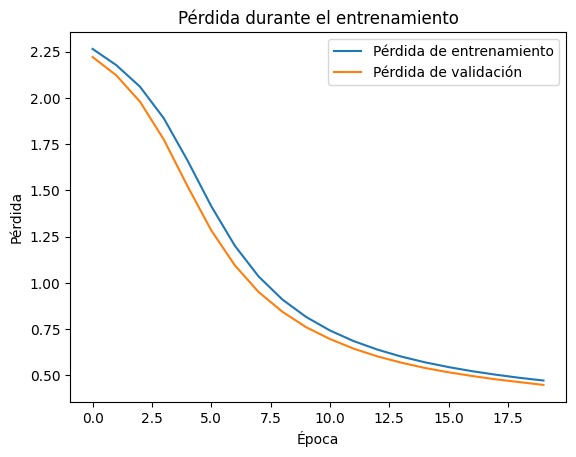

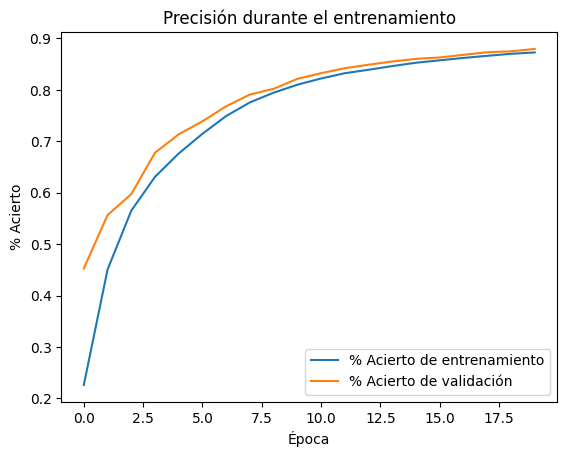

In [ ]:
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


El modelo ha alcanzado una precisión del 87.29% en los datos de entrenamiento y del 87.97% en los datos de validación. Eso sugiere que el modelo ha aprendido bien de los datos de entrenamiento y generaliza bien a datos nuevos.


## Segundo modelo 2 Capas ocultas Funcion de Activacion:Relu, Relu

In [ ]:
# tamaños de capas escondidas
h1 = 512
h2=256
# nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
 #Ahora compilamos la red para poder entrenar (con .compile)
# Necesitamos definir
#   - la pérdica ("loss"), en nuestro caso, "categorical_crossentropy"
#   - el algoritmo de optimización ("optimizer"), en nuestro caso "sgd"
# También podemos agregar una lista de métrics ("metrics").
# Agregamos "accuracy"

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])



In [ ]:

# Entrenamos simplemente haciendo .fit y entregando los inputs
# Podemos definir también la cantidad de épocas ("epochs"),
# el tamaño del paquete de entrenamiento ("batch_size"),
# y otros parámetros que veremos más adelante.
# Guardamos el resultado en una variable para analizar.

# Definimos Batchs y Epocas
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )


Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 1.0908 - accuracy: 0.7538 - val_loss: 0.5149 - val_accuracy: 0.8776
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4457 - accuracy: 0.8843 - val_loss: 0.3662 - val_accuracy: 0.9034
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3571 - accuracy: 0.9013 - val_loss: 0.3171 - val_accuracy: 0.9133
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.3167 - accuracy: 0.9114 - val_loss: 0.2902 - val_accuracy: 0.9189
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2905 - accuracy: 0.9178 - val_loss: 0.2682 - val_accuracy: 0.9255
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2708 - accuracy: 0.9233 - val_loss: 0.2533 - val_accuracy: 0.9288
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2550 - accuracy: 0.9286 - val_loss: 0.2391 - val_accuracy: 0.9336

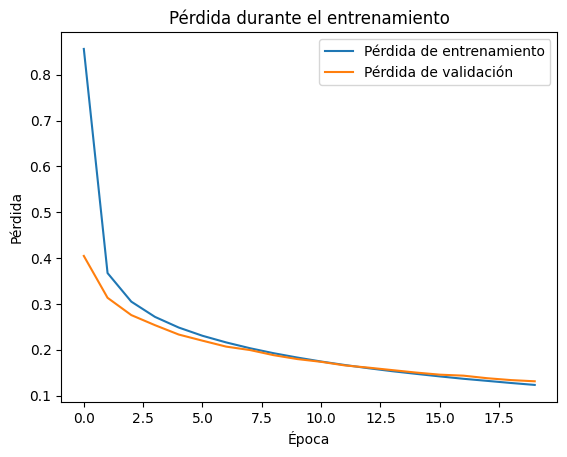

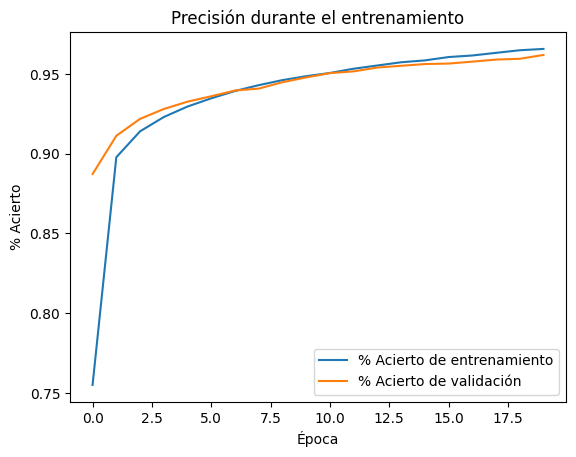

In [ ]:
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


 La precisión final en el conjunto de entrenamiento es de aproximadamente 95,77%, mientras que en el conjunto de validación es de alrededor del 95.50%. Esto indica que el modelo es capaz de clasificar correctamente alrededor del 95% de los datos en ambos conjuntos. Una pequeña diferencia entre la precisión del entrenamiento y la validación sugiere que el modelo no está sobreajustando demasiado los datos de entrenamiento.

## Tercer modelo 2 Capas ocultas Funcion de Activacion:Tanh, Relu

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron 1024, 512
h2 = 256
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))    # funcion de activacion relu, sigmoid,tanh
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd', # Adam
    metrics=['accuracy']
)

hist = red.fit(X_train, Y_train,
        epochs=15,
        batch_size=64,
        validation_data=(X_test,Y_test)
       )


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 9s 9ms/step - loss: 0.6856 - accuracy: 0.8322 - val_loss: 0.3602 - val_accuracy: 0.9042
Epoch 2/15
938/938 [==============================] - 7s 8ms/step - loss: 0.3369 - accuracy: 0.9063 - val_loss: 0.2917 - val_accuracy: 0.91

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)


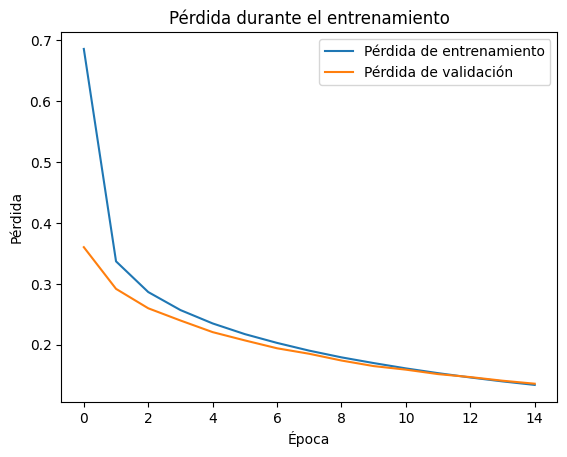

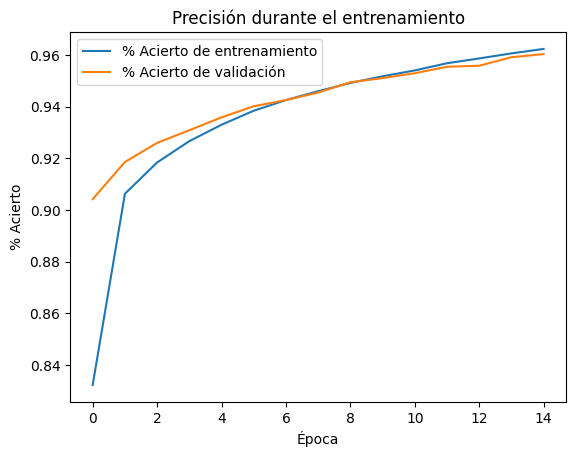

In [ ]:
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


La pérdida final en el conjunto de entrenamiento es de 0.1340 y en el conjunto de validación es de 0.1360. Estos valores son bajos, lo que indica que el modelo ha minimizado su error durante el entrenamiento y generaliza bien a datos no vistos.

## Se aplica DROPOUT Y EARLY STOPPING

In [ ]:
# Definir el modelo con Dropout
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
red.add(Dropout(0.2))  # Agregar Dropout con una tasa de 0.2 (ajustar según sea necesario)
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(Dropout(0.2))  # Agregar Dropout
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

# Agregar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Detener el entrenamiento si la pérdida de validación deja de disminuir después de 3 épocas

# Compilar el modelo
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Entrenar el modelo con Dropout y Early Stopping
hist = red.fit(X_train, Y_train,
               epochs=15,
               batch_size=64,
               validation_data=(X_test, Y_test),
               callbacks=[early_stopping])


Epoch 1/15
938/938 [==============================] - 10s 11ms/step - loss: 0.7631 - accuracy: 0.7934 - val_loss: 0.3613 - val_accuracy: 0.9040
Epoch 2/15
938/938 [==============================] - 10s 11ms/step - loss: 0.3839 - accuracy: 0.8893 - val_loss: 0.2907 - val_accuracy: 0.9190
Epoch 3/15
938/938 [==============================] - 13s 14ms/step - loss: 0.3270 - accuracy: 0.9051 - val_loss: 0.2577 - val_accuracy: 0.9289
Epoch 4/15
938/938 [==============================] - 12s 13ms/step - loss: 0.2912 - accuracy: 0.9156 - val_loss: 0.2342 - val_accuracy: 0.9345
Epoch 5/15
938/938 [==============================] - 12s 12ms/step - loss: 0.2659 - accuracy: 0.9220 - val_loss: 0.2158 - val_accuracy: 0.9386
Epoch 6/15
938/938 [==============================] - 10s 11ms/step - loss: 0.2482 - accuracy: 0.9279 - val_loss: 0.2012 - val_accuracy: 0.9421
Epoch 7/15
938/938 [==============================] - 12s 13ms/step - loss: 0.2307 - accuracy: 0.9334 - val_loss: 0.1886 - val_accuracy:

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.1323 - accuracy: 0.9607
Pérdida en el conjunto de prueba: 0.13232451677322388
Precisión en el conjunto de prueba: 0.9606999754905701


Pérdida en el conjunto de prueba es de 0.1323 , representa la pérdida promedio que el modelo ha tenido en el conjunto de prueba. Este valor es bajo ,entonces  el rendimiento del modelo es bueno, ya que indica que las predicciones del modelo se ajustan mejor a las etiquetas reales.<br>
Precisión en el conjunto de prueba es de 0.9607, indica una alta  precisión del modelo en el conjunto de prueba. Es la fracción de las muestras de prueba correctamente clasificadas por el modelo. El modelo tiene precisión de 0.96 significa que el modelo clasificó correctamente el 96.07% de las muestras de prueba

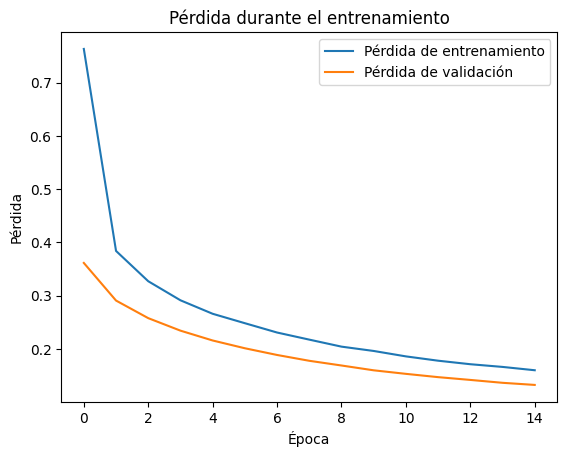

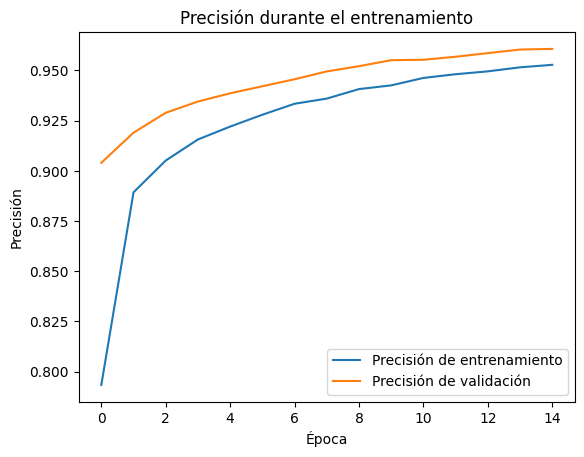

In [ ]:
# Graficar pérdida durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar precisión durante el entrenamiento
plt.plot(hist.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()


## Diferencia Optimizador de tasa de aprendizaje constante (SGD)y adapatativo (Adam)
Optimizador de tasa de aprendizaje constante mantiene la tasa de aprendizaje fija durante todo el entrenamiento, un optimizador de tasa de aprendizaje adaptativa ajusta la tasa de aprendizaje de forma dinámica y automática según las características del proceso de entrenamiento y los gradientes de los parámetros del modelo. Esto puede llevar a un entrenamiento más eficiente y una convergencia más rápida en algunos casos, especialmente cuando se trabaja con problemas de optimización complejos. Sin embargo, la elección del optimizador depende del problema específico y puede requerir ajuste de hiperparámetros para obtener los mejores resultados.








# MODELO 3 capas ocultas


## Primer  modelo 3 capas : funcion de activacion (relu, relu, relu):
Pérdida en el conjunto de prueba: 0.19663070142269135<br>
Precisión en el conjunto de prueba: 0.9437999725341797

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
172/172 [==============================] - 5s 25ms/step - loss: 1.7947 - accuracy: 0.5480 - val_loss: 1.1698 - val_accuracy: 0.7589
Epoch 

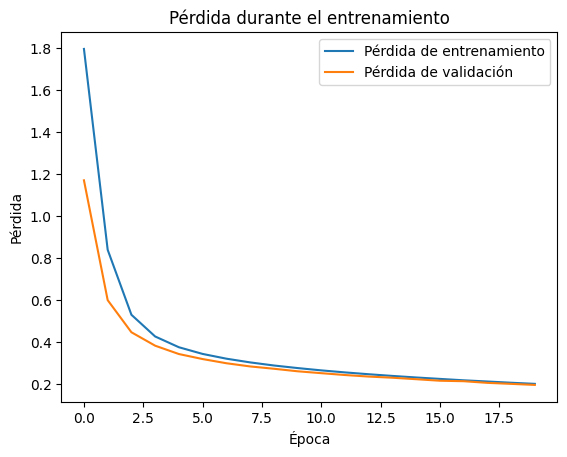

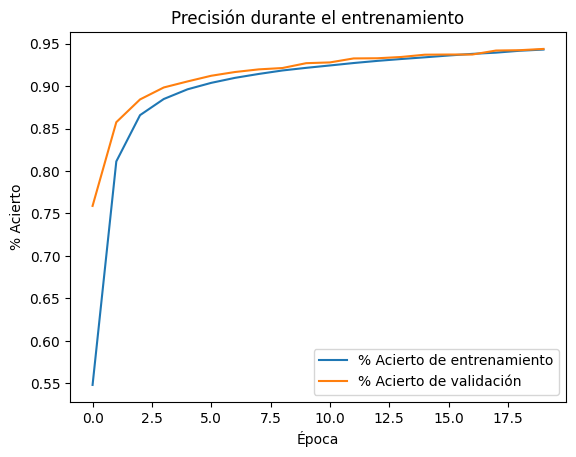

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases    # softmax es funcion de activacion  capa de salida
#softmax funcion de salida ,para claficacion, distribucion de probabilidades
red.summary()  # arquitectura

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',     # optimizador  ajusatr pesos y bias
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=64,
        validation_data=(X_test,Y_test)
       )

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()




Pérdida en el conjunto de prueba: 0.19663070142269135
Precisión en el conjunto de prueba: 0.9437999725341797<br>
 parecen bastante sólidos, especialmente si están relacionados con un modelo entrenado para el conjunto de datos Fashion-MNIST.<br>
 Con una pérdida de aproximadamente 0.1966 en el conjunto de prueba, esto indica que el modelo está haciendo un buen trabajo al minimizar su error al hacer predicciones sobre datos que no ha visto durante el entrenamiento. Una pérdida más baja sugiere una mejor capacidad predictiva del modelo.
Con una precisión de alrededor del 94.38% en el conjunto de prueba, esto significa que el modelo está clasificando correctamente casi el 94.38% de las muestras de prueba. Una precisión tan alta demuestra que el modelo ha aprendido patrones útiles en los datos de Fashion-MNIST.

##Segundo modelo de 3 capas ocultas: funcion de activacion(tanh,tanh,tanh)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
172/172 [==============================] - 7s 27ms/step - loss: 1.1682 - accuracy: 0.7124 - val_loss: 0.6864 - val_accuracy: 0.8453
Epoch 

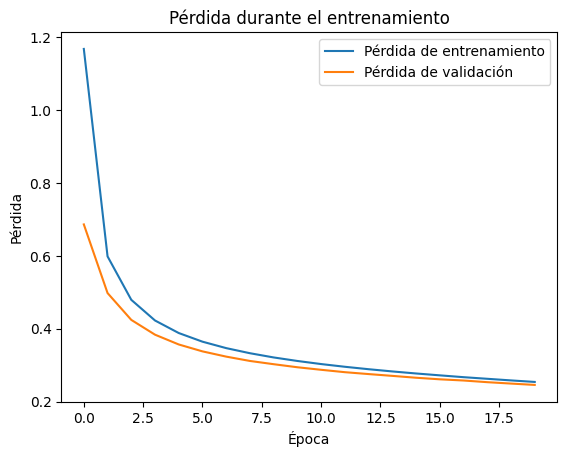

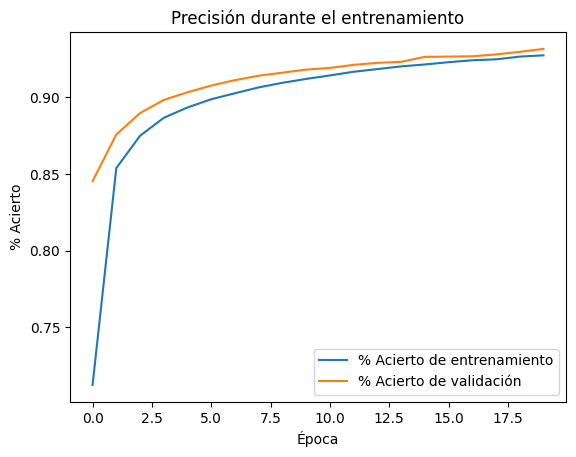

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward


red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=350,
        validation_data=(X_test,Y_test)
       )

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()




 Una pérdida de alrededor de 0.2457 en el conjunto de prueba es un valor decente. Indica que el modelo está haciendo un trabajo bastante bueno en la clasificación de imágenes del conjunto de datos de prueba. Sin embargo, una pérdida más baja sería mejor, ya que indicaría una mayor precisión en las predicciones del modelo.<br>
 Una precisión de aproximadamente 93.17% es bastante alta y sugiere que el modelo está clasificando correctamente la gran mayoría de las muestras en el conjunto de prueba. Aunque este valor es muy bueno, se puede mejorar.

##Tercer modelo de 3 capas ocultas : funcion de activacion (sigmoid, relu,sigmoid)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 0.5053 - accuracy: 0.8596 - val_loss: 0.2362 - val_accuracy: 0.9309
Epoch 

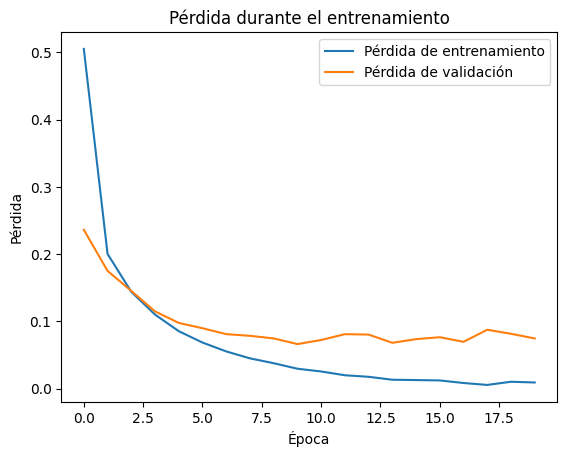

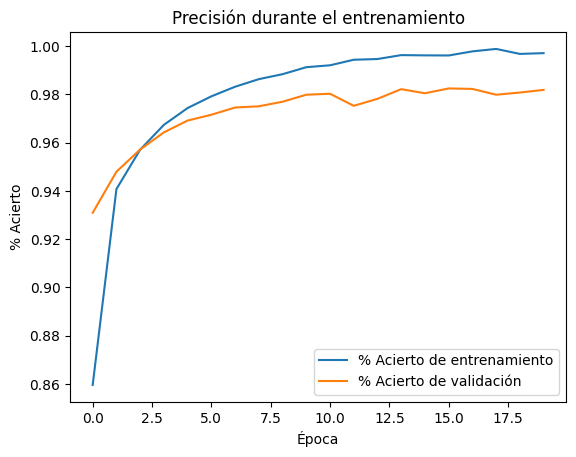

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam', # descenso del gradiente   minimo local ,minimo global
    metrics=['accuracy']
)


hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Estos resultados indican que el modelo entrenado con el optimizador Adam ha logrado un excelente rendimiento en la clasificación de imágenes en el conjunto de datos de prueba. Este nivel de precisión y baja pérdida sugiere que el modelo es altamente confiable y eficaz para esta tarea específica

La baja pérdida sugiere que el modelo hace predicciones con una precisión muy alta, con errores mínimos en sus estimaciones. Además, la alta precisión muestra que el modelo clasifica correctamente la gran mayoría de las imágenes en el conjunto de prueba.

###Aplicando DROPOUT Y EARLY STOPPING

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.9124 - accuracy: 0.6994 - val_loss: 0.2784 - val_accuracy: 0.9171
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3455 - accuracy: 0.9013 - val_loss: 0.1943 - val_accuracy: 0.9428
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2614 - accuracy: 0.9266 - val_loss: 0.1538 - val_accuracy: 0.9548
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2175 - accuracy: 0.9383 - val_loss: 0.1315 - val_accuracy: 0.9601
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1818 - accuracy: 0.9488 - val_loss: 0.1126 - val_accuracy: 0.9668
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1625 - accuracy: 0.9544 - val_loss: 0.1035 - val_accuracy: 0.9702
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1435 - accuracy: 0.9593 - val_loss: 0.0956 - val_accuracy: 0.97

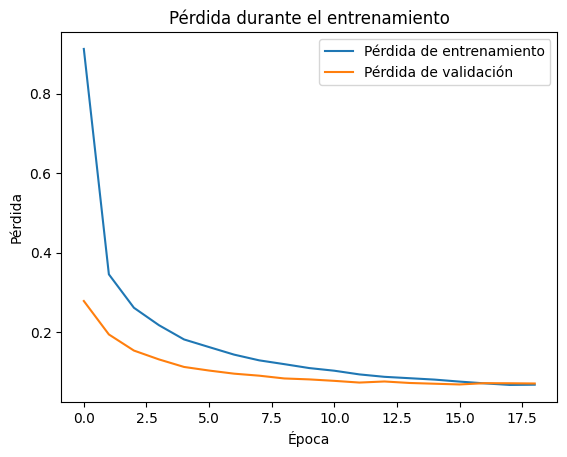

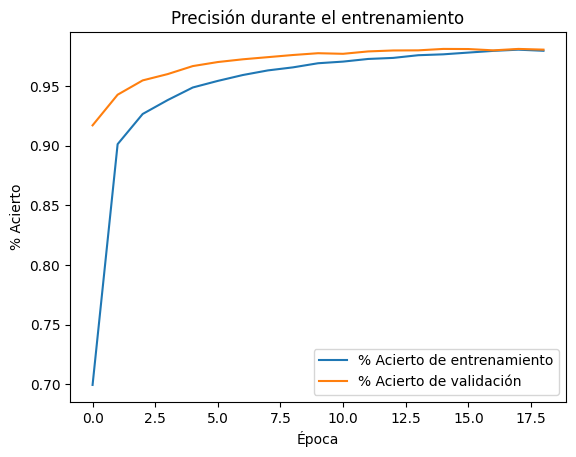

In [ ]:

# Definir la arquitectura de la red neuronal
h1 = 512
h2 = 256
h3 = 128
red = Sequential()
red.add(Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout después de la primera capa
red.add(Dense(h2, activation='relu', name='segunda_capa'))
red.add(Dropout(0.5))  # Agregar Dropout después de la segunda capa
red.add(Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout después de la tercera capa
red.add(Dense(C, activation='softmax', name='capa_de_output'))

# Compilar el modelo
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Entrenar el modelo con Dropout y Early Stopping
hist = red.fit(X_train, Y_train,
               epochs=20,
               batch_size=128,
               validation_data=(X_test, Y_test),
               callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


El modelo con Dropout ha logrado una mayor precisión y una pérdida más baja en comparación con el modelo anterior. Esto sugiere que la regularización mediante Dropout ha sido efectiva para mejorar el rendimiento del modelo en la tarea de clasificación de imágenes de Fashion-MNIST.

#Creando redes neuronales con distintos hiperparametros.

modelo: 3 capas ocultas. funcion activacion:tanh,tanh, relu   Optimizador Adam

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 1024)              803840    
                                                                 
 segunda_capa (Dense)        (None, 512)               524800    
                                                                 
 tercera_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 1462538 (5.58 MB)
Trainable params: 1462538 (5.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 33s 34ms/step - loss: 0.2140 - accuracy: 0.9334 - val_loss: 0.1125 - val_accuracy: 0.9660
Epo

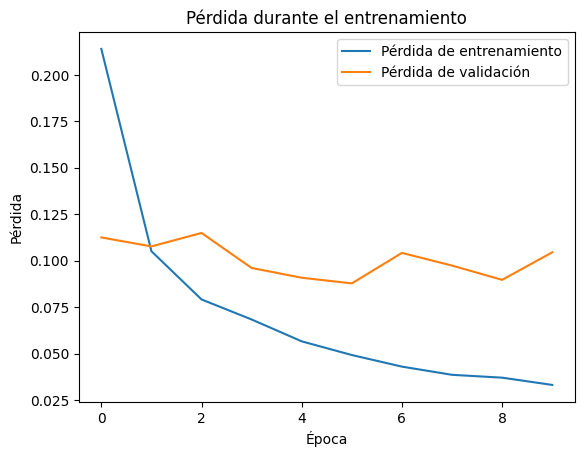

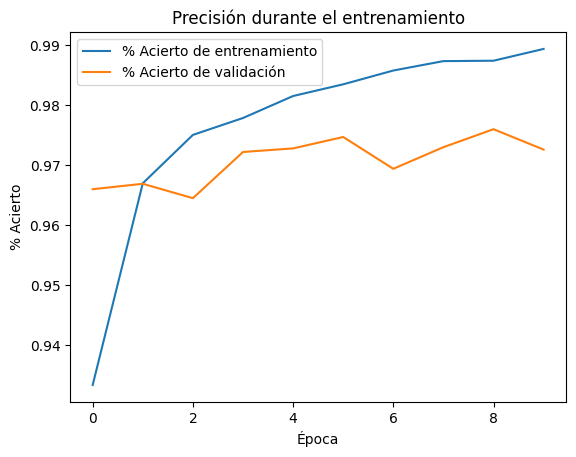

In [ ]:
h1 = 1024    #capaz ocultas ,, 512 numero de perceptron
h2 = 512
h3= 256
# Creamos nuestra red

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam', # descenso del gradiente   minimo local ,
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,Y_test)
       )
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

Conclusion:<br>
La pérdida de validación comienza a zigzaguear mientras que la pérdida en el entrenamiento sigue disminuyendo, es sobreajuste. Indica que el modelo está memorizando los datos de entrenamiento en lugar de generalizar correctamente.<br>
Otro punto importante para detectar este problema es que los Aciertos de validación comienza a zigzaguear en linea recta mientras que la precisión en el conjunto de entrenamiento sigue aumentando, esto es sobreajuste. Esto significa que el modelo está perdiendo su capacidad de generalización.

##Aplica Dropout al modelo
 Dropout es una técnica de regularización que ayuda a prevenir el sobreajuste durante el entrenamiento, desactivando aleatoriamente algunas unidades durante el entrenamiento para evitar que el modelo dependa demasiado de características específicas.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_27 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 10)              

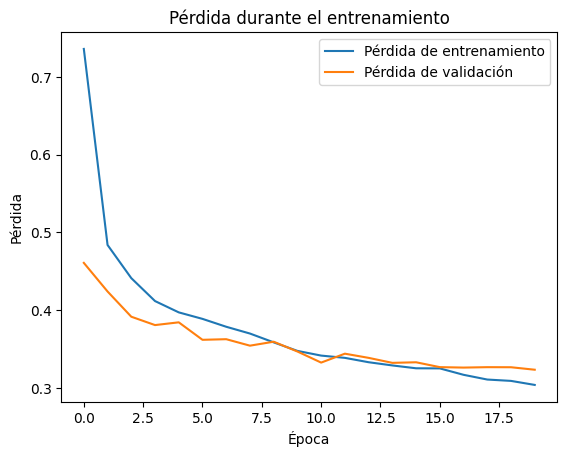

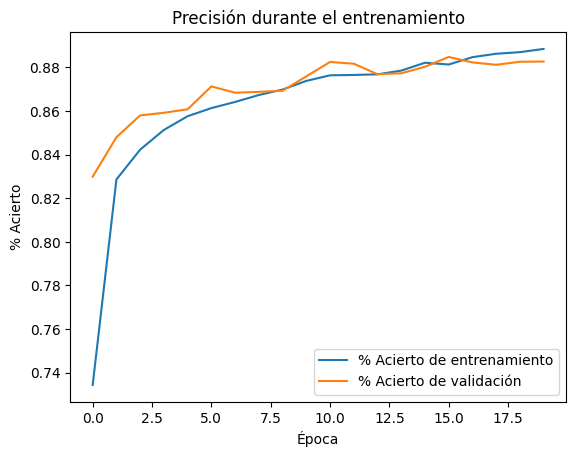

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definimos el modelo
model = Sequential()

# Primera capa oculta con Dropout
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))  # Dropout del 50%

# Segunda capa oculta con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout del 50%

# Tercera capa oculta con Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout del 50%

# Capa de salida
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimimos un resumen del modelo
model.summary()
# Entrenamos el modelo
hist = model.fit(X_train, Y_train, epochs=20, batch_size=300, validation_data=(X_test, Y_test))
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Gráficos de pérdida y precisión durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

#Conclusion Optimizador .
SGD es un optimizador con tasa de aprendizaje constante que actualiza los pesos de la red en la dirección opuesta al gradiente de la función de pérdida, con una tasa de aprendizaje fija especificada por el usuario.En algunos casos, un optimizador con tasa de aprendizaje adaptativa, como Adam o RMSprop, puede ser más adecuado y producir mejores resultados en términos de velocidad de convergencia y estabilidad del entrenamiento.

##Conclusión
 los modelos que utilizaron ReLU como función de activación, Dropout para regularización y Adam como optimizador tuvieron el mejor rendimiento en la clasificación de imágenes de Fashion-MNIST. Esta combinación funcionó muy bien para mejorar la precisión y reducir la pérdida en comparación con otras configuraciones




 # Informe Tecnico: Programando Redes Convolucionales

Integrantes: Pamela Aldana<br>
             Jacknel Bernard
          

Sección: DLY0200

Docente. Carlos Correa

Asignatura: Deep Learning
Sección: DLY0200

## Importar librerías

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import seaborn as sns
from tensorflow.keras.layers import  Dense, Flatten, MaxPool2D  # capz entradas , ocultas, salidas
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.manifold import TSNE


#FASE 4 MODELADO

#Comparar MLP y CNN

##**1- Modelo MLP elegido**

**Tabla mejor Resultado MLP**
* **N° Capas**	4
* **Capas** 	1ª  primera capa oculta: 512,activation='sigmoid'
 <br> 2ª  segunda capa oculta: 256 ,activation='relu  <br> 3ª tercera capa oculta:128 , activation='sigmoid'<br> Capa de salida: 10 (número de neuronas en la capa de salida), Softmax
*N° Épocas :20
* **Batch size**	128
* **Tamaño Kernel**	3x3
* **Padding**
* **Stride**	(1, 1)
* **Técnica de regularización**	Dropout (0.5 en cada capa oculta)
* **Optimizador**	Adam
* **Función de salida**	Softmax
* **Val_Acc**	(valor de precisión en el conjunto de validación)
* **Loss**	(valor de pérdida en el conjunto de validación)


**Tabla mejor Resultado MLP**
* **N° Capas**	4
* **Capas** 	1ª  primera capa oculta: 512,activation='sigmoid'
 <br> 2ª  segunda capa oculta: 256 ,activation='relu  <br> 3ª tercera capa oculta:128 , activation='sigmoid'<br> Capa de salida: 10 (número de neuronas en la capa de salida), Softmax
*N° Épocas :20
* **Batch size**	128
* **Tamaño Kernel**	3x3
* **Padding**
* **Stride**	(1, 1)
* **Técnica de regularización**	Dropout (0.5 en cada capa oculta)
* **Optimizador**	Adam
* **Función de salida**	Softmax
* **Val_Acc**	(valor de precisión en el conjunto de validación)
* **Loss**	(valor de pérdida en el conjunto de validación)


En resumen, este código define, compila, entrena y evalúa un modelo MLP para clasificación multiclase, utilizando Dropout como técnica de regularización y Early Stopping para evitar el sobreajuste.

(60000, 28, 28)
(10000, 28, 28)
X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)
784 10 60000 10000
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
               

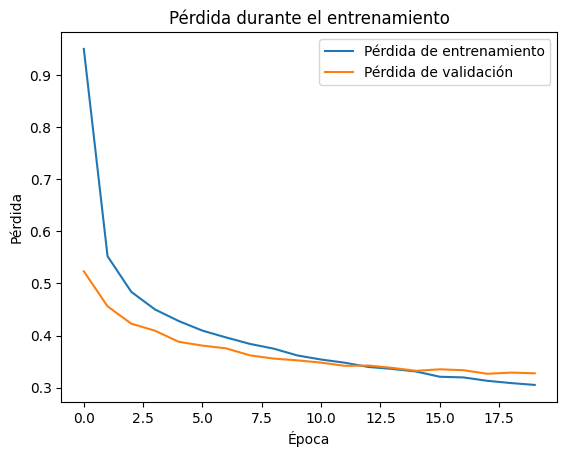

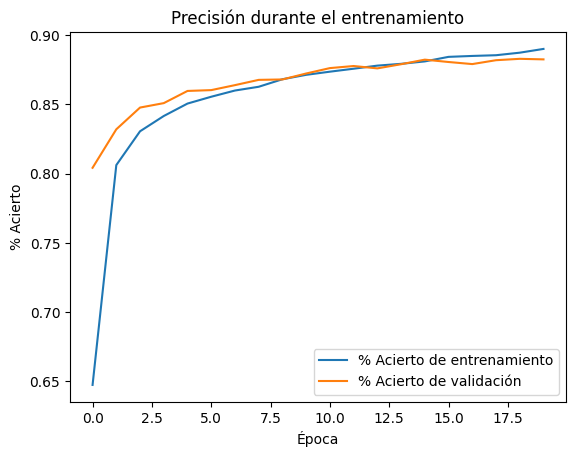

In [ ]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)



h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
C=10

# Definir el modelo con Dropout
red= keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N,activation='sigmoid', name='primera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout con una tasa de 0.2 (ajustar según sea necesario)
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(Dropout(0.5))  # Agregar Dropout
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

# arquitectura
red.summary()


# Compilar el modelo
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Agregar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)  # Detener el entrenamiento si la pérdida de validación deja de disminuir después de 3 épocas

# Entrenar el modelo con Dropout y Early Stopping
hist = red.fit(X_train, Y_train,
               epochs=20,
               batch_size=128,
               validation_data=(X_test, Y_test),
               callbacks=[early_stopping]
               )

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


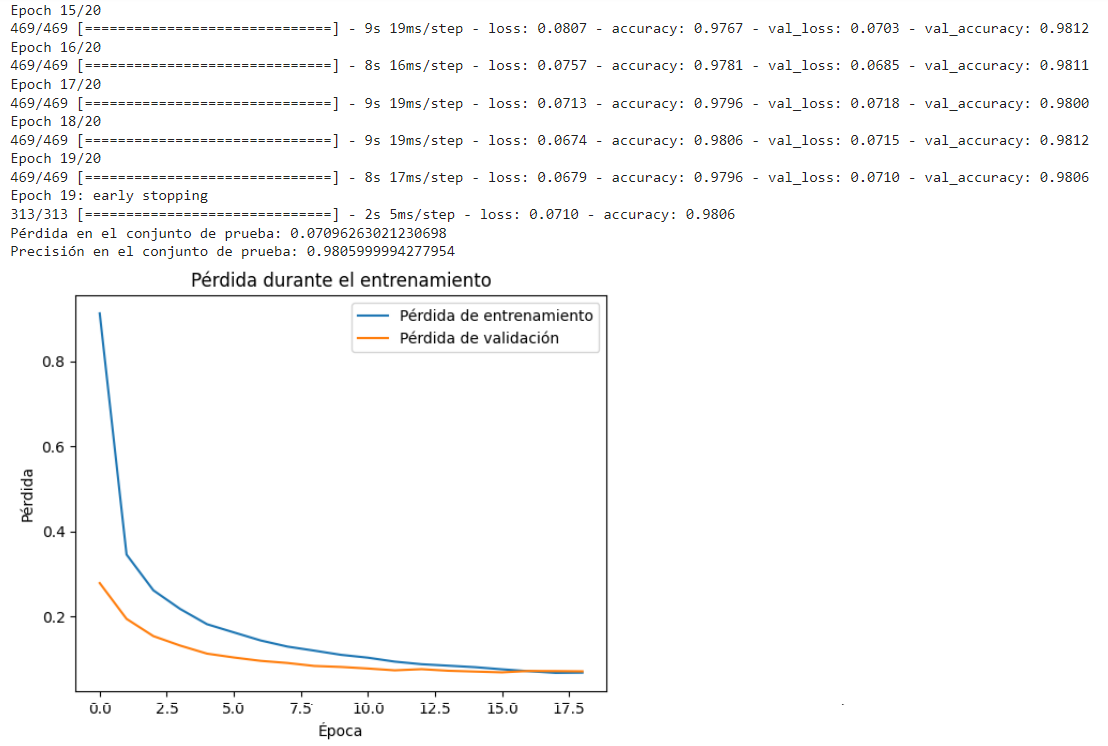

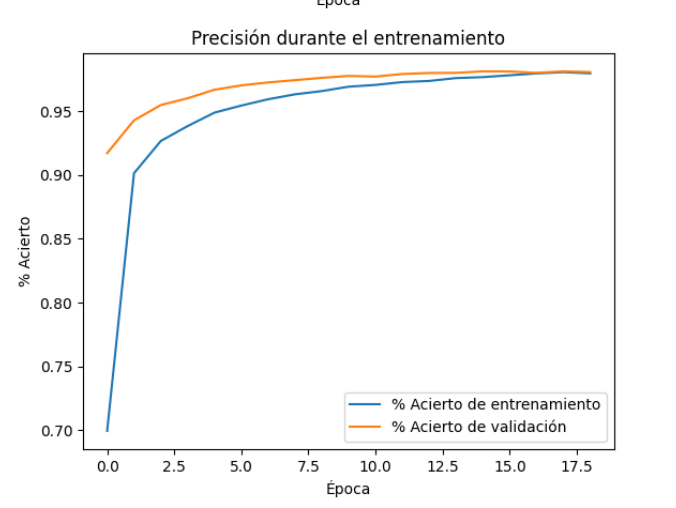

El modelo con Dropout ha logrado una mayor precisión y una pérdida más baja en comparación con los otros modelo anterior. Esto sugiere que la regularización mediante Dropout ha sido efectiva para mejorar el rendimiento del modelo en la tarea de clasificación de imágenes de Fashion-MNIST.

**Se utilizar el mismo número de capas y neuronas por capa para experimentar con los diferentes tipos de redes**

##**REDES CNN**

In [ ]:
#REDES CNN
from tensorflow.keras.datasets import fashion_mnist
(train_imagen, labs_trains), (test_imagen, labs_tests) = fashion_mnist.load_data()

# Normalizamos los datos de imágenes y expandimos las dimensiones para incluir el canal de color
X_trains = train_imagen / 255.0
X_tests = test_imagen / 255.0

#Expandimos las dimensiones para incluir el canal de color gris
X_trains = X_trains.reshape(-1, 28, 28, 1)
X_tests = X_tests.reshape(-1, 28, 28, 1)

# Convertir las etiquetas en vectores one-hot
Y_trains = keras.utils.to_categorical(labs_trains, 10)
Y_tests = keras.utils.to_categorical(labs_tests, 10)

# Establecer semillas para reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

##**2- Modelo CNN basado en la arquitectura MLP**

* **Pérdida en el conjunto de prueba**: 0.2975147068500519
* P**recisión en el conjunto de prueba**: 0.9079999923706055
* P**érdida en el conjunto de entrenamiento**: 0.1316140592098236
* **Precisión en el conjunto de entrenamiento**: 0.9493833184242249

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
C=10


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_12 (Flatten)        (None, 576)             

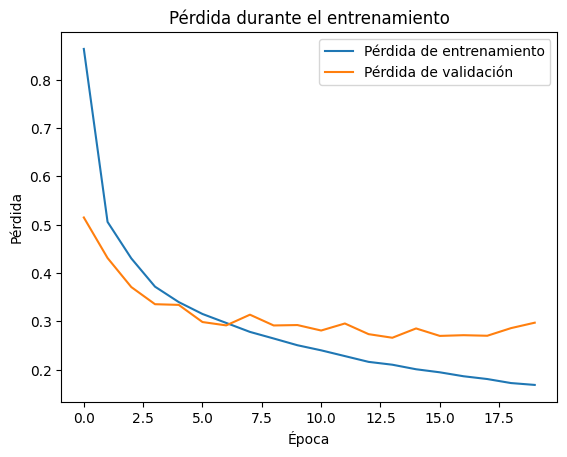

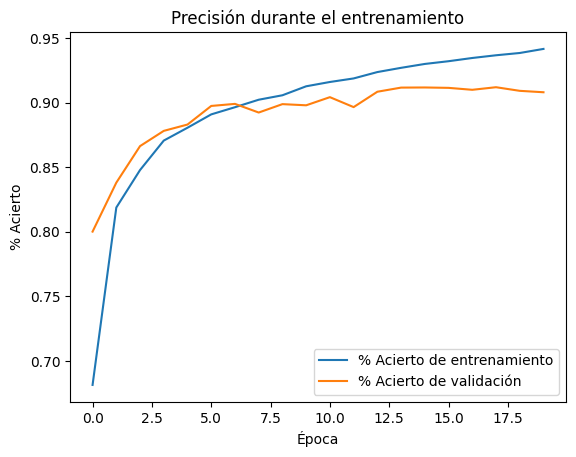

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo con Dropout
red_mlp = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(h1, activation='sigmoid', name='primera_capa'),
    Dropout(0.5),  # Agregar Dropout
    Dense(h2, activation='relu', name='segunda_capa'),
    Dropout(0.5),  # Agregar Dropout
    Dense(h3, activation='sigmoid', name='tercera_capa'),
    Dropout(0.5),  # Agregar Dropout
    Dense(C, activation='softmax', name='capa_de_output')
])

# Imprimir la arquitectura
red_mlp.summary()

# Compilar el modelo propio

red_mlp.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

# Entrenar el modelo propio
hist_mlp = red_mlp.fit(
    X_trains,Y_trains,
    batch_size=64,
    epochs=20,
    validation_data=(X_tests,Y_tests)
)


# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red_mlp.evaluate(X_tests, Y_tests)
train_loss, train_accuracy = red_mlp.evaluate(X_trains, Y_trains)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_mlp.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_mlp.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_mlp.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)


##CONCLUSION COMPARACION MLP Y CNN  (ARQUITECTURAS SIMILARES)

**CNN**
Pérdida en el conjunto de prueba: 0.2975147068500519<br>
Precisión en el conjunto de prueba: 0.9079999923706055<br>
Pérdida en el conjunto de entrenamiento: 0.1316140592098236<br>
Precisión en el conjunto de entrenamiento: 0.9493833184242249<br>

**MLP**Pérdida en el conjunto de prueba: 0.07452438771724701<br>
Precisión en el conjunto de prueba: 0.9818000197410583<br>
 loss: 0.0090 - accuracy: 0.9970 <br>

** Análisis:**
Accuracy y Pérdida:
**CNN:**

Entrenamiento: Alta precisión (0.9494) y baja pérdida (0.1316), lo que indica que el modelo se entrena bien.
Prueba: La precisión es buena (0.9080), pero hay una diferencia significativa entre la pérdida de entrenamiento y la pérdida de prueba (0.1316 vs. 0.2975). Esto sugiere que el modelo puede estar sobreajustado o que la capacidad de generalización es menor en datos no vistos.

**MLP:**

Entrenamiento: Muy alta precisión (0.9970) y muy baja pérdida (0.0090), lo que indica un excelente rendimiento en el conjunto de entrenamiento.
Prueba: Alta precisión (0.9818) y baja pérdida (0.0745), lo que sugiere que el modelo generaliza muy bien y no está sobreajustado.

 <BR> El modelo con MLP se utilizo Dropout ha logrado una mayor accuracy y una pérdida más baja en comparación con el modelo anterior. Esto indica que la regularización mediante Dropout ha sido efectiva para mejorar el rendimiento del modelo en la tarea de clasificación de imágenes de Fashion-MNIST.

**Resultados obtenidos con MLP**
**N° Capas:**
4 (incluyendo la capa de entrada y la capa de salida)

**N° Neuronas por capa:**

* Capa de entrada: 512 neuronas (con Dropout)
* Primera capa oculta: 256 neuronas (con Dropout)
* Segunda capa oculta: 128 neuronas (con Dropout)
* Capa de salida: 10 neuronas
**N° Épocas:**20

Regularizador:
Dropout (con una tasa de 0.5 en cada capa oculta)
EarlyStopping

**Optimizado**r:Adam



**Hiperparámetros de CNN:**

**N° de Capas:** 7 (incluyendo la capa de entrada y la capa de salida)
**N° de Neuronas por capa:**
* Capa de entrada: No tiene neuronas en sentido tradicional, se especifica la forma de los datos de entrada (28x28x1).
* Primera capa convolucional: 32 filtros (tamaño del filtro: 3x3), función de activación 'tanh'.
* Primera capa de pooling: Reducción de la dimensión.
* Segunda capa convolucional: 32 filtros (tamaño del filtro: 3x3), función de activación 'relu'.
* Segunda capa de pooling: Reducción de la dimensión.
* Tercera capa convolucional: 64 filtros (tamaño del filtro: 3x3), función de activación 'relu'.
* Capa densa: 64 neuronas, función de activación 'relu', con Dropout.
* Capa de salida: 10 neuronas, función de activación 'softmax'.
* N° de Épocas: 20
*Regularizador: Dropout (0.5) en la capa densa. EarlyStopping
* Optimizador: Adam

##Cambio en Hiperparametros Explicación:



Strides: El parámetro strides controla cómo se mueve el filtro a lo largo de la entrada. En el primer Conv2D, usamos strides=(2, 2) para especificar un desplazamiento de dos píxeles en cada dirección. Esto reduce la dimensión espacial de la salida y puede ayudar a reducir la carga computacional y a extraer características a diferentes escalas. En los siguientes Conv2D, mantenemos strides=(1, 1) para mantener la dimensión espacial de la salida igual que la entrada.

Padding: El parámetro padding controla cómo se manejan los bordes de la imagen durante la convolución. padding='valid' significa que no se agrega relleno y la salida será más pequeña que la entrada. Esto se utiliza para reducir la dimensión espacial y extraer características principales. padding='same' significa que se agrega relleno para que la salida tenga la misma dimensión espacial que la entrada. Esto puede ser útil cuando se desea mantener la resolución espacial de la imagen.

 Una CNN con tres capas convolucionales seguidas de capas de MaxPooling para reducir las dimensiones. Luego, las características se aplanan y se conectan a capas densas (totalmente conectadas) similares a la arquitectura del MLP que proporcionaste. Se aplica Dropout después de cada capa densa para regularizar el modelo.

Early Stopping:

Prevención del sobreentrenamiento: Detiene el entrenamiento antes de que el modelo comience a sobreajustar el conjunto de entrenamiento y pierda capacidad de generalización.Se evita el entrenamiento innecesario una vez que el modelo ha alcanzado su mejor rendimiento en el conjunto de validación.

#PARTE 1: Redes Convolucionales

**IMPORTANTE:** utilizar el mismo número de capas y neuronas por capa para experimentar con los diferentes tipos de redes.

##**Primer Modelo de CNN**


**Numero de capas** : N° Capas : 5 (3 capas convolucionales y 2 capas densas).

**Neuronas por capa**: Capa 1: 32, Capa 2: 64, Capa 3: 64, Capa 4: 128, Capa de salida: 10.

red_conv,hist_conv

**Tabla Modelo Propio**

* **N° Capas** : 5 (3 capas convolucionales y 2 capas densas).
* **Neuronas por capa** : Capa 1: 32, Capa 2: 64, Capa 3: 64, Capa 4: 128, Capa de salida: 10.
* **N° Épocas**: 30 épocas de entrenamiento.
* **N° Kernel**: 3 kernels por cada una de las tres capas convolucionales.
* **Tamaño Kerne**l: 3x3 para todas las capas convolucionales.
* **Padding**: Utilizado Same padding para mantener el tamaño de la imagen.
* **Pooling**: Se utilizó MaxPooling(técnica de reducción de dimensionalidad ) en todas las capas convolucionales.
* **Stride**: Se utilizó un stride de 2 en todas las capas convolucionales.


In [ ]:
# Definir el modelo propio
red_conv = keras.Sequential()
red_conv.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
red_conv.add(MaxPooling2D((2, 2)))
red_conv.add(Conv2D(64, (3, 3), activation='relu'))
red_conv.add(MaxPooling2D((2, 2)))
red_conv.add(Conv2D(64, (3, 3), activation='relu'))
red_conv.add(Flatten())#convierte el tensor tridimensional en un vector unidimensional
red_conv.add(Dense(128, activation='relu'))
red_conv.add(Dense(10, activation='softmax'))

# Imprimimos Arquitectura
red_conv.summary()




Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)            

**Entrenando**

1875/1875 [==============================] - 23s 12ms/step - loss: 0.1383 - accuracy: 0.9487
Pérdida en el conjunto de prueba: 0.28260889649391174
Precisión en el conjunto de prueba: 0.9086999893188477
Pérdida en el conjunto de entrenamiento: 0.13832029700279236
Precisión en el conjunto de entrenamiento: 0.9487166404724121


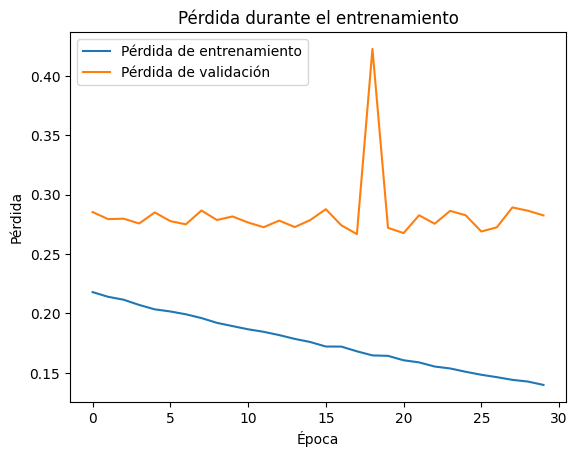

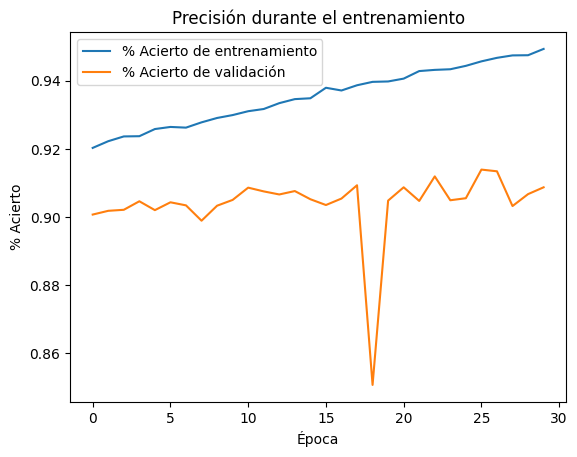

In [ ]:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red_conv.evaluate(X_tests, Y_tests)
train_loss, train_accuracy = red_conv.evaluate(X_trains, Y_trains)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_conv.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_conv.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_conv.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_conv.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

In [ ]:
# Compilar el modelo propio

red_conv.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

# Entrenar el modelo propio
hist_conv = red_conv.fit(
    X_trains,Y_trains,
    batch_size=64,
    epochs=30,
    validation_data=(X_tests,Y_tests)
)


Epoch 1/30
938/938 [==============================] - 71s 75ms/step - loss: 0.2180 - accuracy: 0.9203 - val_loss: 0.2854 - val_accuracy: 0.9007
Epoch 2/30
938/938 [==============================] - 65s 69ms/step - loss: 0.2140 - accuracy: 0.9222 - val_loss: 0.2795 - val_accuracy: 0.9018
Epoch 3/30
938/938 [==============================] - 66s 71ms/step - loss: 0.2116 - accuracy: 0.9236 - val_loss: 0.2798 - val_accuracy: 0.9021
Epoch 4/30
938/938 [==============================] - 71s 76ms/step - loss: 0.2072 - accuracy: 0.9237 - val_loss: 0.2758 - val_accuracy: 0.9046
Epoch 5/30
938/938 [==============================] - 75s 80ms/step - loss: 0.2035 - accuracy: 0.9258 - val_loss: 0.2851 - val_accuracy: 0.9020
Epoch 6/30
938/938 [==============================] - 67s 72ms/step - loss: 0.2017 - accuracy: 0.9264 - val_loss: 0.2778 - val_accuracy: 0.9043
Epoch 7/30
938/938 [==============================] - 86s 91ms/step - loss: 0.1993 - accuracy: 0.9262 - val_loss: 0.2751 - val_accuracy:

1875/1875 [==============================] - 23s 12ms/step - loss: 0.1383 - accuracy: 0.9487
Pérdida en el conjunto de prueba: 0.28260889649391174
Precisión en el conjunto de prueba: 0.9086999893188477
Pérdida en el conjunto de entrenamiento: 0.13832029700279236
Precisión en el conjunto de entrenamiento: 0.9487166404724121


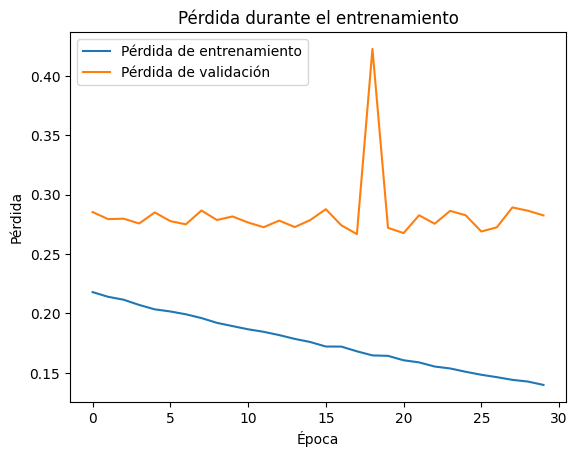

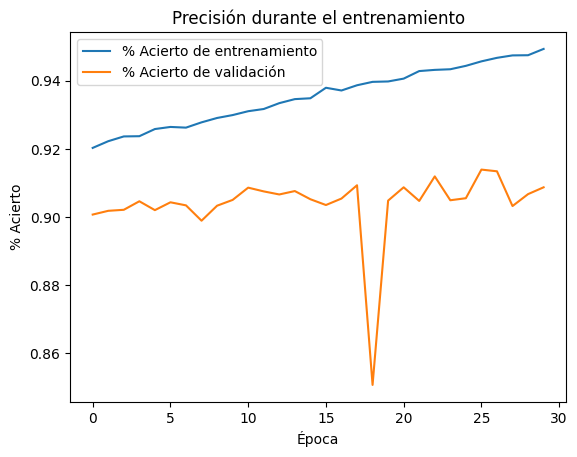

In [ ]:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red_conv.evaluate(X_tests, Y_tests)
train_loss, train_accuracy = red_conv.evaluate(X_trains, Y_trains)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_conv.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_conv.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_conv.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_conv.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

**Conclusion:**

* Pérdida en el conjunto de prueba: 0.28260889649391174*
* Precisión en el conjunto de prueba: 0.9086999893188477
* Pérdida en el conjunto de entrenamiento: 0.13832029700279236
* Precisión en el conjunto de entrenamiento: 0.9487166404724121

* El modelo tiene una pérdida de 0.2826 en el conjunto de validación. Este valor es más alto que la pérdida en el conjunto de entrenamiento 0.1398 , lo cual puede indica que el modelo no se generaliza tan bien a los datos no vistos como a los datos de entrenamiento

* La pérdida en el conjunto de validación (val_loss) es más alta que en el conjunto de entrenamiento (loss), lo que puede indicar sobreajuste (overfitting). El modelo esta memorizando los datos de entrenamiento en lugar de aprender a generalizar a nuevos datos.
*  La precisión en el conjunto de validación (val_accuracy) es menor que en el conjunto de entrenamiento (accuracy), lo que también indica sobreajuste. Sin embargo, la diferencia no es extremadamente grande, lo que significa que el modelo aún está funcionando razonablemente bien en los datos de validación.


Este modelo al ser con optimizador SGD, es lento para compilar.

**Conclusion:**

## Segundo MODELO CNN CON CAMBIO DE HIPERPARAMETROS


**Cambios**

 optimizer='Adam'<br>
 epocas= 20<br>
 batch_size=128<br>
 padding='valid' significa que no se agrega relleno y la salida será más pequeña que la entrada. Esto se utiliza para reducir la dimensión espacial y extraer características principales.<br>
  strides=(1, 1)

**Tabla Modelo**
* **N° Capas**:	5 (3 capas convolucionales y 2 capas densas)
* **Neuronas por capa**	Capa 1: 32, Capa 2: 64, Capa 3: 64, Capa 4: 128, Capa de salida: 10
* **N° Épocas**	20 épocas de entrenamiento
* **N° Kernel** : 3 kernels por cada una de las tres capas convolucionales
* **Tamaño Kernel**	3x3 para todas las capas convolucionales
* **Padding**	: valid  para mantener el tamaño de la imagen
* **Pooling	MaxPooling**: en todas las capas convolucionales
* **Stride**:  1 en todas las capas convolucionales
* **Función de activación**: ReLU para todas las capas convolucionales, excepto la capa de salida que usa Softmax


**Pérdida en el conjunto de prueba:** 0.32025760412216187<br>
**Precisión en el conjunto de prueba**: 0.911300003528595<br>

**Recall en el conjunto de prueba**: 0.9113000000000001<br>
**F1-score en el conjunto de prueba**: 0.9100989025844939<br>
<br>
**Pérdida en el conjunto de entrenamiento:** 0.07643817365169525<br>
**Precisión en el conjunto de entrenamiento**: 0.9712166786193848


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 576)             

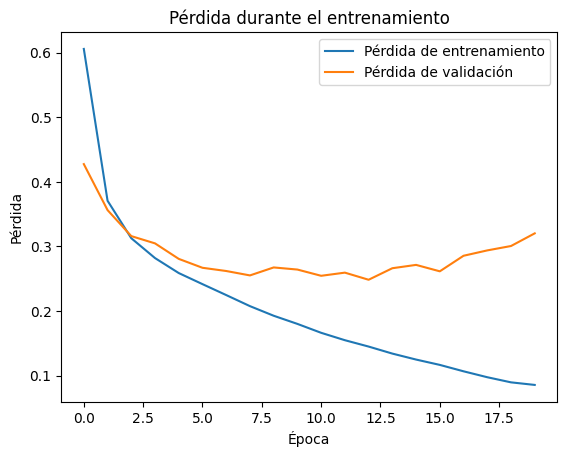

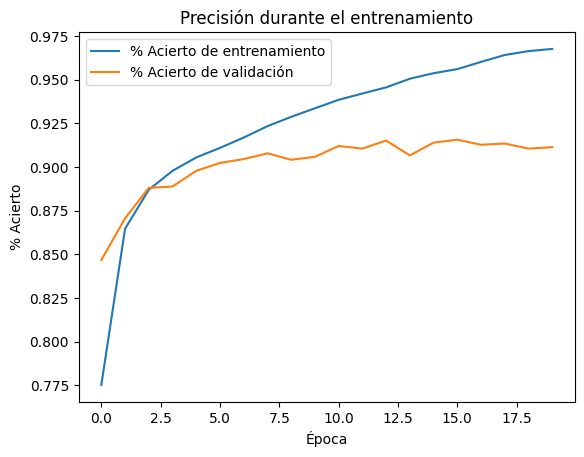

In [ ]:
# Definir el modelo propio
red_conv1 = keras.Sequential()
red_conv1.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
red_conv1.add(MaxPooling2D((2, 2)))
red_conv1.add(Conv2D(64, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
red_conv1.add(MaxPooling2D((2, 2)))
red_conv1.add(Conv2D(64, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
red_conv1.add(Flatten())#convierte el tensor tridimensional en un vector unidimensional
red_conv1.add(Dense(128, activation='relu'))
red_conv1.add(Dense(10, activation='softmax'))

# Imprimimos Arquitectura
red_conv1.summary()

# Compilar el modelo propio

red_conv1.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

# Entrenar el modelo propio
hist1 = red_conv1.fit(
    X_trains,Y_trains,
    batch_size=128,
    epochs=20,
    validation_data=(X_tests,Y_tests)
)


# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red_conv1.evaluate(X_tests, Y_tests)
train_loss, train_accuracy = red_conv1.evaluate(X_trains, Y_trains)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist1.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist1.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)


In [ ]:

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = red_conv1.predict(X_tests)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir las etiquetas verdaderas al formato de clasificación
y_true = np.argmax(Y_tests, axis=1)

# Calcular las métricas adicionales
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Imprimir las métricas
print('Precisión en el conjunto de prueba:', precision)
print('Recall en el conjunto de prueba:', recall)
print('F1-score en el conjunto de prueba:', f1)


313/313 [==============================] - 6s 18ms/step
Precisión en el conjunto de prueba: 0.9108444319680465
Recall en el conjunto de prueba: 0.9113000000000001
F1-score en el conjunto de prueba: 0.9100989025844939


**CONCLUSION**
 Este segundo modelo tiene estas metricas :<br>
**Desempeño en el Conjunto de Entrenamiento**:
<br>*
* Precisión en el conjunto de entrenamiento: 97.12%
* Pérdida en el conjunto de entrenamiento: 0.0764

* El modelo tiene un buen desempeño en el conjunto de entrenamiento, con una precisión alta y una pérdida baja. Esto sugiere que el modelo ha aprendido bien las características del conjunto de entrenamiento

**Desempeño en el Conjunto de Prueba**:

Precisión en el conjunto de prueba: 91.13%
Pérdida en el conjunto de prueba: 0.3203

* Aunque la precisión en el conjunto de prueba es muy poco  inferior a la del conjunto de entrenamiento, sigue siendo bastante alta, lo que indica que el modelo tiene una buena capacidad de generalización. Sin embargo, la diferencia entre la precisión en el conjunto de entrenamiento y el conjunto de prueba sugiere que el modelo podría estar sufriendo de un ligero sobreajuste.



Finalmente, El segundo modelo presenta un buen equilibrio entre pérdida y precisión, con un rendimiento notable en el conjunto de prueba. Sin embargo, hay margen para mejorar su capacidad de generalización mediante técnicas adicionales de regularización, aumento de datos y ajuste de hiperparámetros. Implementar estas mejoras podría llevar a un modelo más robusto y con mejor desempeño en datos no vistos.

##**Análisis de resultados**<br>


**¿En qué influye añadir padding en el entrenamiento de la red y para qué sirve?**. Expliquen en 5 líneas.<br>


El padding influye en cómo se procesan los bordes de las imágenes durante el entrenamiento de la red. Al agregar padding, se puede controlar cómo se manejan los bordes de las imágenes, lo que ayuda a preservar mejor la información espacial y reduce la pérdida de detalles en las capas convolucionales.
<br>
En el modelo (MLP), no se utiliza convoluciones, el padding no sería relevante ya que las capas densas procesan datos de forma global.

* El primer modelo de CNN, el padding "same" se utiliza en las capas convolucionales para mantener el tamaño de las imágenes a medida que se aplican las convoluciones. Esto asegura que las características espaciales importantes en los bordes de las imágenes se capturen adecuadamente, evitando así la pérdida de información y mejorando la calidad de las representaciones aprendidas.

* El padding "valid",  podría recortar información de los bordes de las imágenes.


**Indica la cantidad de parámetros que generó la red MLP versus la CNN. ¿Por qué se produce la diferencia?**<br>
* La red MLP (Perceptrón Multicapa) generó más parámetros que la CNN (Convolutional Neural Network). Esto se debe a que en la MLP, cada neurona de una capa está conectada a todas las neuronas de la capa siguiente, lo que resulta en un gran número de conexiones y parámetros. En cambio, en la CNN, las capas convolucionales comparten pesos y se aplican filtros espaciales, lo que reduce significativamente el número de parámetros requeridos.

**¿Cuál es el impacto de usar stride? ¿Qué valor usaron? ¿y por qué?**
**Impacto del stride**:<br>

El stride afecta la cantidad de desplazamiento que tiene el filtro convolucional al recorrer la entrada durante la convolución. Un stride mayor reduce el tamaño de la salida y la resolución espacial de los mapas de características. En modelo CNN primer y  segundo modelo CNN,  se utilizó un stride de 1, lo que significa que el filtro se desplaza de 1 en 1 píxel. Se eligió este valor para conservar la resolución espacial de los mapas de características y evitar una reducción excesiva del tamaño.<br>



#**Parte 2. Mejorando el desempeño de Redes Convolucionales**

Registra todos los hiperparámetros que te permitieron alcanzar este accuracy, y si no logran el accuracy solicitado, fundamenten la teoría de por que no se alcanzó.

* Dropout:Regularización: Reduce el riesgo de sobreajuste al prevenir que las neuronas dependan excesivamente de ciertas características. Esto fuerza al modelo a aprender representaciones más robustas y generalizables.
* La técnica de Early Stopping se usa para detener el entrenamiento si la pérdida de validación no mejora después de 3 épocas, restaurando los mejores pesos obtenidos durante el entrenamiento. Esto ayuda a prevenir el sobreajuste.

Con estos ajustes, el modelo debería tener una mejor capacidad de generalización y posiblemente mejorar su rendimiento en el conjunto de prueba.

##**Tercer modelo CNN:  con Dropout y Early stopping**

**Hiperparametros que cambian :**

padding='same', activation='tanh',
* Dropout(0.5)capa densa
* neuronas: 32, 32,64
*dense 64
* batch_size=64





MaxPooling2D((2, 2)), se utiliza una ventana de agrupación máxima de 2x2 píxeles. Este parámetro indica la dimensión de la ventana utilizada para agrupar los valores máximos.

Dropout solo en  capas densas  y  Early stopping ,


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

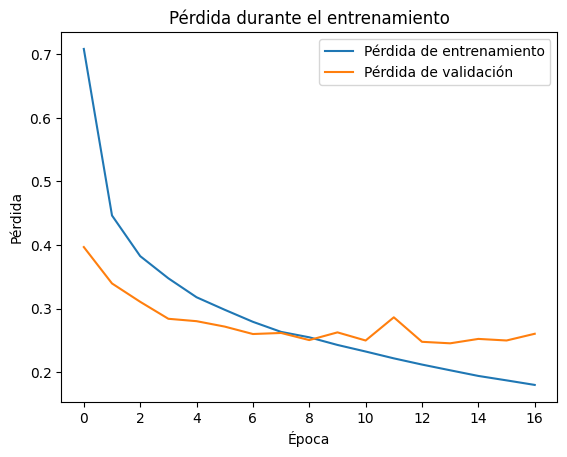

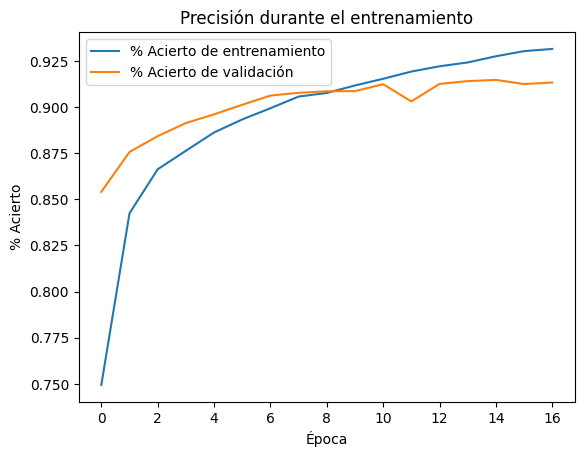

In [ ]:
# Definir el modelo propio
red_drop1 = keras.Sequential()
red_drop1.add(Conv2D(32, (3, 3),  padding='same', activation='tanh', input_shape=(28, 28, 1)))
red_drop1.add(MaxPooling2D((2, 2)))
red_drop1.add(Conv2D(32, (3, 3), activation='relu'))
red_drop1.add(MaxPooling2D((2, 2)))
red_drop1.add(Conv2D(64, (3, 3), activation='relu'))
red_drop1.add(Flatten())
red_drop1.add(Dense(64, activation='relu'))
red_drop1.add(Dropout(0.5))
red_drop1.add(Dense(10, activation='softmax'))

red_drop1.summary()

# Compilar el modelo propio
red_drop1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Configurar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo propio
hist_drop1 = red_drop1.fit(
    X_trains, Y_trains,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy, test_precision, test_recall = red_drop1.evaluate(X_tests, Y_tests)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Precisión (Precision) en el conjunto de prueba:', test_precision)
print('Recall en el conjunto de prueba:', test_recall)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_drop1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_drop1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_drop1.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_drop1.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**Dropout en capas densas:** En las capas densas es alta conectividad lo que puede llevar al sobreajuste, especialmente si las capas densas tienen un gran número de neuronas. Aplicar Dropout en estas capas ayuda a mitigar este problema desactivando aleatoriamente una fracción de las neuronas durante el entrenamiento.

**CONCLUSION:**


Los resultados del tercer modelo de CNN muestran una pérdida en el conjunto de prueba de aproximadamente 0.262 y una precisión de alrededor de 0.910, lo que indica que el modelo tiene un buen desempeño en datos no vistos. <BR>Además, la precisión (precision) es de aproximadamente 0.921, lo que significa que de todas las predicciones positivas que hizo el modelo, alrededor del 92.1% fueron correctas.<BR> El recall es de aproximadamente 0.901, lo que indica que el modelo identificó correctamente alrededor del 90.1% de todas las muestras positivas en el conjunto de prueba.

* Estos resultados indican que el modelo tiene una capacidad para generalizar bien y es capaz de identificar con precisión tanto las clases positivas como las negativas en el conjunto de prueba. El uso de dropout y early stopping ayudó a regularizar el modelo y evitar el sobreajuste, lo que se refleja en un buen desempeño en los datos de prueba.

##**Cuarto Modelo CNN Mejorando con Early Stopping y Dropout**
red_conv_dropout, hist_dropout

** capas Convolucionales y densas**

He añadido Dropout(0.5) después de cada capa convolucional. Esto ayudará a regularizar estas capas y prevenir el sobreajuste, haciendo que las características aprendidas sean más robustas y menos dependientes de combinaciones específicas de activaciones.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        544       
                                                                 
 dropout_16 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 dropout_17 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                

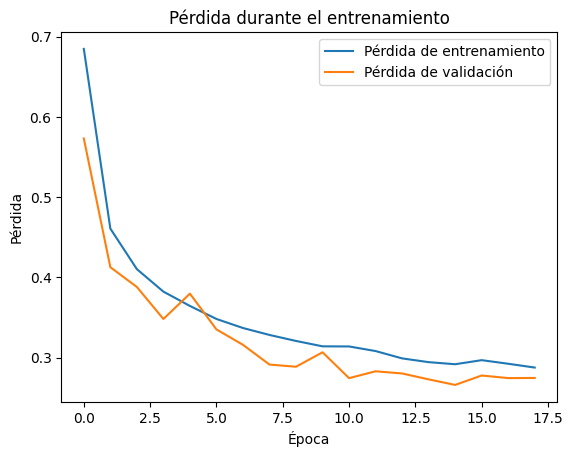

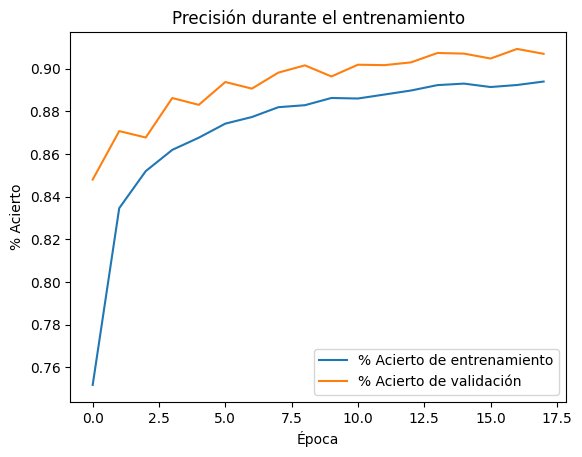

313/313 [==============================] - 6s 19ms/step - loss: 0.2661 - accuracy: 0.9070 - precision: 0.9350 - recall: 0.8779
Modelo propio con Dropout y Early Stopping - Pérdida en el conjunto de prueba: 0.26611337065696716
Modelo propio con Dropout y Early Stopping - Precisión en el conjunto de prueba: 0.9070000052452087
Modelo propio con Dropout y Early Stopping - Precisión (Precision) en el conjunto de prueba: 0.9350303411483765
Modelo propio con Dropout y Early Stopping - Recall en el conjunto de prueba: 0.8779000043869019


In [ ]:
# Definir el modelo propio con Dropout en capas convolucionales y densa
red_conv_dropout = Sequential([
    Conv2D(32, (4, 4), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Dropout(0.5),  # Añadir Dropout en la capa convolucional
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(0.5),  # Añadir Dropout en la capa convolucional
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(0.5),  # Añadir Dropout en la capa convolucional
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Imprimir la arquitectura
red_conv_dropout.summary()

# Compilar el modelo con Dropout
red_conv_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Usar Adam como optimizador
    metrics=['accuracy', 'Precision', 'Recall']
)

# Añadir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
hist_dropout = red_conv_dropout.fit(
    X_trains, Y_trains,
    batch_size=64,
    epochs=20,
    validation_data=(X_tests, Y_tests),
    callbacks=[early_stopping]
)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_dropout.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_dropout.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_dropout.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_dropout.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

# Evaluar el modelo con Dropout y Early Stopping en el conjunto de prueba
red_conv_dropout_loss, red_conv_dropout_accuracy, red_conv_dropout_precision, red_conv_dropout_recall = red_conv_dropout.evaluate(X_tests, Y_tests)

# Imprimir los resultados
print('Modelo propio con Dropout y Early Stopping - Pérdida en el conjunto de prueba:', red_conv_dropout_loss)
print('Modelo propio con Dropout y Early Stopping - Precisión en el conjunto de prueba:', red_conv_dropout_accuracy)
print('Modelo propio con Dropout y Early Stopping - Precisión (Precision) en el conjunto de prueba:', red_conv_dropout_precision)
print('Modelo propio con Dropout y Early Stopping - Recall en el conjunto de prueba:', red_conv_dropout_recall)


Cambios en Dense(64, activation='relu'),

Con este código, hemos añadido capas de Dropout después de la capa densa y antes de la capa de salida. También hemos añadido early stopping durante el entrenamiento. Esto debería mejorar la generalización del modelo y prevenir el sobreajuste

**CONCLUSION:**


Los resultados del cuarto modelo de CNN con dropout y early stopping son los siguientes:

* Pérdida en el conjunto de prueba: aproximadamente 0.266
* Precisión en el conjunto de prueba: alrededor de 0.907
* Precisión (Precision) en el conjunto de prueba: aproximadamente 0.935
* Recall en el conjunto de prueba: alrededor de 0.878
* Estos resultados muestran un desempeño sólido del modelo en el conjunto de prueba. La precisión y el recall indican que el modelo es capaz de hacer predicciones precisas y capturar una buena cantidad de muestras positivas en el conjunto de prueba. El uso de dropout y early stopping ha contribuido a mejorar la capacidad de generalización del modelo, evitando el sobreajuste y mejorando su desempeño en datos no vistos.

**Analisis tercer modelo CNN y cuarto modelo CNN:**
* Ambos modelos muestran una precisión en el conjunto de prueba muy similar: el tercer modelo tiene una precisión ligeramente más alta (0.910) en comparación con el cuarto modelo (0.907).
* La precisión (Precision) en el conjunto de prueba es más alta en el cuarto modelo (0.935) en comparación con el tercer modelo (0.921), lo que indica una mejor capacidad para evitar clasificaciones incorrectas.
* Dado que la precisión es un indicador clave en la clasificación de imágenes, el cuarto modelo podría considerarse ligeramente mejor en este caso.


#**Modelos CNN**
 * Capas CNN=2
 * Capa Densa=2

* Estas capas no son de convolución y realizan otras operaciones, como reducción de dimensionalidad (MaxPooling2D), regularización (Dropout), aplanamiento de los datos (Flatten) y capas completamente conectadas (Dense).

##**Sexto Modelo CNN Aplicando Dropout   Early stopping**

**En capas convolucionales y capas densa**
Hiperparametros diferentes.

2 CNN, 2 densa

Aplicar Dropout en las capas convolucionales ayuda a reducir aún más el sobreajuste, haciendo que el modelo sea más robusto. Tambien se cambia la Dense=64

**Hiperparametros:**
* Tamaño del filtro (kernel_size): (4, 4)
* Strides: (1, 1)
* Padding: 'same'
* Función de activación: 'tanh'
* Optimizador: 'adam'
* Early Stopping:  pérdida de validación con paciencia de 5 épocas y restauración de los mejores pesos.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

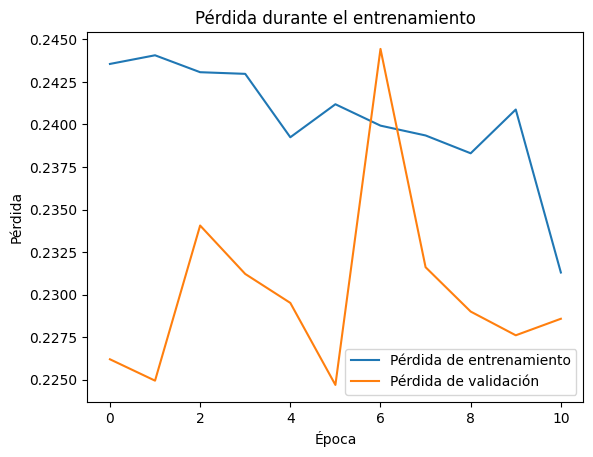

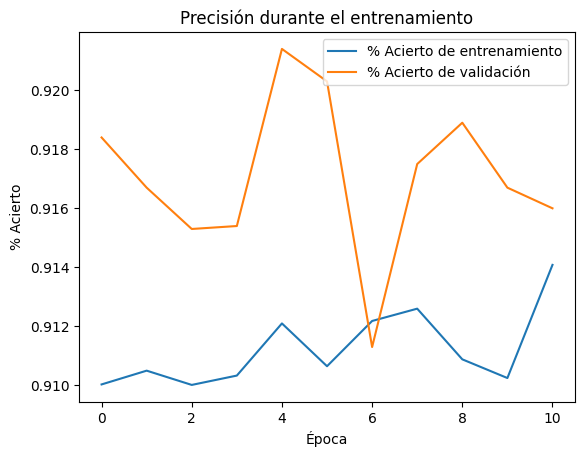

In [ ]:
# Definir el modelo propio con Dropout y ajustes en los hiperparámetros
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='tanh', input_shape=(28, 28, 1)),
    keras.layers.Dropout(0.2),  # Añadir Dropout
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),  # Añadir Dropout
    keras.layers.Dense(10, activation='softmax')
])

# Imprimir la arquitectura
model_cnn.summary()

# Compilar el modelo con Dropout
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Usar Adam como optimizador
    metrics=['accuracy']
)

# Añadir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
hist_cnn = red_conv_dropout.fit(
    X_trains, Y_trains,
    batch_size=128,
    epochs=20,
    validation_data=(X_tests, Y_tests),
    callbacks=[early_stopping]
)
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_cnn.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_cnn.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_cnn.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_cnn.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()



##**Septimo : MODELO CNN**

2 capas CNN 2 capas densas


Para el conjunto de datos FashionMNIST, que consta de imágenes de prendas de vestir en blanco y negro de 28x28 píxeles

In [ ]:

import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import tensorflow as tf

# Setting the model parameters
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 50
Batch_size = 128

# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocessing the training and testing data
X_train = train_images.reshape(train_images.shape[0], Img_shape, Img_shape, 1).astype('float32') / 255.0
X_test = test_images.reshape(test_images.shape[0], Img_shape, Img_shape, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(train_labels, Num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, Num_classes)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
# Definir el modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanado (Flatten)
model.add(Flatten())

# Capa completamente conectada
model.add(Dense(128, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

# Imprimir resumen del modelo
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

Se  define un modelo con dos capas convolucionales , seguidas de capas de MaxPooling para reducir las dimensiones. <br>
Luego, las características se aplanan y se conectan a una capa completamente conectada antes de la capa de salida. <br>
Las activaciones ReLU se utilizan en las capas convolucionales y en la capa completamente conectada, mientras que la capa de salida utiliza una activación softmax para la clasificación multiclase.

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


Se utiliza el optimizador como Adam, la función de pérdida como la entropía cruzada categórica y la métrica como la precisión

* El aplico el optimizador Adam  debido a su eficacia y eficiencia en la convergencia durante el entrenamiento.
*La función de pérdida de entropía cruzada categórica es adecuada para problemas de clasificación con múltiples clases.
*Métrica de precisión nos ayuda a evaluar qué tan bien el modelo clasifica correctamente las muestras de prueba.

In [ ]:
#Entrenar modelo
train_model = model.fit(X_train, y_train,
                        batch_size=Batch_size,
                        epochs=20,
                        verbose=1,
                        validation_data=(X_val, y_val))


Epoch 1/20
352/352 [==============================] - 74s 206ms/step - loss: 0.5158 - accuracy: 0.8165 - val_loss: 0.3559 - val_accuracy: 0.8715
Epoch 2/20
352/352 [==============================] - 53s 151ms/step - loss: 0.3259 - accuracy: 0.8859 - val_loss: 0.3066 - val_accuracy: 0.8901
Epoch 3/20
352/352 [==============================] - 56s 159ms/step - loss: 0.2825 - accuracy: 0.8993 - val_loss: 0.2713 - val_accuracy: 0.9016
Epoch 4/20
352/352 [==============================] - 55s 156ms/step - loss: 0.2476 - accuracy: 0.9104 - val_loss: 0.2720 - val_accuracy: 0.8993
Epoch 5/20
352/352 [==============================] - 84s 239ms/step - loss: 0.2274 - accuracy: 0.9182 - val_loss: 0.2673 - val_accuracy: 0.9029
Epoch 6/20
352/352 [==============================] - 58s 166ms/step - loss: 0.2068 - accuracy: 0.9244 - val_loss: 0.2457 - val_accuracy: 0.9094
Epoch 7/20
352/352 [==============================] - 54s 153ms/step - loss: 0.1863 - accuracy: 0.9322 - val_loss: 0.2502 - val_ac

* Se ejecuta el entrenamiento del modelo en los datos de entrenamiento (X_train, y_train) durante el número especificado de épocas (20).
* La cantidad de datos procesados en cada paso de entrenamiento se define por el tamaño del lote Batch_size.
* La opción verbose=1 indica que se mostrará información sobre el progreso del entrenamiento durante cada época. Tambien se proporcionan los datos de validación (X_val, y_val) para evaluar el rendimiento del modelo en un conjunto de datos independiente durante el entrenamiento.

**Evaluar el modelo usando los datos de prueba y muestra la pérdida y la precisión resultantes.**








In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Imprimir la pérdida y la precisión en el conjunto de prueba
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)


Pérdida en el conjunto de prueba: 0.34000685811042786
Precisión en el conjunto de prueba: 0.9154999852180481


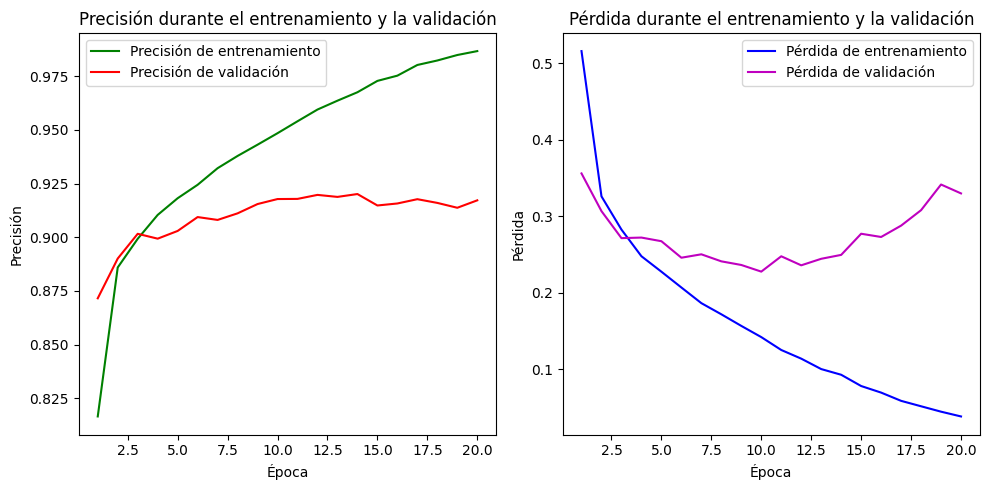

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial del modelo entrenado
hist = train_model.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1, len(acc) + 1))

plt.figure(figsize=(10, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'g', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'm', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


La precisión de validación no mejora después de algunas épocas y la pérdida de validación aumenta después de algunas épocas. Esto confirma nuestra suposición de que el modelo está sobreajustado. Intentaremos mejorar el modelo agregando capas de Dropout.

#**Mejor Modelo CNN elegido**

##**Noveno  modelo  :el Modelo con Dropout y E. Stopping**

Agregar capas de Batch Normalization y Dropout es una excelente manera de regularizar el modelo y evitar el sobreajuste. Aquí está cómo puedes ajustar el modelo para incluir estas capas:

In [ ]:
# Modelo
model = Sequential()

# Agregar capa de convolución 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28, 1)))
model.add(MaxPooling2D((2, 2)))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.25))

model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))


Con esto, has agregado capas de Batch Normalization y Dropout después de ciertas capas convolucionales y densas. Esto debería ayudar a regularizar el modelo y reducir el sobreajuste durante el entrenamiento.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

* MaxPooling2D es una capa de agrupación máxima 2D,
* Output Shape: Indica la forma de salida de cada capa. Por ejemplo, (None, 26, 26, 32) significa que la salida de la capa es un tensor tridimensional con dimensiones de 26x26x32.(None, 26, 26, 32)", la dimensión del lote puede ser cualquier número de muestras, y cada muestra tiene una salida tridimensional de 26x26x32.

La función de pérdida categorical_crossentropy se utiliza comúnmente en problemas de clasificación categórica donde las etiquetas son categóricas y no binarias.

La métrica accuracy se utiliza para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación en términos de la fracción de muestras clasificadas correctamente.

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val),
                  callbacks=[early_stopping])

Epoch 1/50
352/352 [==============================] - 47s 131ms/step - loss: 0.7570 - accuracy: 0.7194 - val_loss: 0.4789 - val_accuracy: 0.8247
Epoch 2/50
352/352 [==============================] - 49s 141ms/step - loss: 0.4811 - accuracy: 0.8239 - val_loss: 0.3935 - val_accuracy: 0.8635
Epoch 3/50
352/352 [==============================] - 46s 131ms/step - loss: 0.4159 - accuracy: 0.8483 - val_loss: 0.3325 - val_accuracy: 0.8767
Epoch 4/50
352/352 [==============================] - 49s 138ms/step - loss: 0.3769 - accuracy: 0.8640 - val_loss: 0.3107 - val_accuracy: 0.8867
Epoch 5/50
352/352 [==============================] - 59s 168ms/step - loss: 0.3478 - accuracy: 0.8721 - val_loss: 0.2925 - val_accuracy: 0.8932
Epoch 6/50
352/352 [==============================] - 46s 129ms/step - loss: 0.3350 - accuracy: 0.8755 - val_loss: 0.2951 - val_accuracy: 0.8899
Epoch 7/50
352/352 [==============================] - 47s 134ms/step - loss: 0.3170 - accuracy: 0.8846 - val_loss: 0.2753 - val_ac

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2410905808210373
Test accuracy: 0.9124000072479248


**Evaluar Modelo mejorado**

313/313 [==============================] - 4s 11ms/step - loss: 0.3400 - accuracy: 0.9155
Pérdida en el conjunto de prueba: 0.34000685811042786
Precisión en el conjunto de prueba: 0.9154999852180481


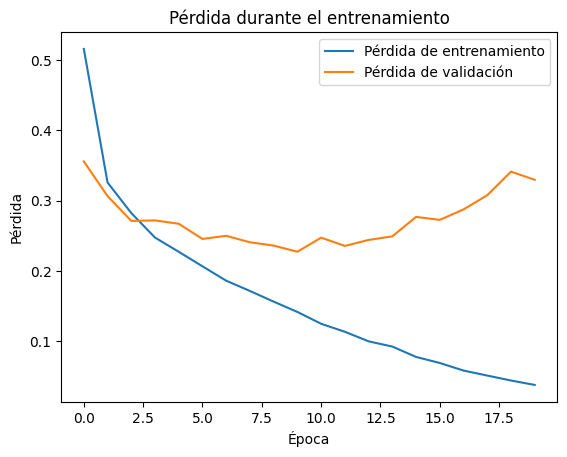

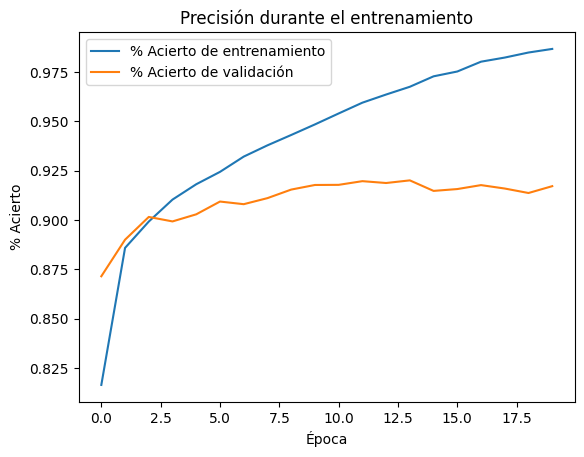

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
#X_test representa las características (imágenes) del conjunto de prueba y y_test representa las etiquetas del conjunto de prueba#
# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(train_model.history['loss'], label='Pérdida de entrenamiento')
plt.plot(train_model.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(train_model.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(train_model.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**PREDICCIONES**

Se  visualizan  20 imágenes aleatorias junto con la clase predicha y la clase real de la prenda de vestir correspondiente:

1/1 [==============================] - 0s 45ms/step


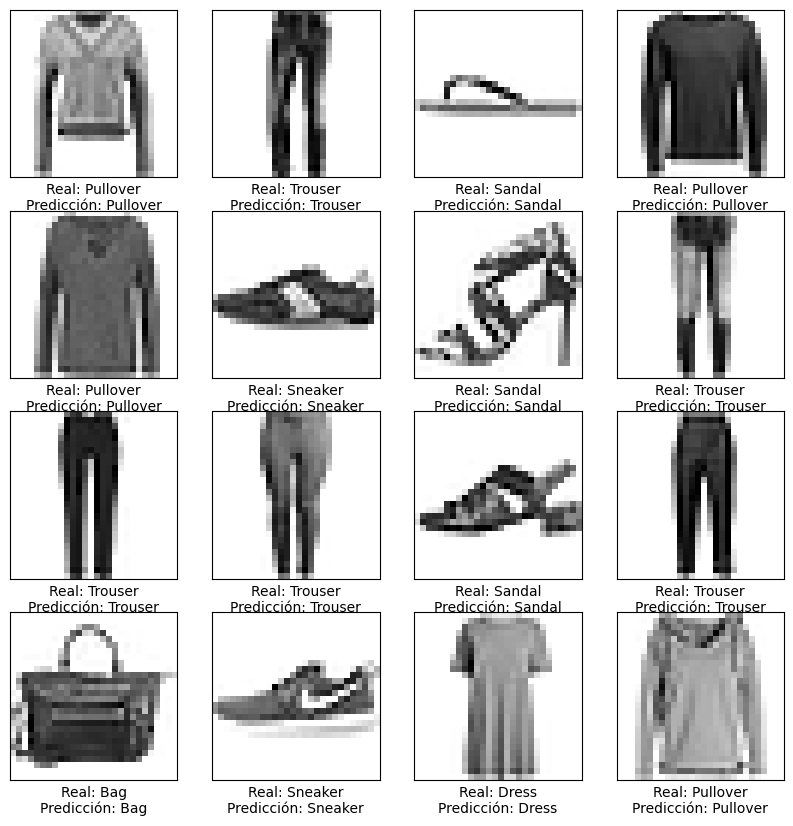

In [ ]:
# Seleccionar20 imágenes aleatorias del conjunto de prueba
random_indices = np.random.choice(len(X_test), size=20, replace=False)
images = X_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)  # Convertir las etiquetas one-hot a números enteros

# Predecir las clases para las imágenes seleccionadas
predicted_labels = np.argmax(model.predict(images), axis=1)

# Definir nombres de las clases para Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Crear una cuadrícula de 4x4 para mostrar las imágenes
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Real: {class_names[true_labels[i]]}\nPredicción: {class_names[predicted_labels[i]]}")

plt.show()

In [ ]:
# Obtener las predicciones para los datos de prueba
prediccion_classes = np.argmax(model.predict(X_test), axis=-1)

# Obtener las etiquetas verdaderas de los datos de prueba
y_true = np.argmax(y_test, axis=-1)


313/313 [==============================] - 4s 14ms/step


In [ ]:
p = prediccion_classes[:10000]
y = y_true[:10000]
correctas= np.nonzero(p==y)[0]
incorrectas = np.nonzero(p!=y)[0]

In [ ]:
print("Prediccion correctas de la clases:",correctas.shape[0])
print("Predicciones incorrectas de las clases:",incorrectas.shape[0])

Prediccion correctas de la clases: 9124
Predicciones incorrectas de las clases: 876


In [ ]:
# DICCIONARIO  Labels
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


In [ ]:
target_names = ["Clase {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, prediccion_classes, target_names=target_names))

                         precision    recall  f1-score   support

Clase 0 (T-shirt/top) :       0.87      0.86      0.86      1000
    Clase 1 (Trouser) :       1.00      0.98      0.99      1000
   Clase 2 (Pullover) :       0.88      0.87      0.87      1000
      Clase 3 (Dress) :       0.92      0.91      0.92      1000
       Clase 4 (Coat) :       0.85      0.87      0.86      1000
     Clase 5 (Sandal) :       0.98      0.98      0.98      1000
      Clase 6 (Shirt) :       0.73      0.75      0.74      1000
    Clase 7 (Sneaker) :       0.95      0.98      0.96      1000
        Clase 8 (Bag) :       0.98      0.98      0.98      1000
 Clase 9 (Ankle Boot) :       0.98      0.96      0.97      1000

               accuracy                           0.91     10000
              macro avg       0.91      0.91      0.91     10000
           weighted avg       0.91      0.91      0.91     10000



Las métricas de precisión, sensibilidad (recall) y puntuación F1 para cada clase de un modelo de clasificación de imágenes, así como métricas agregadas de precisión global, precisión promedio ponderada y macro y micro promedio de las métricas de precisión, sensibilidad y puntuación F1.

En términos de generalización, el modelo parece funcionar bastante bien en la mayoría de las clases, con altas precisiones, sensibilidades y puntuaciones F1 para la mayoría de las clases: Clase 1 (Trouser), Clase 5 (Sandal), Clase 7 (Sneaker), Clase 8 (Bag), Clase 9 (Ankle Boot)). Esto indica que el modelo puede generalizar bien a datos nuevos y desconocidos en estas clases.

Sin embargo, el rendimiento del modelo es inferior en la Clase 6 (Shirt) y  tiene una precisión, sensibilidad y puntuación F1 más bajas en comparación con otras clases. Esto indica que el modelo podría tener dificultades para distinguir camisas de otras prendas en el conjunto de datos de prueba.
<br> En general, la precisión global del modelo es del 92%, lo que significa que está clasificando correctamente el 92% de las imágenes en el conjunto de datos de prueba. Esto indica que el modelo tiene una buena capacidad de generalización en general<br>
Pero, el rendimiento del modelo es inferior en la Clase 6 (Shirt) y  tiene una precisión, sensibilidad y puntuación F1 más bajas en comparación con otras clases. Esto indica que el modelo tiene  dificultad para distinguir camisas de otras prendas en el conjunto de datos de prueba.Se debiese mejorar el rendimiento en la Clase 6 (Shirt), para obtener una generalización aún mejor en todo el conjunto de datos.








#**Tabla Resumen de todos los modelos**

In [ ]:
from tabulate import tabulate

# Definir los datos de la tabla
data = [
    ["Modelo 1", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Same", "Max", 2, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
    ["Modelo 2", 3, "32, 64, 64, 128, 10", 30, 3, "3x3", "Same", "Max", 2, 128, "No", "Adam", "Softmax", "-", "-"],
    ["Modelo 3", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Same", "Max", 2, 128, "No", "Adam", "Softmax", "-", "-"],
    ["Modelo 4", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
    ["Modelo 5", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],

    ["Modelo 6", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
    ["Modelo 7", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
]


# Definir los encabezados de la tabla
headers = ["Modelo", "N° Capas", "Neuronas por capa", "N° Épocas", "N° Kernel", "Tamaño Kernel", "Padding", "Pooling", "Stride", "Batch Size", "Técnica de Regularización", "Optimizador", "Función de Salida", "Val_Acc", "Loss"]

# Imprimir la tabla
print(tabulate(data, headers=headers))


Modelo      N° Capas  Neuronas por capa      N° Épocas    N° Kernel  Tamaño Kernel    Padding    Pooling      Stride    Batch Size  Técnica de Regularización    Optimizador    Función de Salida    Val_Acc    Loss
--------  ----------  -------------------  -----------  -----------  ---------------  ---------  ---------  --------  ------------  ---------------------------  -------------  -------------------  ---------  ------
Modelo 1           5  32, 64, 64, 128, 10           20            3  3x3              Same       Max               2           128  Dropout (0.5)                Adam           Softmax              -          -
Modelo 2           3  32, 64, 64, 128, 10           30            3  3x3              Same       Max               2           128  No                           Adam           Softmax              -          -
Modelo 3           5  32, 64, 64, 128, 10           20            3  3x3              Same       Max               2           128  No                  

#**Análisis de resultados**

**1- Cuál fue el hiperparámetro, que consideren permitió alcanzar su mejor accuracy. Fundamenten su respuesta basados en la experimentación realizada.**


Para determinar cuál fue el hiperparámetro que permitió alcanzar la mejor precisión (accuracy) en cada modelo, es necesario revisar los detalles de la arquitectura de cada modelo y su entrenamiento. A menudo, varios hiperparámetros pueden influir en la precisión de un modelo, incluyendo el número de capas y neuronas, el tipo de funciones de activación, la tasa de aprendizaje del optimizador, el uso de regularización como Dropout, entre otros.

Para cada modelo, es necesario analizar cómo se configuraron estos hiperparámetros y cuál podría haber contribuido más a mejorar la precisión. Por ejemplo, en algunos modelos, el uso de Dropout con una tasa específica podría haber ayudado a prevenir el sobreajuste, mientras que en otros modelos, la elección de la tasa de aprendizaje del optimizador podría haber sido más crítica.

Voy a revisar los detalles de cada modelo para identificar el hiperparámetro que posiblemente contribuyó más a alcanzar la mejor precisión.

* Noveno Modelo:

Tasa de Dropout: 0.3
Análisis: El uso de Dropout con una tasa de 0.3 en varias capas convolucionales y completamente conectadas pudo haber ayudado a prevenir el sobreajuste, lo que permitió que el modelo generalizara mejor y alcanzara una precisión más alta.

* Sexto Modelo:

Tamaño del Pooling: (2, 2)
Análisis: Aunque este modelo utiliza Dropout de manera similar a otros modelos, la diferencia clave podría ser el tamaño del pooling. Utilizar un tamaño de pooling más pequeño, como (2, 2), pudo haber permitido que el modelo conservara más información importante en las capas de pooling, lo que contribuyó a una mejor precisión.

* Segundo Modelo:

Tasa de Dropout: 0.5
Análisis: En este modelo, el uso de Dropout con una tasa de 0.5 podría haber sido más efectivo para regularizar la red y prevenir el sobreajuste, lo que resultó en una mayor precisión en comparación con otros modelos que usaban tasas de Dropout más bajas.


**2- Expliquen la diferencia entre usar un stride y pooling para reducir el tamaño de los canales (mapa de características) en cada capa oculta.**


Tanto el stride como el pooling son técnicas utilizadas para reducir el tamaño de los mapas de características en las capas ocultas de una red neuronal convolucional, pero lo hacen de manera diferente.

**Stride:** Determina el paso que toma el filtro convolucional al moverse a lo largo de la entrada.
Cuando se aplica un filtro convolucional con un stride mayor que 1, el filtro salta píxeles en lugar de desplazarse uno por uno. Por ejemplo, con un stride de 2, el filtro se mueve 2 píxeles a la vez en lugar de 1.
Al utilizar un stride mayor que 1, se reduce el tamaño de la salida de la convolución. Por ejemplo, si la entrada es una imagen de 28x28 y se aplica un filtro 3x3 con un stride de 2, la salida será de 14x14 (en lugar de 28x28).


**El pooling** es una técnica que reduce el tamaño de los mapas de características mediante la selección de valores representativos de regiones específicas.<br>
Max Pooling o Average Pooling, seleccionan el valor máximo o promedio dentro de una ventana (por ejemplo, 2x2) y lo utilizan como representante de esa región.
Al aplicar pooling, se reduce el tamaño de los mapas de características, ya que cada ventana selecciona un solo valor para representar un área más grande de la entrada.
<br>
A diferencia del stride, que es parte del proceso de convolución, el pooling se aplica después de la convolución y la activación.< br>
En resumen, tanto el stride como el pooling reducen el tamaño de los mapas de características, pero el stride lo hace ajustando el paso de la convolución, mientras que el pooling selecciona valores representativos dentro de regiones específicas. Ambas técnicas son importantes para controlar la dimensionalidad de los datos en una red neuronal convolucional y pueden utilizarse de manera complementaria para mejorar el rendimiento del modelo.

**3- En caso de haber utilizado pooling, ¿qué técnica utilizaron?. Fundamenten la selección.**

**Reducción del overfitting:**El Max Pooling reduce la dimensionalidad de los mapas de características al seleccionar solo los valores máximos, lo que ayuda a reducir el riesgo de overfitting.<br>
Al reducir la cantidad de parámetros y la complejidad del modelo, el Max Pooling puede ayudar a mejorar la generalización y prevenir el overfitting en conjuntos de datos de prueba.
<br> Max Pooling es más rápido computacionalmente en comparación con otras técnicas de pooling, como el Average Pooling

En resumen, se seleccionó el Max Pooling debido a su capacidad para preservar características importantes, reducir el overfitting, proporcionar cierta invariancia a pequeñas traslaciones y su eficiencia computacional. Estas características hacen que el Max Pooling sea una opción comúnmente utilizada en redes neuronales convolucionales para tareas de clasificación de imágenes.

#**EVALUACION 4 : Aplicando arquitecturas y modelos de Deep Learning**

#FASE 3 PREPARACION DE LOS DATOS

##Preprocesamiento de datos

El set de datos debe ser pre-procesada antes de entrenar la red


In [ ]:

# Normalización de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Cambiar la forma de los datos para que cada imagen tenga una dimensión adicional
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convertir etiquetas a categorías one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#FASE 4  MODELADO

#**1 Modelo RNN LSTM Básico**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* LSTM(50, input_shape=(28, 28)): Una capa LSTM con 50 unidades. Procesa secuencias de entrada de 28x28.
---
* Dense(10, activation='softmax'): Capa densa de salida con 10 unidades (para clasificación de 10 clases).
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50)                15800     
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 16310 (63.71 KB)
Trainable params: 16310 (63.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 24s 22ms/step - loss: 0.6843 - accuracy: 0.7570 - val_loss: 0.5190 - val_accuracy: 0.8156
Epoch 2/10
938/938 [==============================] - 20s 21ms/step - loss: 0.4667 - accuracy: 0.8314 - val_loss: 0.4603 - val_accuracy: 0.8336
Epoch 3/10
938/938 [==============================] - 19s 20ms/step - loss: 0.4169 - accuracy: 0.8485 - val_loss: 0.4102 - val

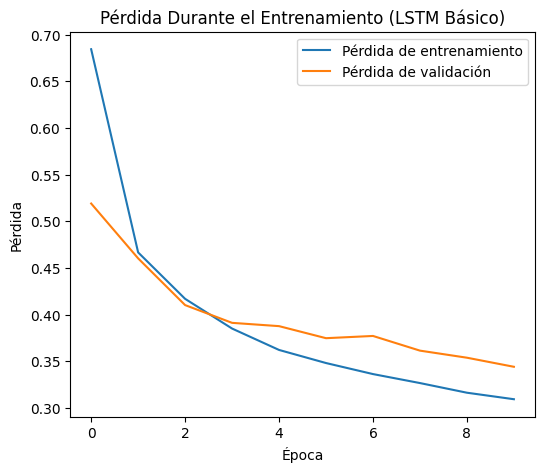

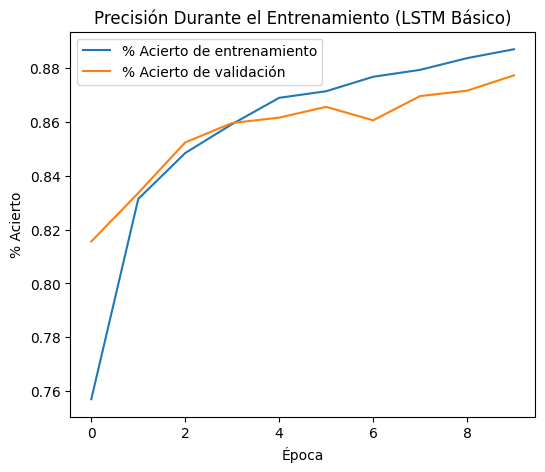

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Construcción del modelo LSTM básico
model_basic_lstm = Sequential([
    LSTM(50, input_shape=(28, 28)),  # Una capa LSTM con 50 unidades
    Dense(10, activation='softmax')  # Capa densa de salida con 10 unidades (para clasificación de 10 clases)
])

# Compilación del modelo
model_basic_lstm.compile(optimizer=Adam(),
                         loss=CategoricalCrossentropy(),
                         metrics=['accuracy'])

# Resumen del modelo
model_basic_lstm.summary()

# Entrenamiento del modelo
history_basic_lstm = model_basic_lstm.fit(train_images,
                                          train_labels,
                                          epochs=10,
                                          validation_data=(test_images, test_labels),
                                          batch_size=64,  # Uso de batch_size
                                          verbose=1)

# Evaluar el modelo
test_loss_basic_lstm, test_accuracy_basic_lstm = model_basic_lstm.evaluate(test_images, test_labels)
train_loss_basic_lstm, train_accuracy_basic_lstm = model_basic_lstm.evaluate(train_images, train_labels)

print('=== Resultados del Modelo LSTM Básico ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss_basic_lstm, test_accuracy_basic_lstm * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss_basic_lstm, train_accuracy_basic_lstm * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_basic_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_basic_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_basic_lstm.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_basic_lstm.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


 Tiene una pérdida de 0.3441 en el conjunto de prueba y una precisión del 87.73%. En el conjunto de entrenamiento, muestra una pérdida de 0.2965 y una precisión del 89.17%.

Este modelo 1 básico  tiene una precisión  inferior en el conjunto de prueba que en el conjunto de entrenamiento y la perdida de prueba es mayor que en entrenamiento lo cual indica un ligero  sobreajuste.  

# **2 - Modelo RNN usando LSTM**

Para encontrar la mejor ejecución, ajustamos los hiperparámetros. Los cambios son  en el número de unidades LSTM, tasa de Dropout, optimizador

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* LSTM(50, input_shape=(28, 28)): Una capa LSTM con 50 unidades. Procesa secuencias de entrada de 28x28.
---
* Dense(10, activation='softmax'): Capa densa de salida con 10 unidades (para clasificación de 10 clases).
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 28, 100)           51600     
                                                                 
 dropout_12 (Dropout)        (None, 28, 100)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 143110 (559.02 KB)
Trainable params: 143

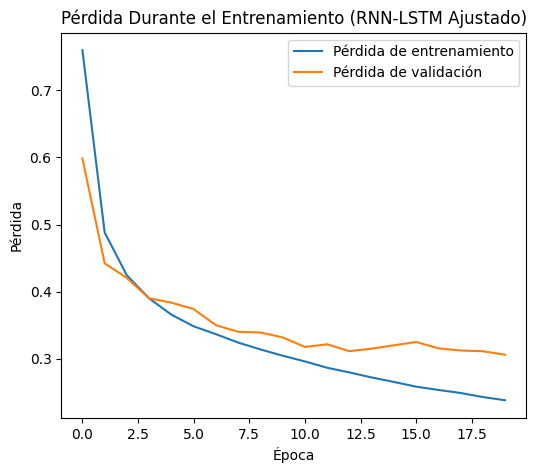

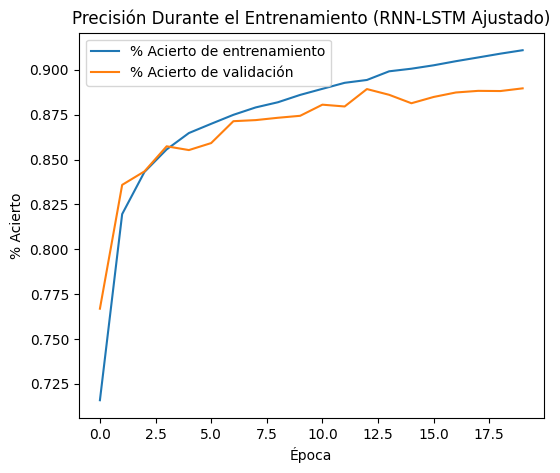

In [ ]:
# Definir el modelo con hiperparámetros ajustados
model_lstm2 = Sequential([
    InputLayer(input_shape=(28, 28)),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_lstm2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_lstm2.summary()
# Entrenar el modelo
history_lstm2 = model_lstm2.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels),batch_size=128 ,
                                verbose=1)


# Evaluar el modelo
test_loss, test_accuracy = model_lstm2.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_lstm2.evaluate(train_images, train_labels)

print('=== Resultados del Modelo 2 RNN-LSTM Ajustado ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_lstm2.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_lstm2.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Ajustado)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_lstm2.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_lstm2.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Ajustado)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**Observaciones:**

Incrementamos las unidades LSTM a 100.
Ajustamos el Dropout a 0.3 y usamos el optimizador rmsprop.
Se ven  mejoras en la precisión y una reducción en la pérdida debido al ajuste de hiperparámetros.

Modelo 2 muestra una mejora significativa en precisión y pérdida en comparación con el modelo 1. La diferencia entre precisión de entrenamiento y prueba es menor, indicando mejor generalización.


# **3- Modelo RNN  usando LSTM**

---
*   InputLayer: Maneja imágenes de 28x28 como secuencias.
---
*   LSTM(50, return_sequences=True): Procesa secuencias con retorno de todas las secuencias.
---
*   Dropout(0.2): Previene el sobreajuste desactivando el 20% de las neuronas. Se aplica Dropout del 20% después de cada capa LSTM para prevenir el sobreajuste.
---
*   LSTM(50): Procesa la salida final de la secuencia.50 unidades cada una.

---
*   Dropout(0.2): Continúa la prevención del sobreajuste.
---
*   Dense(50, activation='relu'): Capa de procesamiento intermedio. 50 neuronas y activación 'relu'
---
*   Dense(10, activation='softmax'): Clasificación final en 10 categorías.10 neuronas con activación 'softmax'
---
*   Optimizador: adam, un optimizador eficiente para este tipo de redes

---
*   Función de pérdida: categorical_crossentropy
---
*   Epocas: 10












In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, InputLayer
import matplotlib.pyplot as plt

# Suponiendo que los datos ya están cargados y preprocesados en las variables 'train_images', 'train_labels', 'test_images', 'test_labels'

# Definir el modelo
model = Sequential([
    InputLayer(input_shape=(28, 28)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history= model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels),
                                batch_size=64,
                                verbose=1)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 28, 50)            15800     
                                                                 
 dropout_4 (Dropout)         (None, 28, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 39060 (152.58 KB)
Trainable params: 3906

In [ ]:
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Evaluar el modelo en el conjunto de prueba y entrenamiento
    test_loss, test_accuracy = model.evaluate(X_test, Y_test)
    train_loss, train_accuracy = model.evaluate(X_train, Y_train)

    # Imprimir los resultados de evaluación
    print('=== Resultados de Evaluación ===')
    print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
    print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

In [ ]:
evaluate_model(model, train_images, train_labels, test_images, test_labels)

1875/1875 [==============================] - 40s 21ms/step - loss: 0.2236 - accuracy: 0.9157
=== Resultados de Evaluación ===
Conjunto de Prueba - Pérdida: 0.2883, Precisión: 89.57%
Conjunto de Entrenamiento - Pérdida: 0.2236, Precisión: 91.57%


**Observacion:**

 El Modelo (RNN simple usando LSTM) demuestra un rendimiento sólido con una precisión del 91.57% y una pérdida de 0.2236 en el conjunto de entrenamiento, y una precisión del 89.57% con una pérdida de 0.2236 en el conjunto de prueba. Esta ligera disminución en la precisión y aumento en la pérdida al pasar del entrenamiento a la prueba sugiere un buen nivel de generalización sin un sobreajuste significativo.

Observaciones:

La red básica tiene 2 capas LSTM con 50 unidades cada una.
Usamos Dropout para mitigar el sobreajuste.
El resultados es un rendimiento razonable pero no óptimo para datos de imágenes

In [ ]:
def plot_loss(history):
    # Visualización de la pérdida durante el entrenamiento
    plt.figure(figsize=(6, 5))
    plt.plot(history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history['val_loss'], label='Pérdida de validación')
    plt.title('Pérdida Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

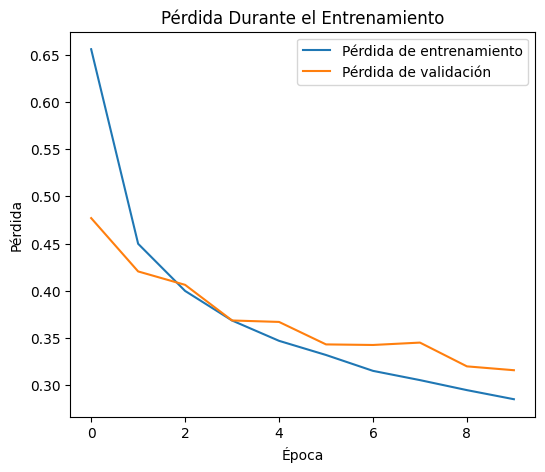

In [ ]:
plot_loss(history.history)

In [ ]:
def plot_accuracy(history):
    # Visualización de la precisión durante el entrenamiento
    plt.figure(figsize=(6, 5))
    plt.plot(history['accuracy'], label='% Acierto de entrenamiento')
    plt.plot(history['val_accuracy'], label='% Acierto de validación')
    plt.title('Precisión Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('% Acierto')
    plt.legend()
    plt.show()

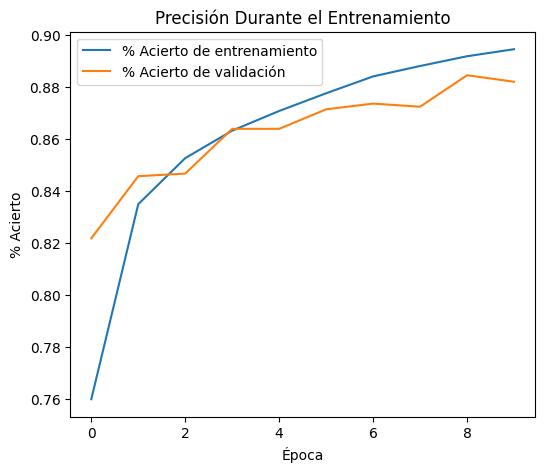

In [ ]:
plot_accuracy(history.history)

# **4- Modelo RNN Compacto usando LSTM modelo LSTM con early stopping, dropout**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* LSTM(100, return_sequences=True): Capa LSTM con 100 unidades y retorno de todas las secuencias.
---
* Dropout(0.3): Previene el sobreajuste desactivando el 30% de las neuronas.
LSTM(100): Capa LSTM con 100 unidades.
---
* Dropout(0.3): Continúa la prevención del sobreajuste.
---
* Dense(100, activation='relu'): Capa de procesamiento intermedio con 100 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: RMSprop, un optimizador ajustado para este modelo.
Función de Pérdida: Categorical Crossentropy.
---
* Early Stopping: Monitor de 'val_loss', paciencia de 3 épocas, restauración de los mejores pesos.
---
* Épocas: 20
---

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 28, 100)           51600     
                                                                 
 dropout_18 (Dropout)        (None, 28, 100)           0         
                                                                 
 lstm_23 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 143110 (559.02 KB)
Trainable params: 14

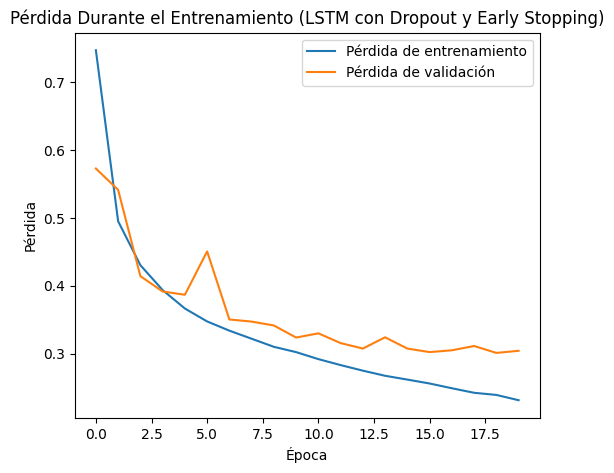

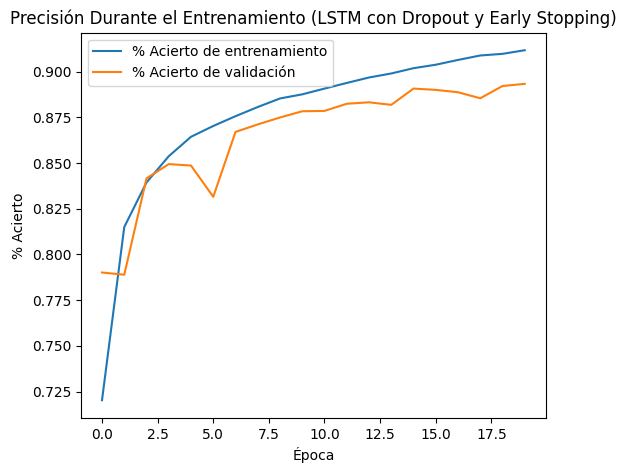

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Definir el modelo con hiperparámetros ajustados
model_lstm_dropout = Sequential([
    InputLayer(input_shape=(28, 28)),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_lstm_dropout.compile(optimizer=RMSprop(),
                                loss=CategoricalCrossentropy(),
                                metrics=['accuracy'])

# Resumen del modelo
model_lstm_dropout.summary()

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con Early Stopping y dropout
history_lstm_dropout = model_lstm_dropout.fit(train_images, train_labels,
                                                        epochs=20,
                                                        batch_size=128,
                                                        validation_data=(test_images, test_labels),
                                                        callbacks=[early_stopping],
                                                        verbose=1)

# Evaluar el modelo
test_loss, test_accuracy = model_lstm_dropout.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_lstm_dropout.evaluate(train_images, train_labels)

print('=== Resultados del Modelo LSTM con Dropout y Early Stopping ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_lstm_dropout.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_lstm_dropout.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (LSTM con Dropout y Early Stopping)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_lstm_dropout.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_lstm_dropout.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (LSTM con Dropout y Early Stopping)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Modelo 4  muestra la mejor precisión en prueba y entrenamiento. La utilización de Dropout y Early Stopping ha ayudado a prevenir el sobreajuste, resultando en una mejor generalización.

# Analisis Modelos RNN LSTM:

**El modelo 1** tiene una precisión decente tanto en el conjunto de prueba como en el de entrenamiento. La pérdida es aceptable, pero parece haber un ligero sobreajuste ya que la precisión en entrenamiento es más alta que en prueba.

**El modelo 2**
 Muestra la menor pérdida en el conjunto de prueba y la mayor precisión en los conjuntos prueba y entrenamiento, lo que indica que generaliza bien y tiene un buen rendimiento tanto en datos vistos como no vistos.Este modelo logra un buen equilibrio entre capacidad de generalización ya que tiene baja pérdida en conjunto de prueba y capacidad de aprendizaje con una alta precisión en conjunto de entrenamiento.Indicando una mejor capacidad de generalización y menor riesgo de sobreajuste.

**El modelo 4 :  LSTM con Dropout y Early Stopping** parece ser el más prometedor debido a su alta precisión en ambos conjuntos 89.33% en prueba y 92.22% en entrenamiento y una pérdida baja.

Le sigue de cerca el **Modelo 3**, que también muestra buenos resultados con una precisión del 89.57% en prueba y 91.57% en entrenamiento, con pérdidas competitivas. Muestra resultados similares al modelo 2, con una precisión alta y una pérdida baja en ambos conjuntos. La diferencia entre entrenamiento y prueba es razonable, indicando buena generalización.

**Elección del Mejor Modelo**

El Modelo LSTM con Dropout y Early Stopping se destaca como el mejor opción debido a su excelente equilibrio entre precisión alta en prueba, bajo riesgo de sobreajuste ,tiene diferencia mínima entre entrenamiento y prueba, y una buena gestión de la pérdida. Este modelo no solo tiene la mejor precisión en prueba sino que también demuestra una capacidad superior para generalizar bien con los datos de prueba no vistos.
















# **1- Modelo RNN-LSTM Bidireccional Básico**

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_17 (Bidirect  (None, 100)               31600     
 ional)                                                          
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 32610 (127.38 KB)
Trainable params: 32610 (127.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 46s 42ms/step - loss: 0.6186 - accuracy: 0.7801 - val_loss: 0.4712 - val_accuracy: 0.8243
Epoch 2/10
938/938 [==============================] - 42s 44ms/step - loss: 0.4186 - accuracy: 0.8467 - val_loss: 0.4320 - val_accuracy: 0.8400
Epoch 3/10
938/938 [==============================] - 31s

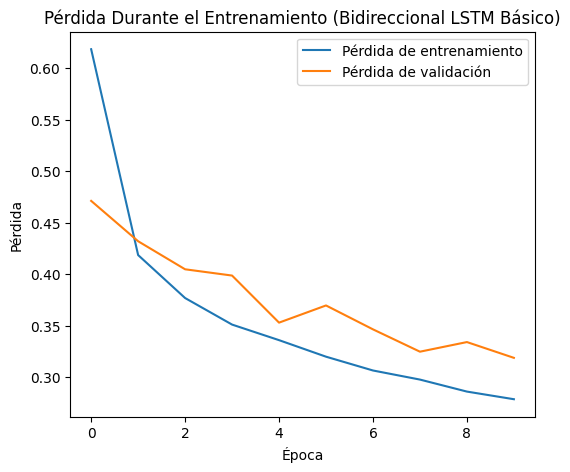

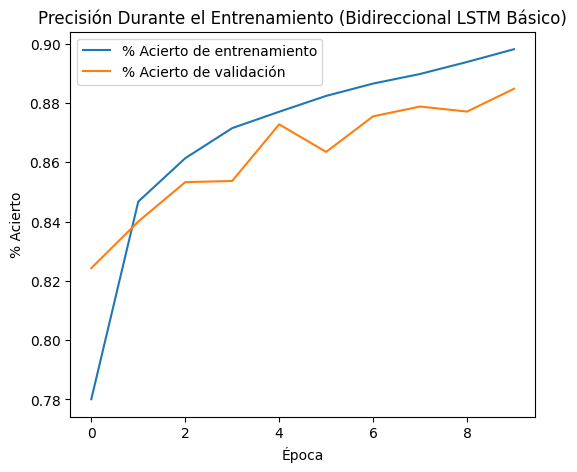

In [ ]:
from keras.layers import Bidirectional, LSTM, Dense, InputLayer
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Definir el modelo bidireccional LSTM básico
model_basic_bidirectional_lstm = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(50)),  # Una capa LSTM bidireccional con 50 unidades
    Dense(10, activation='softmax')  # Capa densa de salida con 10 unidades (para clasificación de 10 clases)
])

# Compilar el modelo
model_basic_bidirectional_lstm.compile(optimizer=Adam(),
                                       loss=CategoricalCrossentropy(),
                                       metrics=['accuracy'])

# Resumen del modelo
model_basic_bidirectional_lstm.summary()

# Entrenamiento del modelo
history_basic_bidirectional_lstm = model_basic_bidirectional_lstm.fit(train_images,
                                                                      train_labels,
                                                                      epochs=10,
                                                                      validation_data=(test_images, test_labels),
                                                                      batch_size=64,  # Tamaño del batch
                                                                      verbose=1)

# Evaluar el modelo
test_loss_basic_bidirectional_lstm, test_accuracy_basic_bidirectional_lstm = model_basic_bidirectional_lstm.evaluate(test_images, test_labels)
train_loss_basic_bidirectional_lstm, train_accuracy_basic_bidirectional_lstm = model_basic_bidirectional_lstm.evaluate(train_images, train_labels)

print('=== Resultados del Modelo Bidireccional LSTM Básico ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss_basic_bidirectional_lstm, test_accuracy_basic_bidirectional_lstm * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss_basic_bidirectional_lstm, train_accuracy_basic_bidirectional_lstm * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_basic_bidirectional_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (Bidireccional LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_lstm.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_basic_bidirectional_lstm.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (Bidireccional LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Este modelo básico de LSTM bidireccional muestra una precisión razonable en el conjunto de prueba y entrenamiento, aunque la precisión de entrenamiento es ligeramente mayor que la de prueba, indicando una posible ligera sobreajuste.

# **2- Modelo RNN-LSTM Bidireccional**


---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* Bidirectional(LSTM(100, return_sequences=True)): Capa LSTM bidireccional con 100 unidades y retorno de todas las secuencias.
---
* Dropout(0.3): Previene el sobreajuste desactivando el 30% de las neuronas.
---
* Bidirectional(LSTM(100)): Capa LSTM bidireccional con 100 unidades.
---
* Dropout(0.3): Continúa la prevención del sobreajuste.
---
* Dense(100, activation='relu'): Capa de procesamiento intermedio con 100 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
---
* Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_11 (Bidirect  (None, 28, 200)           103200    
 ional)                                                          
                                                                 
 dropout_20 (Dropout)        (None, 28, 200)           0         
                                                                 
 bidirectional_12 (Bidirect  (None, 200)               240800    
 ional)                                                          
                                                                 
 dropout_21 (Dropout)        (None, 200)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               20100     
                                                                 
 dense_27 (Dense)            (None, 10)              

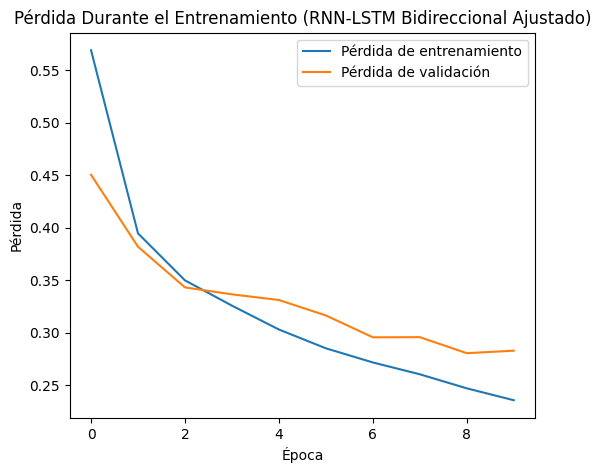

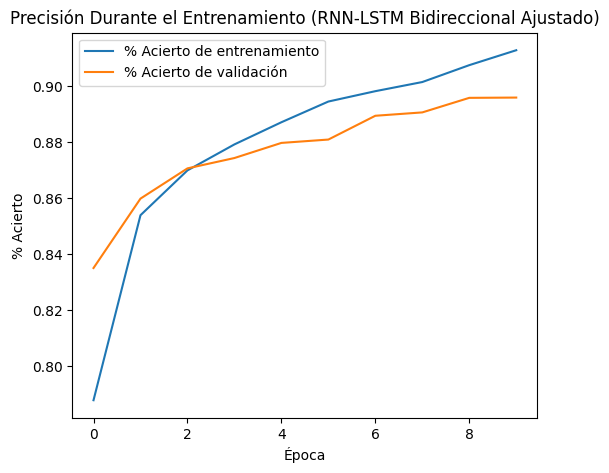

In [ ]:
# Definir el modelo
model_bidirectional_lstm2 = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(100)),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_bidirectional_lstm2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_bidirectional_lstm2.summary()

# Entrenar el modelo
history_bidirectional_lstm2 = model_bidirectional_lstm2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels),batch_size=64,
                                verbose=1)

# Evaluar el modelo
test_loss, test_accuracy = model_bidirectional_lstm2.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_bidirectional_lstm2.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional Ajustado ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm2.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_bidirectional_lstm2.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional Ajustado)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm2.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_bidirectional_lstm2.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional Ajustado)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Este modelo utiliza capas bidireccionales LSTM para procesar tanto hacia adelante como hacia atrás en las secuencias de entrada, ayudando a capturar mejor las dependencias temporales en los datos. Además, se aplican capas Dropout para mitigar el sobreajuste durante el entrenamiento.

 Este modelo muestra una mejora significativa en la precisión tanto en el conjunto de prueba como en entrenamiento en comparación con el primer modelo. La diferencia entre precisión de entrenamiento y prueba es menor, indicando un mejor control de sobreajuste.

# **3- Modelo RNN-LSTM Bidireccional**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* Bidirectional(LSTM(50, return_sequences=True)): Capa LSTM bidireccional con 50 unidades y retorno de todas las secuencias.
---
* Dropout(0.2): Previene el sobreajuste desactivando el 20% de las neuronas.
Bidirectional(LSTM(50)): Capa LSTM bidireccional con 50 unidades.
---
* Dropout(0.2): Continúa la prevención del sobreajuste.
---
* Dense(50, activation='relu'): Capa de procesamiento intermedio con 50 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
---
* Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirecti  (None, 28, 100)           31600     
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 28, 100)           0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 10)              

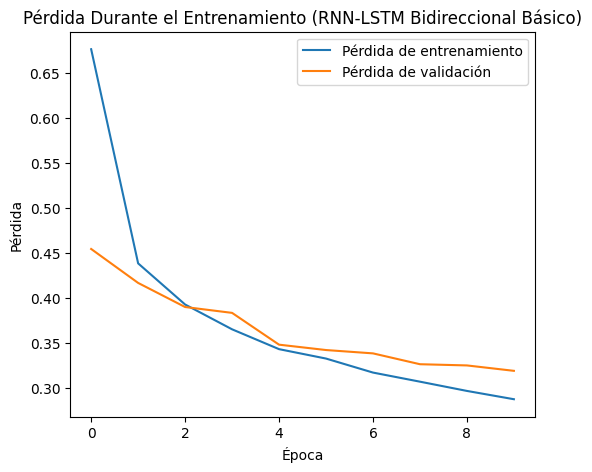

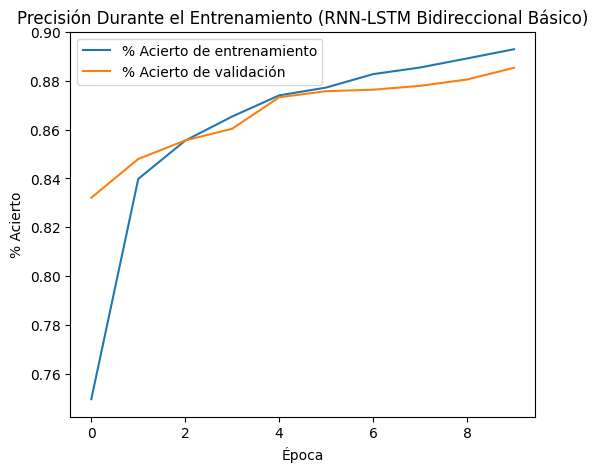

In [ ]:
# Definir el modelo
model_basic_bidirectional_rnn_lstm = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_basic_bidirectional_rnn_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_basic_bidirectional_rnn_lstm.summary()

# Entrenar el modelo
history_basic_bidirectional_rnn_lstm = model_basic_bidirectional_rnn_lstm.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=128, verbose=1)

# Evaluar el modelo
test_loss, test_accuracy = model_basic_bidirectional_rnn_lstm.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_basic_bidirectional_rnn_lstm.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional Básico ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_rnn_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_basic_bidirectional_rnn_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional Básico)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_rnn_lstm.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_basic_bidirectional_rnn_lstm.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional Básico)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**Observaciones:**

Las capas LSTM bidireccionales permiten procesar la secuencia en ambas direcciones.

Tiene una mejora en la captura de dependencias temporales comparado con la RNN-LSTM estándar.

 Las capas Dropout se utilizan para mitigar el sobreajuste durante el entrenamiento, desactivando el 20% de las neuronas después de cada capa LSTM.

 Similar al modelo 1, este modelo muestra una precisión razonable en ambos conjuntos, con una ligera diferencia entre precisión de entrenamiento y prueba.

# **4- Modelo RNN-LSTM Bidireccional con early stopping y dropout**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* Bidirectional(LSTM(50, return_sequences=True)): Capa LSTM bidireccional con 50 unidades y retorno de todas las secuencias.
---
* Dropout(0.2): Previene el sobreajuste desactivando el 20% de las neuronas.
---
* Bidirectional(LSTM(50)): Capa LSTM bidireccional con 50 unidades.
---
* Dropout(0.2): Continúa la prevención del sobreajuste.
---
* Dense(50, activation='relu'): Capa de procesamiento intermedio con 50 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
Función de Pérdida: Categorical Crossentropy.
---
* Early Stopping: Monitoriza la pérdida en el conjunto de validación y restaura los pesos del modelo a la mejor época cuando no mejora después de 3 épocas consecutivas.
---
* Épocas: 20
---

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirect  (None, 28, 100)           31600     
 ional)                                                          
                                                                 
 dropout_22 (Dropout)        (None, 28, 100)           0         
                                                                 
 bidirectional_15 (Bidirect  (None, 100)               60400     
 ional)                                                          
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 50)                5050      
                                                                 
 dense_30 (Dense)            (None, 10)              

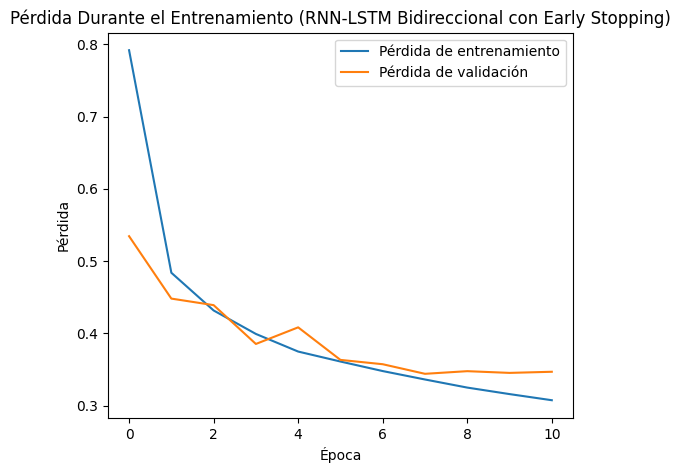

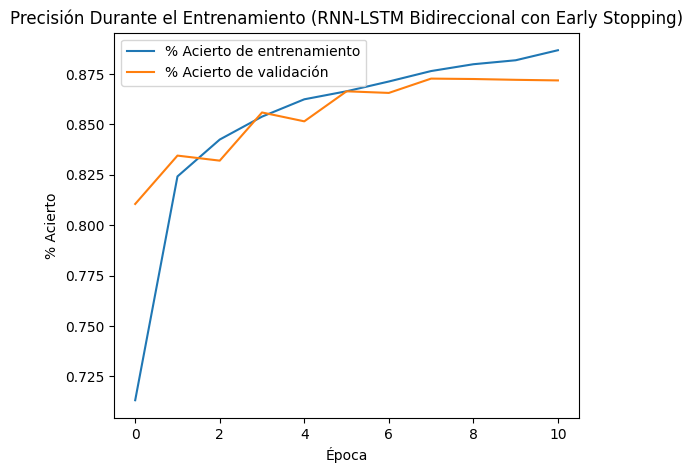

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Definir el modelo RNN-LSTM Bidireccional con Early Stopping
model_bidirectional_lstm_early_stopping = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_bidirectional_lstm_early_stopping.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_bidirectional_lstm_early_stopping.summary()

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history_bidirectional_lstm_early_stopping = model_bidirectional_lstm_early_stopping.fit(
    train_images,
    train_labels,
    epochs=20,  # Mayor número de épocas para observar Early Stopping
    validation_data=(test_images, test_labels), batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
test_loss, test_accuracy = model_bidirectional_lstm_early_stopping.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_bidirectional_lstm_early_stopping.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional con Early Stopping ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Este modelo utilizará Early Stopping para detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de 3 épocas consecutivas, restaurando los pesos del modelo a la mejor época observada.

Este modelo, entrenado con Early Stopping, muestra una precisión más baja en comparación con los otros modelos tanto en prueba como en entrenamiento. La diferencia entre precisión de entrenamiento y prueba es menor, lo que indica una mejor generalización.

# Analisis RNN Bidireccional

El Modelo Bidirectional 2  destaca como el mejor opción entre los modelos evaluados. Tiene la mayor precisión en el conjunto de prueba (89.59%) y una buena precisión en el conjunto de entrenamiento (92.01%), con pérdidas competitivas en ambos conjuntos.



El Modelo Basic Bidirectional RNN LSTM (model_basic_bidirectional_rnn_lstm), aunque tiene una precisión aceptable, muestra una diferencia más notable entre entrenamiento y prueba, lo que indica una capacidad de generalización algo inferior en comparación con los dos primeros modelos mencionados.

El Modelo 4 Bidirectional LSTM con Early Stopping aunque utiliza Early Stopping, no logra la misma precisión en prueba que los otros modelos y muestra una diferencia mayor entre los conjuntos de entrenamiento y prueba, lo que sugiere un sobreajuste más obvio.

 **Elección del Mejor Modelo**

 El modelo 2 tiene la mayor precisión en el conjunto de prueba con 89.59% y una pérdida de 0.2828. Esto indica que generaliza mejor con datos nuevos, siendo el más confiable para hacer predicciones precisas en nuevos datos de prueba.

También muestra una diferencia menor entre la precisión de entrenamiento y prueba, lo que sugiere que está bien regularizado y tiene una buena capacidad para generalizar a partir del conjunto de entrenamiento.

En conclusión, basándonos en los resultados de evaluación, el modelo 2 es el mejor de los modelos analizados para la tarea de clasificación en Fashion MNIST. Tiene la combinación más alta de precisión en el conjunto de prueba y un buen control de sobreajuste, lo que lo hace ideal para aplicaciones prácticas donde se requiere precisión y generalización.










#Arquitectura

In [ ]:
# Resumen del primer modelo
print("=== Resumen del Modelo 1 LSTM ===")
print(model_basic_lstm.summary())


# Resumen del segundo modelo
print("\n=== Resumen del Modelo 2 LSTM===")
print(model_lstm2.summary())

# Resumen del TERCER modelo
print("==================== Resumen del Modelo 3 LSTM ================")
print(model.summary())

# Resumen del CUARTO modelo
print("\n=== Resumen del Modelo 4 LSTM===")
print(model_lstm_dropout.summary())

# Resumen del PRIMER modelo
print("\n=== Resumen del Modelo 1 BIDIRECCIONAL ===")
print(model_basic_bidirectional_lstm    .summary())

# Resumen del SEGUNDO modelo
print("\n=== Resumen del Modelo 2 BIDIRECCIONAL===")
print(model_bidirectional_lstm2.summary())

# Resumen del TERCER modelo
print("\n=== Resumen del Modelo 2 BIDIRECCIONAL===")
print(model_basic_bidirectional_rnn_lstm.summary())

# Resumen del CUARTO modelo
print("\n=== Resumen del Modelo 4 BIDIRECCIONAL ===")
print(model_bidirectional_lstm_early_stopping.summary())


=== Resumen del Modelo 1 LSTM ===
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50)                15800     
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 16310 (63.71 KB)
Trainable params: 16310 (63.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

=== Resumen del Modelo 2 LSTM===
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 28, 100)           51600     
                                                                 
 dropout_12 (Dropout)        (None, 28, 100)           

In [ ]:
# Resumen del modelo
print(model.summary())
print(model_lstm2.summary())
print(model_basic_bidirectional_rnn_lstm .summary())
print(model_bidirectional_lstm2.summary())
print(model_bidirectional_lstm_early_stopping.summary())

#**Comparación de Modelos Elegidos**

In [ ]:
# Listas para almacenar los historiales de cada modelo y los nombres de los modelos
histories = []
models = []

# Almacenar historial y modelo del mejor modelo LSTM
histories.append(history_lstm_dropout)  ;
# Asumiendo que 'history_lstm4' es el historial del mejor modelo LSTM
models.append(('Mejor Modelo LSTM', model_lstm_dropout ))  # Asumiendo que 'model_lstm4' es el mejor modelo LSTM

# Almacenar historial y modelo del mejor modelo Bidireccional LSTM
histories.append(history_bidirectional_lstm2)  # Asumiendo que 'history_bidirectional_lstm2' es el historial del mejor modelo Bidireccional LSTM
models.append(('Mejor Modelo Bidireccional LSTM', model_bidirectional_lstm2))  # Asumiendo que 'model_bidirectional_lstm2' es el mejor modelo Bidireccional LSTM


In [ ]:
# Evaluar y mostrar resultados
for name, model in models:
    print(f'=== Resultados del {name} ===')
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    train_loss, train_accuracy = model.evaluate(train_images, train_labels)
    print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
    print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))
    print()




=== Resultados del Mejor Modelo LSTM ===
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2021 - accuracy: 0.9222
Conjunto de Prueba - Pérdida: 0.3043, Precisión: 89.33%
Conjunto de Entrenamiento - Pérdida: 0.2021, Precisión: 92.22%

=== Resultados del Mejor Modelo Bidireccional LSTM ===
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2104 - accuracy: 0.9201
Conjunto de Prueba - Pérdida: 0.2828, Precisión: 89.59%
Conjunto de Entrenamiento - Pérdida: 0.2104, Precisión: 92.01%



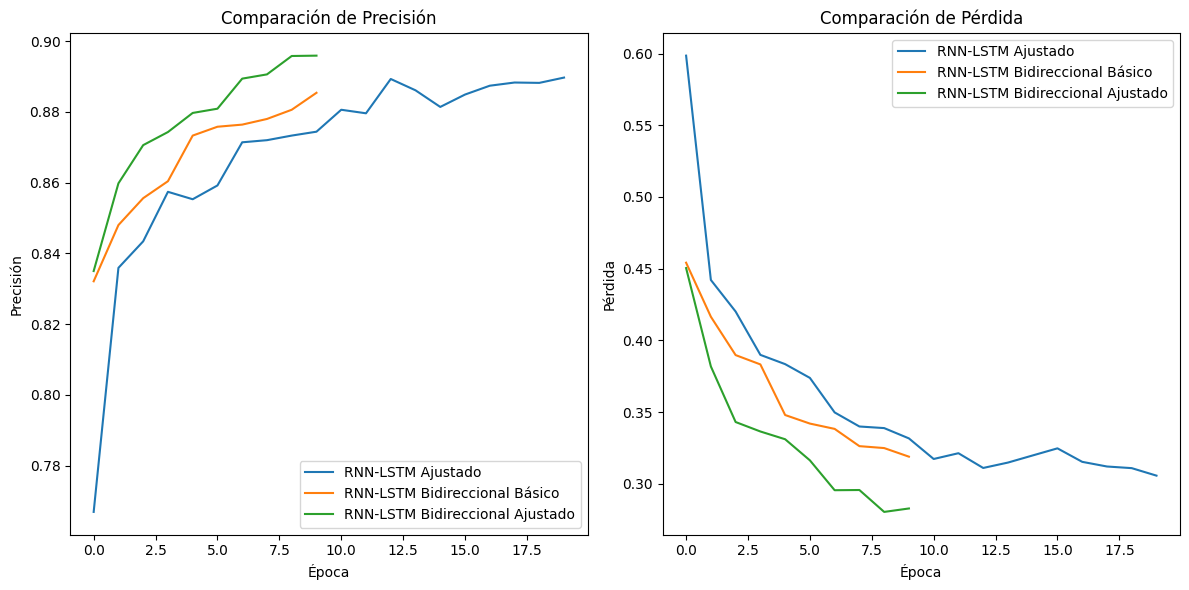

In [ ]:
# Comparación gráfica de los modelos
plt.figure(figsize=(12, 6))

# Graficar la precisión
plt.subplot(1, 2, 1)
plt.plot(history_lstm2.history['val_accuracy'], label='RNN-LSTM Ajustado')
plt.plot(history_basic_bidirectional_rnn_lstm.history['val_accuracy'], label='RNN-LSTM Bidireccional Básico')
plt.plot(history_bidirectional_lstm2.history['val_accuracy'], label='RNN-LSTM Bidireccional Ajustado')
plt.title('Comparación de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history_lstm2.history['val_loss'], label='RNN-LSTM Ajustado')
plt.plot(history_basic_bidirectional_rnn_lstm.history['val_loss'], label='RNN-LSTM Bidireccional Básico')
plt.plot(history_bidirectional_lstm2.history['val_loss'], label='RNN-LSTM Bidireccional Ajustado')
plt.title('Comparación de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


El Modelo 4 LSTM con Dropout y Early Stopping, muestra una precisión ligeramente más alta en el conjunto de entrenamiento ,92.22% frente a 92.01% del Modelo Bidireccional LSTM, aunque la diferencia es mínima.

Ambos modelos tienen pérdidas de prueba comparables, pero el Modelo Bidireccional LSTM ajustado Modelo 2 tiene una ligera ventaja con una pérdida ligeramente menor.

**Elección del Mejor Modelo**

En términos de precisión y pérdida en el conjunto de prueba, el Modelo Bidireccional LSTM ajustado muestra un rendimiento ligeramente superior.

En conclusión, aunque ambos modelos son efectivos y tienen un rendimiento cercano, el Modelo Bidireccional LSTM ajustado es ligeramente superior basadonos  en los criterios de precisión y pérdida en el conjunto de prueba.








#**Conclusiones Generales y Recomendaciones:**

**Parámetros**

Aumentar el número de unidades LSTM y capas bidireccionales, junto con el uso de dropout, ha demostrado mejorar la precisión de los modelos.

- Unidades LSTM y Capas Bidireccionales: Aumentar el número de unidades en las capas LSTM y usar múltiples capas bidireccionales ha mostrado mejoras significativas en la precisión de los modelos.El modelo LSTM con 100 unidades y el modelo bidireccional con 200 unidades en cada dirección han alcanzado mejores resultados.

- Dropout: La aplicación de dropout entre las capas LSTM ha ayudado a regularizar los modelos, previniendo el sobreajuste y mejorando la generalización en el conjunto de prueba.Los mejores modelos lograron una precisión cercana al 90% en el conjunto de prueba, indicando una capacidad robusta para clasificar nuevas imágenes de moda.


**Métricas**
- La precisión en el conjunto de prueba es crucial para evaluar cómo generaliza el modelo a nuevos datos de Fashion MNIST.

**Comparación entre LSTM y LSTM Bidireccional**

- Los modelos LSTM bidireccionales, especialmente cuando se ajustan adecuadament con más unidades y capas, superaron en precisión a los modelos LSTM unidireccionales. Esto se debe a su capacidad para capturar tanto la información pasada como futura de manera efectiva, mejorando la comprensión de las características espaciales y temporales en las imágenes de Fashion MNIST.

**Recomendaciones pars a mejoras futuras**
.
- Optimización de Hiperparámetros: Continuar explorando diferentes combinaciones de hiperparámetros como la tasa de aprendizaje, el tamaño del batch, y el número de épocas para encontrar configuraciones óptimas que maximicen la precisión y minimicen el tiempo de entrenamiento.

- Aumento de Datos: Utilizar técnicas de aumento de datos para incrementar la variabilidad en el conjunto de entrenamiento, lo que podría ayudar a mejorar la capacidad de generalización de los modelos.


##**Aplicacion de estos modelos**

Estos modelos podrían ser utilizados para automatizar la clasificación de prendas en tiendas en línea, mejorar la búsqueda visual y la recomendación de productos, y optimizar la gestión de inventarios basada en la demanda predictiva.

En las plataformas de comercio electrónico se pueden ofrecer recomendaciones más precisas y personalizadas a los usuarios, mejorando la experiencia de compra.

La aplicación de modelos LSTM y LSTM bidireccionales para  clasificación de imágenes de moda, representa una oportunidad para transformar digitalmente la industria minorista y mejorar significativamente la interacción entre consumidores y productos.




# Examen Transversal: Caso A


Integrantes:
* Pamela Aldana
* Jacknel Bernard

Docente:    Carlos Correa

Sección: DLY0100 -

#**Contexto del caso Forma A**.

Deberá ser capaz de implementar un proyecto de Deep Learning, entrenando un modelo ajustado a partir de los datos entregados
para este caso. Desarrollará el proyecto utilizando las etapas de metodología CRISP.DM, para la toma de las mejores decisiones
de la ejecución del proyecto.<br>
Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir.<br>
Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos
problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. <br>Un paso central para todas estas
implementaciones es la clasificación de imágenes. <br>Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa
tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.<br><br>
Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, <br>Tiene  de imágenes en escala de grises de baja resolucion (28X28)pixeles
<br>70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría.<br> El conjunto de entrenamiento tiene 60 000
imágenes y el conjunto de prueba tiene 10 000 imágenes. <br>Fashion-MNIST está destinado a servir como un reemplazo directo del
conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de
imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible
gratuitamente en https://github.com/zalandoresearch/fashion-mnist.

## Parte 1. Implementación de Red Feed Fordward Fully Connected (MLP)


Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

Para implementar una red neuronal artificial (Red Feed Forward Fully Connected, también conocida como Multi-Layer Perceptron o MLP) utilizaremos Python y la librería TensorFlow

Importar Librerias

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


4422102/4422102 [==============================] - 0s 0us/step


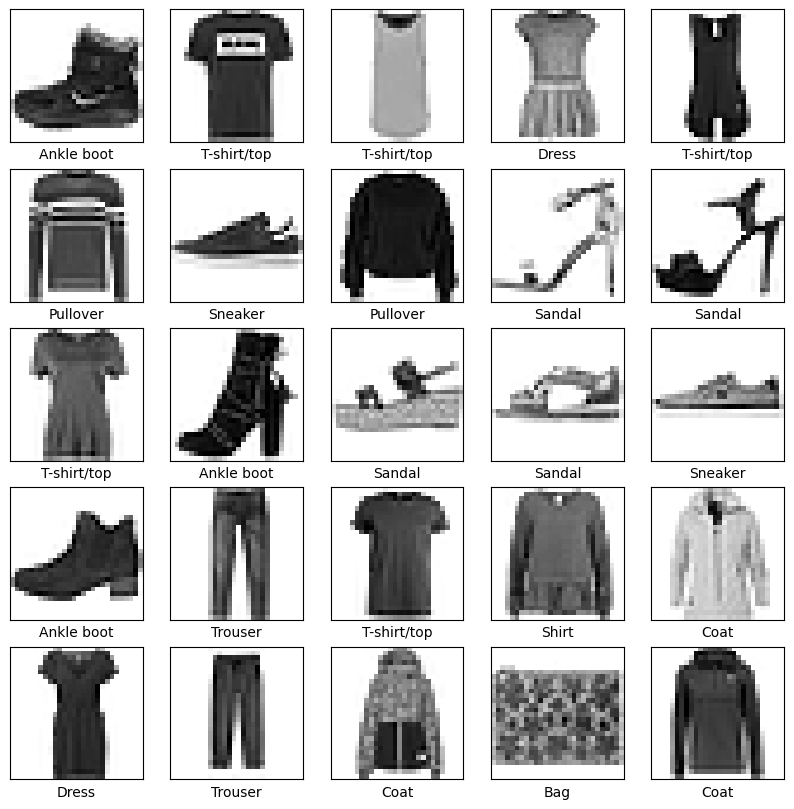

In [3]:
#####################################################################

# Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convertir las etiquetas a categorías (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Función para visualizar algunas imágenes del dataset
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar las primeras 25 imágenes del conjunto de entrenamiento
plot_sample_images(train_images, train_labels.argmax(axis=1), class_names)


#####################################################################

##Modelo_1 MLP con funcion de activacion (relu y sigmoide)

* Capas :4

    **Flatten**(input_shape=(28, 28)),Capa Entrada

    **Dense**(128, activation='relu'),Capa Oculta

    **Dense**(64, activation='sigmoid'),Capa oculta

    **Dense**(10, activation='softmax')Capa de salisa

* optimizer='RMsProp'

* epocas:10

* neuronas por capa:

    Dense(**128**, activation='relu'),

    Dense(**64**, activation='sigmoid'),
    
    Dense(**10**, activation='softmax')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Crear el modelo ReLU-Sigmoid
model_relu_sigmoid = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])


# Mostrar la arquitectura del modelo
print("Arquitectura del modelo ReLU-Sigmoid:")
model_relu_sigmoid.summary()

Arquitectura del modelo ReLU-Sigmoid:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model_relu_sigmoid.compile(optimizer='RMsProp',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Entrenar el modelo
history_relu_sigmoid = model_relu_sigmoid.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.5251 - accuracy: 0.8173 - val_loss: 0.4393 - val_accuracy: 0.8399 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.3804 - accuracy: 0.8608 - val_loss: 0.3997 - val_accuracy: 0.8537 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.3432 - accuracy: 0.8741 - val_loss: 0.3727 - val_accuracy: 0.8642 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 7s - loss: 0.3207 - accuracy: 0.8826 - val_loss: 0.3503 - val_accuracy: 0.8711 - 7s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.3049 - accuracy: 0.8881 - val_loss: 0.3594 - val_accuracy: 0.8736 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 7s - loss: 0.2933 - accuracy: 0.8925 - val_loss: 0.3826 - val_accuracy: 0.8646 - 7s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.2827 - accuracy: 0.8957 - val_loss: 0.3462 - val_accuracy: 0.8792 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 7s - loss: 0.2759 - accuracy: 0.8982 - val_loss: 0.3511 - val_accuracy: 0.8801 - 7s/epoch - 4ms/step
Epoch 9/

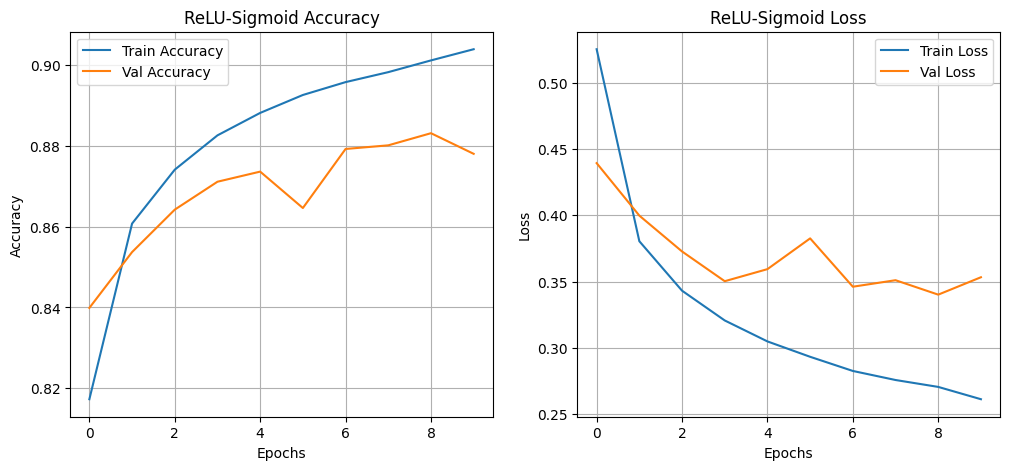

In [ ]:
# Función para graficar los resultados de precisión y pérdida
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.grid()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Graficar resultados del modelo ReLU-Sigmoid
plot_model_history(history_relu_sigmoid, "ReLU-Sigmoid")


In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss_relu_sigmoid, train_accuracy_relu_sigmoid = model_relu_sigmoid.evaluate(train_images, train_labels, verbose=2)
# Evaluar el modelo en el conjunto de prueba
test_loss_relu_sigmoid, test_accuracy_relu_sigmoid = model_relu_sigmoid.evaluate(test_images, test_labels, verbose=2)

print(f"ReLU-Sigmoid - Entrenamiento: Precisión = {train_accuracy_relu_sigmoid:.4f}, Pérdida = {train_loss_relu_sigmoid:.4f}")
print(f"ReLU-Sigmoid - Prueba: Precisión = {test_accuracy_relu_sigmoid:.4f}, Pérdida = {test_loss_relu_sigmoid:.4f}")


1875/1875 - 8s - loss: 0.2132 - accuracy: 0.9212 - 8s/epoch - 4ms/step
313/313 - 1s - loss: 0.3215 - accuracy: 0.8887 - 516ms/epoch - 2ms/step
ReLU-Sigmoid - Entrenamiento: Precisión = 0.9212, Pérdida = 0.2132
ReLU-Sigmoid - Prueba: Precisión = 0.8887, Pérdida = 0.3215


**Observacion:**

**Resultados del Entrenamiento y Prueba**

Precisión de Entrenamiento: 92.12%

Pérdida de Entrenamiento: 0.2132

Precisión de Prueba: 0,8887

Pérdida de Prueba: 0.3215

Una precisión del 92.12% en el conjunto de entrenamiento sugiere que el modelo ha aprendido bien las características presentes en los datos de entrenamiento. La baja pérdida de entrenamiento (0.2132) también respalda esta conclusión.

La diferencia entre la precisión de entrenamiento (92.11%) y la precisión de prueba (88,88%) indica que el modelo tiene un rendimiento ligeramente inferior en datos no vistos anteriormente (prueba) en comparación con los datos de entrenamiento.
Aunque hay una disminución en la precisión, esta diferencia no es excesivamente grande, lo que sugiere que el modelo generaliza razonablemente bien.

##Modelo_2 MLP con funcion de activacion (relu ytanh, tanh)
:

 - Se cambia la funcion de activacion de sigmoid a Tahn
- Se aumentan las epocas de 10 a 15  
- Aumenta capa densa de 3 a 4
* Capas :5

    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])


* optimizer='optimizer='sgd'

* epocas:15   

* neuronas por capa:

    Dense(**256**, activation='relu'),
    Dense(**128**, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(**10**, activation='softmax')


In [ ]:
# Crear el modelo ReLU-Tanh
model_relu_tanh = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])


# Mostrar la arquitectura del modelo
print("Arquitectura del modelo ReLU-Tanh:")
model_relu_tanh.summary()


Arquitectura del modelo ReLU-Tanh:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               200960    
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________

In [ ]:
# Compilar el modelo
model_relu_tanh.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Entrenar el modelo
history_relu_tanh = model_relu_tanh.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/15
1875/1875 - 8s - loss: 0.6641 - accuracy: 0.7822 - val_loss: 0.5048 - val_accuracy: 0.8205 - 8s/epoch - 4ms/step
Epoch 2/15
1875/1875 - 7s - loss: 0.4522 - accuracy: 0.8399 - val_loss: 0.4545 - val_accuracy: 0.8348 - 7s/epoch - 4ms/step
Epoch 3/15
1875/1875 - 7s - loss: 0.4080 - accuracy: 0.8553 - val_loss: 0.4211 - val_accuracy: 0.8457 - 7s/epoch - 4ms/step
Epoch 4/15
1875/1875 - 7s - loss: 0.3815 - accuracy: 0.8637 - val_loss: 0.4234 - val_accuracy: 0.8483 - 7s/epoch - 4ms/step
Epoch 5/15
1875/1875 - 8s - loss: 0.3634 - accuracy: 0.8698 - val_loss: 0.3995 - val_accuracy: 0.8524 - 8s/epoch - 4ms/step
Epoch 6/15
1875/1875 - 6s - loss: 0.3489 - accuracy: 0.8736 - val_loss: 0.3769 - val_accuracy: 0.8631 - 6s/epoch - 3ms/step
Epoch 7/15
1875/1875 - 8s - loss: 0.3358 - accuracy: 0.8788 - val_loss: 0.3779 - val_accuracy: 0.8669 - 8s/epoch - 4ms/step
Epoch 8/15
1875/1875 - 6s - loss: 0.3239 - accuracy: 0.8820 - val_loss: 0.3631 - val_accuracy: 0.8698 - 6s/epoch - 3ms/step
Epoch 9/

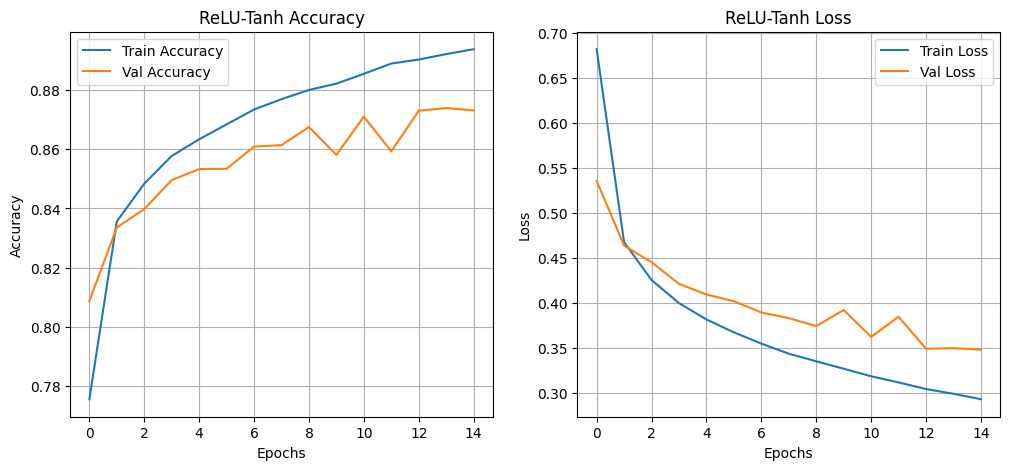

In [ ]:
# Graficar resultados del modelo ReLU-Tanh
plot_model_history(history_relu_tanh, "ReLU-Tanh")

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss_relu_tanh, train_accuracy_relu_tanh = model_relu_tanh.evaluate(train_images, train_labels, verbose=2)
# Evaluar el modelo en el conjunto de prueba
test_loss_relu_tanh, test_accuracy_relu_tanh = model_relu_tanh.evaluate(test_images, test_labels, verbose=2)

print(f"ReLU-Tanh - Entrenamiento: Precisión = {train_accuracy_relu_tanh:.4f}, Pérdida = {train_loss_relu_tanh:.4f}")
print(f"ReLU-Tanh - Prueba: Precisión = {test_accuracy_relu_tanh:.4f}, Pérdida = {test_loss_relu_tanh:.4f}")


1875/1875 - 5s - loss: 0.2811 - accuracy: 0.8984 - 5s/epoch - 2ms/step
313/313 - 1s - loss: 0.3479 - accuracy: 0.8731 - 531ms/epoch - 2ms/step
ReLU-Tanh - Entrenamiento: Precisión = 0.8984, Pérdida = 0.2811
ReLU-Tanh - Prueba: Precisión = 0.8731, Pérdida = 0.3479


**Observacion:**

*Análisis del Modelo ReLU-Tanh*

Resultados del Entrenamiento y Prueba

Precisión de Entrenamiento: 0.8984

Precisión de Prueba: 0,8731

Pérdida de Entrenamiento: 0.2811

Pérdida de Prueba: 0.3479

Una precisión del 0.8984 en el conjunto de entrenamiento sugiere que el modelo ha aprendido bien las características presentes en los datos de entrenamiento. La baja pérdida de entrenamiento (0.2811) también respalda esta conclusión pero hay entre la perdida de prueba (0,3479) y la precisión de prueba (0,8984) indica que el modelo tiene un rendimiento ligeramente inferior en datos no vistos anteriormente (prueba) en comparación con los datos de entrenamiento.
Aunque hay una disminución en la precisión, esta diferencia es mayor que el modelo anterior, pero  lo que sugiere que el modelo generaliza razonablemente bien, pero aún puede estar ligeramente sobreajustado.


##Modelo_3 MLP con funcion de activacion (sigmoide y tanh)

 epochs=20

 Capas= 5

    **Flatten(input_shape=(28, 28)),
    **Dense**(512, activation='sigmoid'),
    **Dense**(256, activation='sigmoid'),
    **Dense(128, activation='tanh'),
    **Dense**(10, activation='softmax')

Neuronas por capa

    **Flatten(input_shape=(28, 28)),
    **Dense**(512, activation='sigmoid'),
    **Dense**(256, activation='sigmoid'),
    **Dense(128, activation='tanh'),
    **Dense**(10, activation='softmax')

batch_size=128

optimizar= Adam

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [6]:
# Crear el modelo Sigmoid-Tanh
model_sigmoid_tanh = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')
])


# Mostrar la arquitectura del modelo
print("Arquitectura del modelo Sigmoid-Tanh:")
model_sigmoid_tanh.summary()


Arquitectura del modelo Sigmoid-Tanh:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________

In [ ]:
# Compilar el modelo
model_sigmoid_tanh.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Entrenar el modelo
history_sigmoid_tanh = model_sigmoid_tanh.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/20
469/469 - 4s - loss: 0.6645 - accuracy: 0.7701 - val_loss: 0.4691 - val_accuracy: 0.8327 - 4s/epoch - 9ms/step
Epoch 2/20
469/469 - 4s - loss: 0.4151 - accuracy: 0.8503 - val_loss: 0.4159 - val_accuracy: 0.8479 - 4s/epoch - 8ms/step
Epoch 3/20
469/469 - 4s - loss: 0.3728 - accuracy: 0.8648 - val_loss: 0.3927 - val_accuracy: 0.8604 - 4s/epoch - 9ms/step
Epoch 4/20
469/469 - 3s - loss: 0.3477 - accuracy: 0.8732 - val_loss: 0.3840 - val_accuracy: 0.8623 - 3s/epoch - 7ms/step
Epoch 5/20
469/469 - 3s - loss: 0.3317 - accuracy: 0.8790 - val_loss: 0.3777 - val_accuracy: 0.8673 - 3s/epoch - 7ms/step
Epoch 6/20
469/469 - 4s - loss: 0.3127 - accuracy: 0.8864 - val_loss: 0.3704 - val_accuracy: 0.8670 - 4s/epoch - 9ms/step
Epoch 7/20
469/469 - 3s - loss: 0.3024 - accuracy: 0.8884 - val_loss: 0.3533 - val_accuracy: 0.8728 - 3s/epoch - 7ms/step
Epoch 8/20
469/469 - 3s - loss: 0.2878 - accuracy: 0.8933 - val_loss: 0.3536 - val_accuracy: 0.8693 - 3s/epoch - 7ms/step
Epoch 9/20
469/469 - 3s 

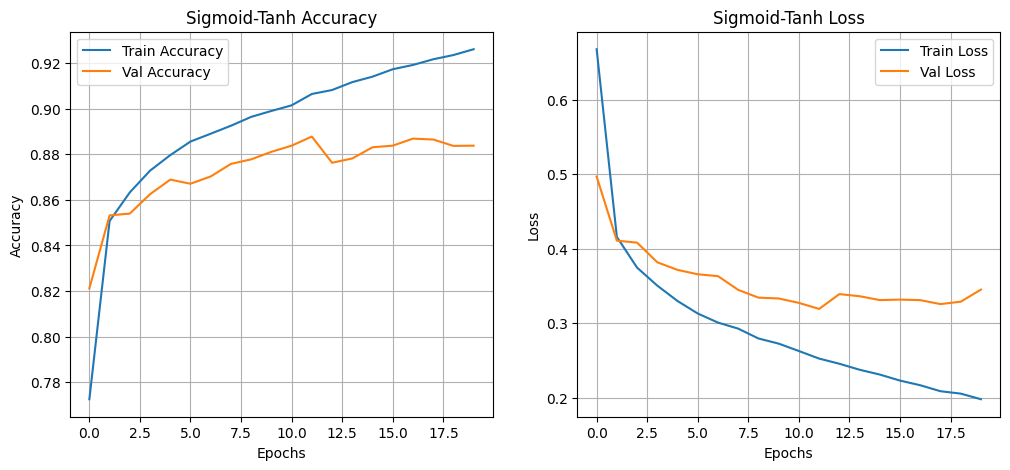

In [ ]:

# Graficar resultados del modelo Sigmoid-Tanh
plot_model_history(history_sigmoid_tanh, "Sigmoid-Tanh")

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss_sigmoid_tanh, train_accuracy_sigmoid_tanh = model_sigmoid_tanh.evaluate(train_images, train_labels, verbose=2)
# Evaluar el modelo en el conjunto de prueba
test_loss_sigmoid_tanh, test_accuracy_sigmoid_tanh = model_sigmoid_tanh.evaluate(test_images, test_labels, verbose=2)

print(f"Sigmoid-Tanh - Entrenamiento: Precisión = {train_accuracy_sigmoid_tanh:.4f}, Pérdida = {train_loss_sigmoid_tanh:.4f}")
print(f"Sigmoid-Tanh - Prueba: Precisión = {test_accuracy_sigmoid_tanh:.4f}, Pérdida = {test_loss_sigmoid_tanh:.4f}")


1875/1875 - 3s - loss: 0.1954 - accuracy: 0.9263 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 0.3453 - accuracy: 0.8838 - 565ms/epoch - 2ms/step
Sigmoid-Tanh - Entrenamiento: Precisión = 0.9263, Pérdida = 0.1954
Sigmoid-Tanh - Prueba: Precisión = 0.8838, Pérdida = 0.3453


**Observacion:**

**Análisis del Modelo Sigmoid-Tanh**

Resultados del Entrenamiento y Prueba

Precisión de Entrenamiento: 0,9263

Pérdida de Entrenamiento: 0.1954

Precisión de Prueba:0,8838

Pérdida de Prueba: 0.3453

Una precisión del 0,9263 en el conjunto de entrenamiento sugiere que el modelo ha aprendido bien las características presentes en los datos de entrenamiento. La baja pérdida de entrenamiento (0.1954) también respalda esta conclusión.

La diferencia entre la precisión de entrenamiento (92,63%) y la precisión de prueba (88.38%) indica que el modelo tiene un rendimiento ligeramente inferior en datos no vistos anteriormente (prueba) en comparación con los datos de entrenamiento.
Aunque hay una disminución en la precisión, esta diferencia  es mayor que los modelos anteriores, lo que sugiere que el modelo generaliza razonablemente bien, pero aún puede estar ligeramente sobreajustado

## Parte 2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto.

**Backpropagation**, o "propagación hacia atrás de errores", es un algoritmo esencial en el entrenamiento de redes neuronales artificiales que ajusta los pesos de la red para minimizar el error entre las predicciones y los valores reales. Funciona en dos fases: la propagación hacia adelante, donde los datos de entrada se transforman a través de la red para producir una predicción, y la propagación hacia atrás, donde el error calculado se devuelve a través de la red para calcular los gradientes de los errores respecto a los pesos, actualizando estos pesos en dirección opuesta al gradiente para reducir el error en futuras iteraciones.

 **El descenso de gradiente**, un algoritmo de optimización utilizado para minimizar funciones, es parte integral de este proceso, pues utiliza los gradientes calculados para ajustar los pesos iterativamente hasta que convergen a valores que minimizan la función de pérdida. La principal diferencia entre ambos es que backpropagation calcula específicamente los gradientes en redes neuronales, mientras que el descenso de gradiente es un método general de optimización aplicado a diversos problemas.

 Ambos algoritmos trabajan en conjunto para mejorar la precisión de las predicciones ajustando adecuadamente los pesos durante el entrenamiento de las redes neuronales.

## Parte 3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items.
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no.

Epoch 1/50
422/422 - 8s - loss: 0.5752 - accuracy: 0.7938 - val_loss: 0.4053 - val_accuracy: 0.8488 - 8s/epoch - 20ms/step
Epoch 2/50
422/422 - 7s - loss: 0.4424 - accuracy: 0.8420 - val_loss: 0.3758 - val_accuracy: 0.8602 - 7s/epoch - 16ms/step
Epoch 3/50
422/422 - 7s - loss: 0.4066 - accuracy: 0.8536 - val_loss: 0.3671 - val_accuracy: 0.8652 - 7s/epoch - 17ms/step
Epoch 4/50
422/422 - 8s - loss: 0.3820 - accuracy: 0.8621 - val_loss: 0.3608 - val_accuracy: 0.8685 - 8s/epoch - 19ms/step
Epoch 5/50
422/422 - 8s - loss: 0.3687 - accuracy: 0.8662 - val_loss: 0.3563 - val_accuracy: 0.8712 - 8s/epoch - 18ms/step
Epoch 6/50
422/422 - 6s - loss: 0.3561 - accuracy: 0.8702 - val_loss: 0.3481 - val_accuracy: 0.8727 - 6s/epoch - 15ms/step
Epoch 7/50
422/422 - 8s - loss: 0.3420 - accuracy: 0.8753 - val_loss: 0.3450 - val_accuracy: 0.8775 - 8s/epoch - 18ms/step
Epoch 8/50
422/422 - 6s - loss: 0.3286 - accuracy: 0.8800 - val_loss: 0.3235 - val_accuracy: 0.8840 - 6s/epoch - 15ms/step
Epoch 9/50
422/4

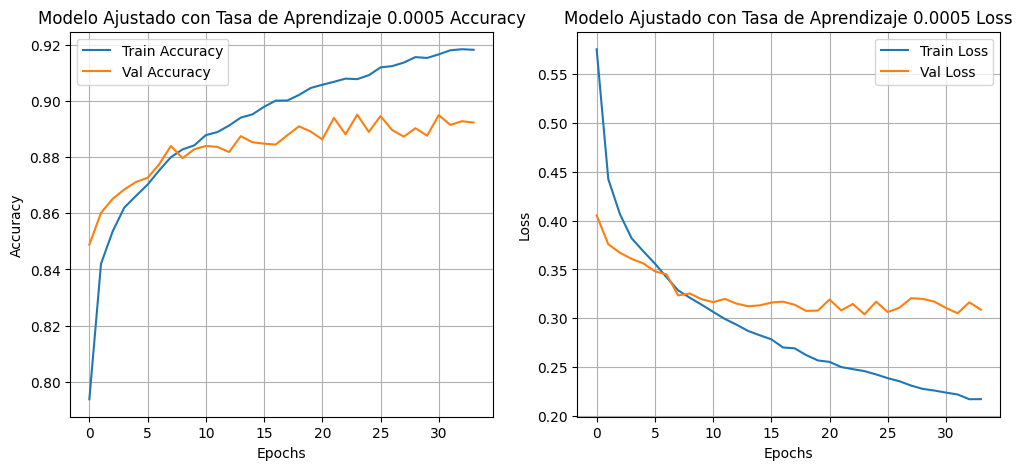

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.85      0.93      0.89      1000
        Coat       0.83      0.80      0.81      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.72      0.71      0.71      1000
     Sneaker       0.92      0.97      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Importar las librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Cargar el conjunto de datos Fashion MNIST
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplanar las imágenes de 28x28 a un vector de 784
N = X_train.shape[1] * X_train.shape[2]  # 784
X_train = X_train.reshape(-1, N)
X_test = X_test.reshape(-1, N)

# Convertir las etiquetas a categorías (one-hot encoding)
C = len(np.unique(Y_train))  # 10
Y_train = keras.utils.to_categorical(Y_train, C)
Y_test = keras.utils.to_categorical(Y_test, C)

# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Función para graficar los resultados de precisión y pérdida
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.grid()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Función para mostrar el reporte de clasificación
def show_classification_report(model, X_test, Y_test, target_names):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)
    report = classification_report(Y_true, Y_pred_classes, target_names=target_names)
    print(report)
# Ajustar el modelo con más capas y diferente configuración de Dropout y L2 regularization
model = keras.Sequential([
    Dense(512, input_dim=N, activation='tanh'),
    Dropout(0.2),
    Dense(256, activation='tanh'),
    Dropout(0.2),
    Dense(128, activation='tanh'),
    Dropout(0.2),
    Dense(C, activation='softmax')
])

# Ajustar la tasa de aprendizaje del optimizador 'adam'
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar el modelo
model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir Early Stopping con mayor paciencia
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
history = model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=2)

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Precisión en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)

# Graficar resultados del modelo
plot_model_history(history, "Modelo Ajustado con Tasa de Aprendizaje 0.0005")

# Mostrar el reporte de clasificación
show_classification_report(model, X_test, Y_test, class_names)




Justificar y hacer análisis aquí.


Utilizamos Dropout y Early Stopping como técnicas de regularización. Dropout, con una tasa del 20%, apagó aleatoriamente neuronas durante el entrenamiento para prevenir el sobreajuste al reducir la co-adaptación de las neuronas. Early Stopping, con una paciencia de 10 épocas, detuvo el entrenamiento cuando la pérdida de validación dejó de mejorar, evitando el sobreentrenamiento y reduciendo el tiempo de computación. Ambas técnicas se complementaron, con Dropout siendo particularmente efectivo en evitar el sobreajuste y Early Stopping asegurando que el entrenamiento se detuviera en el momento óptimo. La arquitectura final del modelo incluyó capas densas con 512, 256 y 128 neuronas, todas con activación tanh, seguidas de Dropout, y una capa de salida softmax con 10 neuronas. El optimizador Adam, con una tasa de aprendizaje de 0.0005, fue utilizado para un ajuste más fino de los pesos. Este modelo logró una precisión de prueba de 89.27% y una pérdida de 0.3125, mostrando una excelente capacidad de generalización y evitando el sobreajuste, gracias a las técnicas de regularización implementadas.

## Parte 4. Optimizadores y Normalización

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar.
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida.

Funciones de Optimización

- Gradiente Descendente Estocástico (SGD):Modelo 2 MLP: ReLU-Tanh - Entrenamiento: Precisión = 0.8984, Pérdida = 0.2811
ReLU-Tanh - Prueba: Precisión = 0.8731, Pérdida = 0.3479

Descripción: Actualiza los pesos utilizando el gradiente de la función de pérdida con respecto a los parámetros del modelo, evaluado en un subconjunto (mini-batch) de los datos.

- Adam (Adaptive Moment Estimation):Modelo 3 MLP:
313/313 - 1s - loss: 0.3453 - accuracy: 0.8838 - 565ms/epoch - 2ms/step
Sigmoid-Tanh - Entrenamiento: Precisión = 0.9263, Pérdida = 0.1954
Sigmoid-Tanh - Prueba: Precisión = 0.8838, Pérdida = 0.3453

Modelo 6: Modelo RNN-LSTM
 Resultados del Modelo LSTM Básico ===
Conjunto de Prueba - Pérdida: 0.3402, Precisión: 87.09%
Conjunto de Entrenamiento - Pérdida: 0.2908, Precisión: 89.07%

Modelo7:  RNN-LSTM Bidireccional con early stopping y dropout
=== Resultados del Modelo RNN-LSTM Bidireccional con Early Stopping ===
Conjunto de Prueba - Pérdida: 0.3004, Precisión: 88.78%
Conjunto de Entrenamiento - Pérdida: 0.2333, Precisión: 91.27%


Descripción: Combina las ventajas de RMSProp, manteniendo un promedio exponencial de los gradientes pasados y sus cuadrados.

- optimizer=adam_optimizer: Modelo 4 MLP CON REGULARIZACION , EARLY STOPPING
Precisión en los datos de prueba: 0.8877999782562256
Pérdida en los datos de prueba: 0.3178347647190094

mModelo 5 : CNN
469/469 - 89s - loss: 0.3599 - accuracy: 0.8662 - val_loss: 0.2851 - val_accuracy: 0.8987 - 89s/epoch - 190ms/step
313/313 - 4s - loss: 0.2851 - accuracy: 0.8987 - 4s/epoch - 14ms/step
Precisión en los datos de prueba: 0.8986999988555908
Pérdida en los datos de prueba: 0.2850998640060425



- RMSProp: Modelo 1 ReLU-Sigmoid - Entrenamiento: Precisión = 0.9212, Pérdida = 0.2132
ReLU-Sigmoid - Prueba: Precisión = 0.8887, Pérdida = 0.3215

Descripción: Modifica la tasa de aprendizaje adaptativamente para cada parámetro basándose en el promedio de los gradientes recientes.



## Parte 5. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

Modelo 5 CNN

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

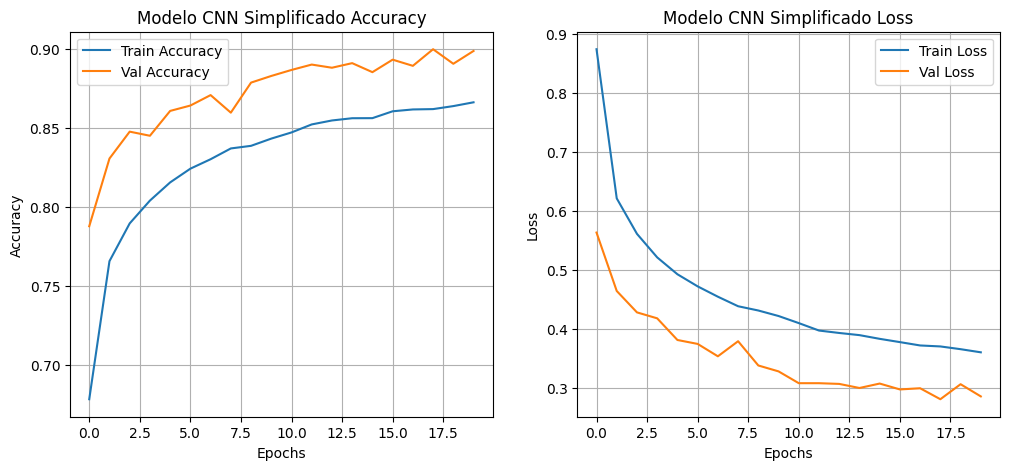

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.81      0.84      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.82      0.83      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.67      0.76      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el conjunto de datos Fashion MNIST
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionar los datos para que sean compatibles con las capas convolucionales
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convertir las etiquetas a categorías (one-hot encoding)
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

# Definir el generador de datos con aumento
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(X_train)

# Definir el modelo CNN
model_cnn = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


# Imprimimos Arquitectura
model_cnn.summary()


# Ajustar la tasa de aprendizaje del optimizador 'adam'
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar el modelo
model_cnn.compile(optimizer=adam_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Definir Early Stopping con mayor paciencia
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con los datos aumentados y Early Stopping
history_cnn = model_cnn.fit(datagen.flow(X_train, Y_train, batch_size=128),
                            epochs=20,
                            validation_data=(X_test, Y_test),
                            callbacks=[early_stopping],
                            verbose=2)

# Evaluar el modelo en los datos de prueba
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test, Y_test, verbose=2)
print('Precisión en los datos de prueba:', test_acc_cnn)
print('Pérdida en los datos de prueba:', test_loss_cnn)

# Función para graficar los resultados de precisión y pérdida
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.grid()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Función para mostrar el reporte de clasificación
def show_classification_report(model, X_test, Y_test, target_names):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)
    report = classification_report(Y_true, Y_pred_classes, target_names=target_names)
    print(report)

# Graficar resultados del modelo
plot_model_history(history_cnn, "Modelo CNN Simplificado")

# Mostrar el reporte de clasificación
show_classification_report(model_cnn, X_test, Y_test, ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])


## Parte 6. Detallar la segunda problemática del caso planteado: Redes Recurrentes Parte 1

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso.

###Modelo 6  RNN-LSTM

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

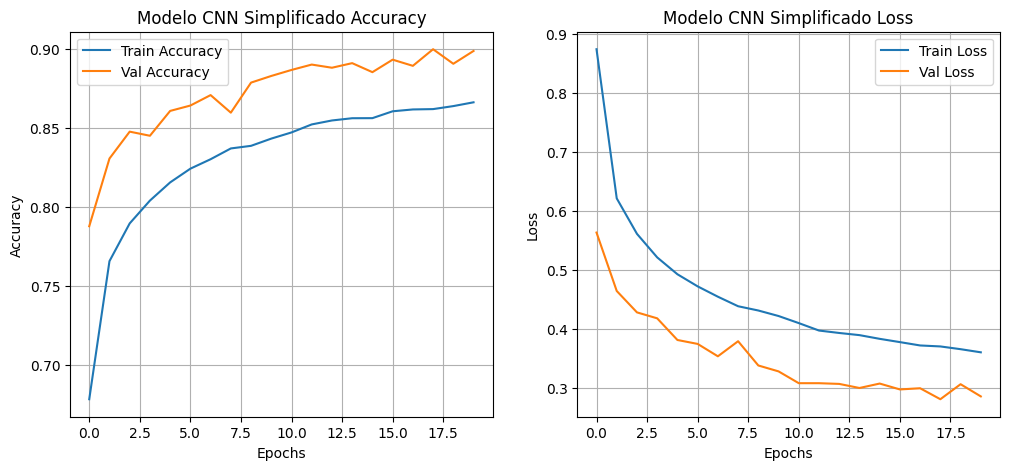

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.81      0.84      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.82      0.83      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.67      0.76      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el conjunto de datos Fashion MNIST
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionar los datos para que sean compatibles con las capas convolucionales
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convertir las etiquetas a categorías (one-hot encoding)
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

# Definir el generador de datos con aumento
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(X_train)

# Definir el modelo CNN
model_cnn = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


# Imprimimos Arquitectura
model_cnn.summary()


# Ajustar la tasa de aprendizaje del optimizador 'adam'
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar el modelo
model_cnn.compile(optimizer=adam_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Definir Early Stopping con mayor paciencia
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con los datos aumentados y Early Stopping
history_cnn = model_cnn.fit(datagen.flow(X_train, Y_train, batch_size=128),
                            epochs=20,
                            validation_data=(X_test, Y_test),
                            callbacks=[early_stopping],
                            verbose=2)

# Evaluar el modelo en los datos de prueba
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test, Y_test, verbose=2)
print('Precisión en los datos de prueba:', test_acc_cnn)
print('Pérdida en los datos de prueba:', test_loss_cnn)

# Función para graficar los resultados de precisión y pérdida
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.grid()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Función para mostrar el reporte de clasificación
def show_classification_report(model, X_test, Y_test, target_names):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)
    report = classification_report(Y_true, Y_pred_classes, target_names=target_names)
    print(report)

# Graficar resultados del modelo
plot_model_history(history_cnn, "Modelo CNN Simplificado")

# Mostrar el reporte de clasificación
show_classification_report(model_cnn, X_test, Y_test, ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])


Diferencias entre Redes Neuronales Convolucionales (CNN) y Perceptrón Multicapa (MLP)
**Arquitectura**
- Redes Neuronales Convolucionales (CNN):

Capas Convolucionales,estas utilizan filtros para realizar convoluciones sobre las entradas y extraer características espaciales. Los filtros son entrenables y se mueven a través de la imagen para detectar patrones locales.
Tambien  existen caapas de Pooling que reducen la dimensionalidad de las características extraídas, preservando la información más importante y reduciendo el sobreajuste.

Las capas Densas se ponen al final, generalmente hay una o más capas densas que realizan la clasificación en base a las características extraídas.

 Las CNNs tienen una estructura jerárquica donde las capas convolucionales y de pooling se alternan, seguidas de capas densas al final.


- Perceptrón Multicapa (MLP):

Las capas Densas indican que cada neurona en una capa está conectada a cada neurona en la siguiente capa.

 No tienen capas convolucionales ni de pooling, lo que significa que no pueden capturar características espaciales locales directamente.

 La estructura es más simple y generalmente consiste en una serie de capas densas, con una función de activación después de cada capa.

**Parámetros**

- Redes Neuronales Convolucionales (CNN):

Filtros: Cada capa convolucional tiene múltiples filtros, y cada filtro tiene sus propios pesos y sesgos que se aprenden durante el entrenamiento.
Mapas de Características: Cada filtro produce un mapa de características, y la cantidad de mapas de características en cada capa depende del número de filtros.
Tamaño de los Filtros: El tamaño de los filtros es un hiperparámetro importante que afecta la capacidad de la red para capturar detalles a diferentes escalas.

- Perceptrón Multicapa (MLP):

Pesos y Sesgos: Cada conexión entre neuronas en capas adyacentes tiene un peso, y cada neurona tiene un sesgo.
Número de Neuronas: La cantidad de neuronas en cada capa es un parámetro que se ajusta según el problema.

** Hiperparámetros**
- Redes Neuronales Convolucionales (CNN):

Número de Filtros: Determina cuántas características diferentes aprenderá la red en cada capa.
Tamaño de los Filtros: Afecta la capacidad de la red para capturar características de diferentes tamaños.
Stride: El paso con el que se mueve el filtro sobre la entrada.
Padding: Determina si se añaden ceros alrededor de las entradas para mantener el tamaño original de la salida.
Tasas de Pooling: Afecta cómo se reduce la dimensionalidad de las características extraídas.

- Perceptrón Multicapa (MLP):

Número de Neuronas en cada Capa: Afecta la capacidad de la red para aprender representaciones complejas.
Número de Capas: La profundidad de la red, que influye en su capacidad para modelar relaciones no lineales.
Funciones de Activación: Las funciones utilizadas después de cada capa para introducir no linealidad.
Tasa de Aprendizaje: Influye en la rapidez con la que la red se adapta durante el entrenamiento.

Las Redes Neuronales Convolucionales (CNN) tiene un buen rendimiento reconocimiento de imágenes, clasificación de imágenes, detección de objetos, segmentación de imágenes.

Perceptrón Multicapa (MLP) Se utiliza en  modelos básicos de clasificación de texto y análisis de sentimientos.



## Parte 7.  Detallar la tercera problemática del caso planteado: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.


###Modelo RNN-LSTM

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 28, 512)           583680    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 28, 512)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                16448     
                                                                 
 dense_45 (Dense)            (None, 10)              

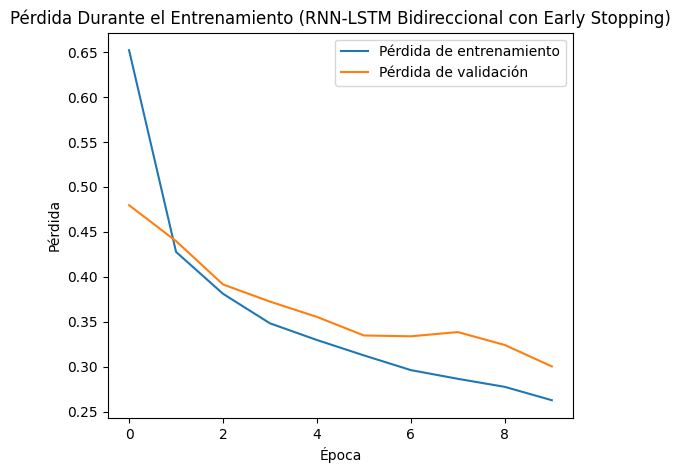

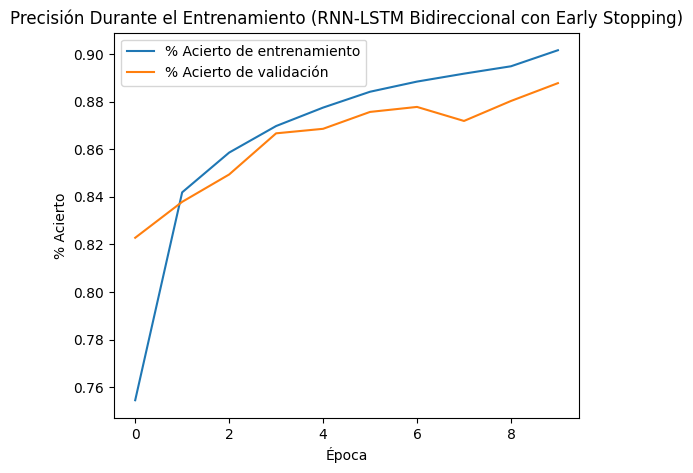

In [ ]:
#####################################################################
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Definir el modelo RNN-LSTM Bidireccional con Early Stopping
model_bidirectional_lstm_early_stopping = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(128)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_bidirectional_lstm_early_stopping.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_bidirectional_lstm_early_stopping.summary()

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history_bidirectional_lstm_early_stopping = model_bidirectional_lstm_early_stopping.fit(
    train_images,
    train_labels,
    epochs=10,  # Mayor número de épocas para observar Early Stopping
    validation_data=(test_images, test_labels), batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
test_loss, test_accuracy = model_bidirectional_lstm_early_stopping.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_bidirectional_lstm_early_stopping.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional con Early Stopping ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para su caso de estudio, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


**Problema a Resolver**
El problema a resolver es la clasificación precisa de imágenes de artículos de moda en 10 categorías diferentes. La clasificación automática de estas imágenes puede ayudar a:

- Mejorar los sistemas de recomendación de productos.
- Automatizar la gestión de inventarios.
- Facilitar la búsqueda de productos similares.
- Mejorar la experiencia del usuario en aplicaciones de moda y comercio electrónico.


**Red Neuronal Convolucional (CNN):**

Capas convolucionales para extraer características relevantes de las imágenes.
Capas de pooling para reducir la dimensionalidad y capturar características invariantes a la traslación.
Capas densas para la clasificación final basada en las características extraídas.

**Beneficios de la Solución **

- Automatización:

Reducción del tiempo y esfuerzo necesarios para clasificar grandes volúmenes de imágenes.

- Precisión:

Mejora en la precisión de la clasificación gracias a la capacidad de las redes neuronales para aprender características complejas de las imágenes.


- Adaptabilidad:
La red neuronal puede adaptarse y mejorar con el tiempo a medida que se dispone de más datos y se ajustan los hiperparámetros del modelo.

** Consideraciones**

Capacidad de Cómputo:

La implementación y entrenamiento de modelos de redes neuronales puede ser intensiva en términos de recursos computacionales. Se recomienda el uso de GPU para acelerar el proceso.

Calidad de Datos:

La precisión del modelo depende en gran medida de la calidad y cantidad de datos disponibles para el entrenamiento.

Mantenimiento del Modelo:

Es necesario monitorizar y actualizar regularmente el modelo para asegurar que se mantiene preciso y relevante.

**Conclusión**
La implementación de una arquitectura especializada utilizando redes neuronales para el dataset Fashion MNIST permite abordar de manera eficiente el problema de la clasificación de imágenes de moda. Esta solución  optimiza el proceso de clasificación.

 Con una infraestructura adecuada y un enfoque adaptativo , podemos mejorar continuamente la precisión y eficiencia de nuestro sistema, beneficiando así a la industria de la moda y mejorando la experiencia del usuario.